In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
#data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(["EIN"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [6]:
application_df.shape

(34299, 11)

In [7]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [8]:
# Look at STATUS value counts 
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [9]:
# Look at SPECIAL CONSIDERATIONS value counts 
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [10]:
application_df = application_df.drop(["STATUS", "SPECIAL_CONSIDERATIONS"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [11]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

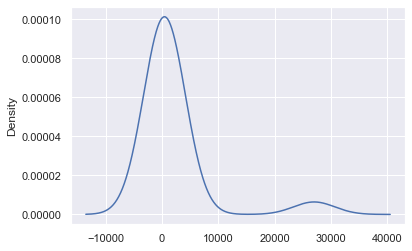

In [12]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [13]:
list(application_counts[application_counts < 500].index)

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [14]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

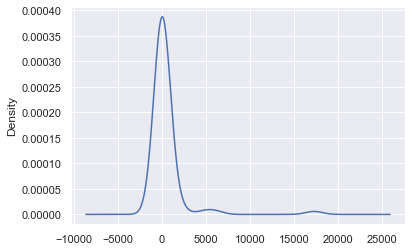

In [16]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [17]:
list(class_counts[class_counts < 1000].index)

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [18]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [19]:
application_df.nunique()

NAME                19568
APPLICATION_TYPE        9
AFFILIATION             6
CLASSIFICATION          6
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [20]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


In [21]:
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

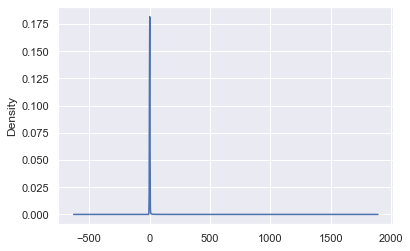

In [22]:
name_counts.plot.density()

In [23]:
name_counts[name_counts <= 5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

In [24]:
replace_application = list(name_counts[name_counts <= 5].index)

for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app, "Other")
    
application_df.NAME.value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [25]:
application_df.dtypes

NAME                object
APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [26]:
[application_df.dtypes == "object"]

[NAME                 True
 APPLICATION_TYPE     True
 AFFILIATION          True
 CLASSIFICATION       True
 USE_CASE             True
 ORGANIZATION         True
 INCOME_AMT           True
 ASK_AMT             False
 IS_SUCCESSFUL       False
 dtype: bool]

In [27]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [28]:
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0
1,Other,T3,Independent,C2000,Preservation,Co-operative,1-9999
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999
4,Other,T3,Independent,C1000,Heathcare,Trust,100000-499999
...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0


In [29]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
application_df.shape

(34299, 396)

In [32]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 396 entries, ASK_AMT to INCOME_AMT_5M-10M
dtypes: float64(394), int64(2)
memory usage: 103.6 MB


In [33]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

y = application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
len(X_train[0])

395

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))




# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1185)              469260    
                                                                 
 dense_6 (Dense)             (None, 790)               936940    
                                                                 
 dense_7 (Dense)             (None, 395)               312445    
                                                                 
 dense_8 (Dense)             (None, 1)                 396       
                                                                 
Total params: 1,719,041
Trainable params: 1,719,041
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Create a callback that saves the model's weights every epoch


cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:32 - loss: 0.6630 - accuracy: 0.6250
Epoch 1: saving model to checkpoints\weights.01.hdf5
  9/804 [..............................] - ETA: 13s - loss: 0.9071 - accuracy: 0.6042
Epoch 1: saving model to checkpoints\weights.01.hdf5
 11/804 [..............................] - ETA: 14s - loss: 0.8875 - accuracy: 0.5824
Epoch 1: saving model to checkpoints\weights.01.hdf5
 19/804 [..............................] - ETA: 13s - loss: 0.7656 - accuracy: 0.6530
Epoch 1: saving model to checkpoints\weights.01.hdf5
 24/804 [..............................] - ETA: 14s - loss: 0.7257 - accuracy: 0.6745
Epoch 1: saving model to checkpoints\weights.01.hdf5
 26/804 [..............................] - ETA: 14s - loss: 0.7174 - accuracy: 0.6779
Epoch 1: saving model to checkpoints\weights.01.hdf5
 34/804 [>.............................] - ETA: 14s - loss: 0.6742 - accuracy: 0.6967
Epoch 1: saving model to checkpoints\weights.01.hdf5
 39/804 [>....

295/804 [==========>...................] - ETA: 10s - loss: 0.5005 - accuracy: 0.7672
Epoch 1: saving model to checkpoints\weights.01.hdf5
300/804 [==========>...................] - ETA: 10s - loss: 0.4997 - accuracy: 0.7675
Epoch 1: saving model to checkpoints\weights.01.hdf5
305/804 [==========>...................] - ETA: 10s - loss: 0.5010 - accuracy: 0.7670
Epoch 1: saving model to checkpoints\weights.01.hdf5
310/804 [==========>...................] - ETA: 10s - loss: 0.5004 - accuracy: 0.7675
Epoch 1: saving model to checkpoints\weights.01.hdf5
315/804 [==========>...................] - ETA: 9s - loss: 0.4994 - accuracy: 0.7687 
Epoch 1: saving model to checkpoints\weights.01.hdf5
320/804 [==========>...................] - ETA: 9s - loss: 0.4992 - accuracy: 0.7690
Epoch 1: saving model to checkpoints\weights.01.hdf5
329/804 [===========>..................] - ETA: 9s - loss: 0.4982 - accuracy: 0.7685
Epoch 1: saving model to checkpoints\weights.01.hdf5
331/804 [===========>........

590/804 [=====================>........] - ETA: 3s - loss: 0.4762 - accuracy: 0.7780
Epoch 1: saving model to checkpoints\weights.01.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.4768 - accuracy: 0.7779
Epoch 1: saving model to checkpoints\weights.01.hdf5
600/804 [=====================>........] - ETA: 3s - loss: 0.4756 - accuracy: 0.7786
Epoch 1: saving model to checkpoints\weights.01.hdf5
605/804 [=====================>........] - ETA: 3s - loss: 0.4760 - accuracy: 0.7786
Epoch 1: saving model to checkpoints\weights.01.hdf5
610/804 [=====================>........] - ETA: 3s - loss: 0.4762 - accuracy: 0.7785
Epoch 1: saving model to checkpoints\weights.01.hdf5
615/804 [=====================>........] - ETA: 3s - loss: 0.4764 - accuracy: 0.7780
Epoch 1: saving model to checkpoints\weights.01.hdf5
620/804 [======================>.......] - ETA: 3s - loss: 0.4762 - accuracy: 0.7784
Epoch 1: saving model to checkpoints\weights.01.hdf5
625/804 [======================>..

 81/804 [==>...........................] - ETA: 9s - loss: 0.4320 - accuracy: 0.7959 
Epoch 2: saving model to checkpoints\weights.02.hdf5
 86/804 [==>...........................] - ETA: 9s - loss: 0.4324 - accuracy: 0.7958
Epoch 2: saving model to checkpoints\weights.02.hdf5
 91/804 [==>...........................] - ETA: 9s - loss: 0.4351 - accuracy: 0.7933
Epoch 2: saving model to checkpoints\weights.02.hdf5
 96/804 [==>...........................] - ETA: 9s - loss: 0.4376 - accuracy: 0.7926
Epoch 2: saving model to checkpoints\weights.02.hdf5
105/804 [==>...........................] - ETA: 9s - loss: 0.4395 - accuracy: 0.7902
Epoch 2: saving model to checkpoints\weights.02.hdf5
107/804 [==>...........................] - ETA: 9s - loss: 0.4410 - accuracy: 0.7900
Epoch 2: saving model to checkpoints\weights.02.hdf5
111/804 [===>..........................] - ETA: 9s - loss: 0.4418 - accuracy: 0.7905
Epoch 2: saving model to checkpoints\weights.02.hdf5
120/804 [===>....................

376/804 [=============>................] - ETA: 6s - loss: 0.4295 - accuracy: 0.7986
Epoch 2: saving model to checkpoints\weights.02.hdf5
381/804 [=============>................] - ETA: 6s - loss: 0.4288 - accuracy: 0.7990
Epoch 2: saving model to checkpoints\weights.02.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.4302 - accuracy: 0.7979
Epoch 2: saving model to checkpoints\weights.02.hdf5
391/804 [=============>................] - ETA: 6s - loss: 0.4301 - accuracy: 0.7981
Epoch 2: saving model to checkpoints\weights.02.hdf5
396/804 [=============>................] - ETA: 6s - loss: 0.4314 - accuracy: 0.7971
Epoch 2: saving model to checkpoints\weights.02.hdf5
401/804 [=============>................] - ETA: 6s - loss: 0.4313 - accuracy: 0.7972
Epoch 2: saving model to checkpoints\weights.02.hdf5
406/804 [==============>...............] - ETA: 5s - loss: 0.4308 - accuracy: 0.7975
Epoch 2: saving model to checkpoints\weights.02.hdf5
411/804 [==============>..........

671/804 [========================>.....] - ETA: 1s - loss: 0.4348 - accuracy: 0.7929
Epoch 2: saving model to checkpoints\weights.02.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.4348 - accuracy: 0.7931
Epoch 2: saving model to checkpoints\weights.02.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4344 - accuracy: 0.7933
Epoch 2: saving model to checkpoints\weights.02.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.4340 - accuracy: 0.7937
Epoch 2: saving model to checkpoints\weights.02.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.4342 - accuracy: 0.7936
Epoch 2: saving model to checkpoints\weights.02.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4353 - accuracy: 0.7931
Epoch 2: saving model to checkpoints\weights.02.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.4353 - accuracy: 0.7930
Epoch 2: saving model to checkpoints\weights.02.hdf5
710/804 [=========================

157/804 [====>.........................] - ETA: 9s - loss: 0.4286 - accuracy: 0.7998
Epoch 3: saving model to checkpoints\weights.03.hdf5
162/804 [=====>........................] - ETA: 9s - loss: 0.4277 - accuracy: 0.7994
Epoch 3: saving model to checkpoints\weights.03.hdf5
171/804 [=====>........................] - ETA: 9s - loss: 0.4284 - accuracy: 0.7984
Epoch 3: saving model to checkpoints\weights.03.hdf5
174/804 [=====>........................] - ETA: 9s - loss: 0.4295 - accuracy: 0.7976
Epoch 3: saving model to checkpoints\weights.03.hdf5
178/804 [=====>........................] - ETA: 9s - loss: 0.4308 - accuracy: 0.7963
Epoch 3: saving model to checkpoints\weights.03.hdf5
182/804 [=====>........................] - ETA: 9s - loss: 0.4310 - accuracy: 0.7957
Epoch 3: saving model to checkpoints\weights.03.hdf5
187/804 [=====>........................] - ETA: 9s - loss: 0.4313 - accuracy: 0.7963
Epoch 3: saving model to checkpoints\weights.03.hdf5
192/804 [======>..................

452/804 [===============>..............] - ETA: 5s - loss: 0.4328 - accuracy: 0.7940
Epoch 3: saving model to checkpoints\weights.03.hdf5
457/804 [================>.............] - ETA: 5s - loss: 0.4327 - accuracy: 0.7940
Epoch 3: saving model to checkpoints\weights.03.hdf5
462/804 [================>.............] - ETA: 5s - loss: 0.4331 - accuracy: 0.7936
Epoch 3: saving model to checkpoints\weights.03.hdf5
467/804 [================>.............] - ETA: 5s - loss: 0.4348 - accuracy: 0.7926
Epoch 3: saving model to checkpoints\weights.03.hdf5
472/804 [================>.............] - ETA: 5s - loss: 0.4347 - accuracy: 0.7927
Epoch 3: saving model to checkpoints\weights.03.hdf5
477/804 [================>.............] - ETA: 4s - loss: 0.4346 - accuracy: 0.7926
Epoch 3: saving model to checkpoints\weights.03.hdf5
482/804 [================>.............] - ETA: 4s - loss: 0.4341 - accuracy: 0.7929
Epoch 3: saving model to checkpoints\weights.03.hdf5
487/804 [=================>.......

747/804 [==========================>...] - ETA: 0s - loss: 0.4306 - accuracy: 0.7933
Epoch 3: saving model to checkpoints\weights.03.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4303 - accuracy: 0.7937
Epoch 3: saving model to checkpoints\weights.03.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.4303 - accuracy: 0.7937
Epoch 3: saving model to checkpoints\weights.03.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4302 - accuracy: 0.7940
Epoch 3: saving model to checkpoints\weights.03.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4305 - accuracy: 0.7939
Epoch 3: saving model to checkpoints\weights.03.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4304 - accuracy: 0.7939
Epoch 3: saving model to checkpoints\weights.03.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4307 - accuracy: 0.7937
Epoch 3: saving model to checkpoints\weights.03.hdf5
782/804 [=========================

233/804 [=======>......................] - ETA: 7s - loss: 0.4322 - accuracy: 0.7940
Epoch 4: saving model to checkpoints\weights.04.hdf5
238/804 [=======>......................] - ETA: 7s - loss: 0.4317 - accuracy: 0.7936
Epoch 4: saving model to checkpoints\weights.04.hdf5
243/804 [========>.....................] - ETA: 7s - loss: 0.4316 - accuracy: 0.7940
Epoch 4: saving model to checkpoints\weights.04.hdf5
248/804 [========>.....................] - ETA: 7s - loss: 0.4323 - accuracy: 0.7937
Epoch 4: saving model to checkpoints\weights.04.hdf5
253/804 [========>.....................] - ETA: 7s - loss: 0.4327 - accuracy: 0.7931
Epoch 4: saving model to checkpoints\weights.04.hdf5
258/804 [========>.....................] - ETA: 7s - loss: 0.4335 - accuracy: 0.7924
Epoch 4: saving model to checkpoints\weights.04.hdf5
263/804 [========>.....................] - ETA: 7s - loss: 0.4341 - accuracy: 0.7923
Epoch 4: saving model to checkpoints\weights.04.hdf5
268/804 [=========>...............

528/804 [==================>...........] - ETA: 3s - loss: 0.4302 - accuracy: 0.7958
Epoch 4: saving model to checkpoints\weights.04.hdf5
533/804 [==================>...........] - ETA: 3s - loss: 0.4303 - accuracy: 0.7957
Epoch 4: saving model to checkpoints\weights.04.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.4296 - accuracy: 0.7962
Epoch 4: saving model to checkpoints\weights.04.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.4301 - accuracy: 0.7959
Epoch 4: saving model to checkpoints\weights.04.hdf5
548/804 [===================>..........] - ETA: 3s - loss: 0.4302 - accuracy: 0.7955
Epoch 4: saving model to checkpoints\weights.04.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.4300 - accuracy: 0.7960
Epoch 4: saving model to checkpoints\weights.04.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.4299 - accuracy: 0.7960
Epoch 4: saving model to checkpoints\weights.04.hdf5
563/804 [====================>....

 14/804 [..............................] - ETA: 11s - loss: 0.4091 - accuracy: 0.7835
Epoch 5: saving model to checkpoints\weights.05.hdf5
 23/804 [..............................] - ETA: 11s - loss: 0.4151 - accuracy: 0.7989
Epoch 5: saving model to checkpoints\weights.05.hdf5
 26/804 [..............................] - ETA: 11s - loss: 0.4052 - accuracy: 0.8077
Epoch 5: saving model to checkpoints\weights.05.hdf5
 29/804 [>.............................] - ETA: 12s - loss: 0.4103 - accuracy: 0.8039
Epoch 5: saving model to checkpoints\weights.05.hdf5
 38/804 [>.............................] - ETA: 11s - loss: 0.4211 - accuracy: 0.7977
Epoch 5: saving model to checkpoints\weights.05.hdf5
 41/804 [>.............................] - ETA: 11s - loss: 0.4156 - accuracy: 0.8018
Epoch 5: saving model to checkpoints\weights.05.hdf5
 44/804 [>.............................] - ETA: 11s - loss: 0.4163 - accuracy: 0.7997
Epoch 5: saving model to checkpoints\weights.05.hdf5
 49/804 [>.................

309/804 [==========>...................] - ETA: 7s - loss: 0.4267 - accuracy: 0.7940
Epoch 5: saving model to checkpoints\weights.05.hdf5
314/804 [==========>...................] - ETA: 7s - loss: 0.4277 - accuracy: 0.7937
Epoch 5: saving model to checkpoints\weights.05.hdf5
319/804 [==========>...................] - ETA: 7s - loss: 0.4274 - accuracy: 0.7942
Epoch 5: saving model to checkpoints\weights.05.hdf5
324/804 [===========>..................] - ETA: 6s - loss: 0.4282 - accuracy: 0.7937
Epoch 5: saving model to checkpoints\weights.05.hdf5
329/804 [===========>..................] - ETA: 6s - loss: 0.4283 - accuracy: 0.7934
Epoch 5: saving model to checkpoints\weights.05.hdf5
334/804 [===========>..................] - ETA: 6s - loss: 0.4278 - accuracy: 0.7934
Epoch 5: saving model to checkpoints\weights.05.hdf5
339/804 [===========>..................] - ETA: 6s - loss: 0.4279 - accuracy: 0.7932
Epoch 5: saving model to checkpoints\weights.05.hdf5
344/804 [===========>.............

604/804 [=====================>........] - ETA: 2s - loss: 0.4277 - accuracy: 0.7954
Epoch 5: saving model to checkpoints\weights.05.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.4273 - accuracy: 0.7955
Epoch 5: saving model to checkpoints\weights.05.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.4281 - accuracy: 0.7953
Epoch 5: saving model to checkpoints\weights.05.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.4286 - accuracy: 0.7948
Epoch 5: saving model to checkpoints\weights.05.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.4285 - accuracy: 0.7947
Epoch 5: saving model to checkpoints\weights.05.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.4286 - accuracy: 0.7949
Epoch 5: saving model to checkpoints\weights.05.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.4289 - accuracy: 0.7944
Epoch 5: saving model to checkpoints\weights.05.hdf5
639/804 [======================>..

 90/804 [==>...........................] - ETA: 10s - loss: 0.4356 - accuracy: 0.7903
Epoch 6: saving model to checkpoints\weights.06.hdf5
 95/804 [==>...........................] - ETA: 10s - loss: 0.4368 - accuracy: 0.7905
Epoch 6: saving model to checkpoints\weights.06.hdf5
100/804 [==>...........................] - ETA: 10s - loss: 0.4376 - accuracy: 0.7903
Epoch 6: saving model to checkpoints\weights.06.hdf5
105/804 [==>...........................] - ETA: 10s - loss: 0.4382 - accuracy: 0.7890
Epoch 6: saving model to checkpoints\weights.06.hdf5
110/804 [===>..........................] - ETA: 9s - loss: 0.4382 - accuracy: 0.7901 
Epoch 6: saving model to checkpoints\weights.06.hdf5
115/804 [===>..........................] - ETA: 9s - loss: 0.4401 - accuracy: 0.7883
Epoch 6: saving model to checkpoints\weights.06.hdf5
120/804 [===>..........................] - ETA: 9s - loss: 0.4377 - accuracy: 0.7904
Epoch 6: saving model to checkpoints\weights.06.hdf5
129/804 [===>................

385/804 [=============>................] - ETA: 6s - loss: 0.4304 - accuracy: 0.7946
Epoch 6: saving model to checkpoints\weights.06.hdf5
394/804 [=============>................] - ETA: 5s - loss: 0.4297 - accuracy: 0.7946
Epoch 6: saving model to checkpoints\weights.06.hdf5
396/804 [=============>................] - ETA: 5s - loss: 0.4297 - accuracy: 0.7944
Epoch 6: saving model to checkpoints\weights.06.hdf5
403/804 [==============>...............] - ETA: 5s - loss: 0.4289 - accuracy: 0.7946
Epoch 6: saving model to checkpoints\weights.06.hdf5
408/804 [==============>...............] - ETA: 5s - loss: 0.4278 - accuracy: 0.7952
Epoch 6: saving model to checkpoints\weights.06.hdf5
410/804 [==============>...............] - ETA: 5s - loss: 0.4277 - accuracy: 0.7952
Epoch 6: saving model to checkpoints\weights.06.hdf5
415/804 [==============>...............] - ETA: 5s - loss: 0.4274 - accuracy: 0.7950
Epoch 6: saving model to checkpoints\weights.06.hdf5
420/804 [==============>..........

680/804 [========================>.....] - ETA: 1s - loss: 0.4272 - accuracy: 0.7951
Epoch 6: saving model to checkpoints\weights.06.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4269 - accuracy: 0.7954
Epoch 6: saving model to checkpoints\weights.06.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.4269 - accuracy: 0.7954
Epoch 6: saving model to checkpoints\weights.06.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.4268 - accuracy: 0.7956
Epoch 6: saving model to checkpoints\weights.06.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4269 - accuracy: 0.7957
Epoch 6: saving model to checkpoints\weights.06.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4264 - accuracy: 0.7958
Epoch 6: saving model to checkpoints\weights.06.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4260 - accuracy: 0.7963
Epoch 6: saving model to checkpoints\weights.06.hdf5
715/804 [=========================

171/804 [=====>........................] - ETA: 8s - loss: 0.4170 - accuracy: 0.8017
Epoch 7: saving model to checkpoints\weights.07.hdf5
176/804 [=====>........................] - ETA: 8s - loss: 0.4175 - accuracy: 0.8011
Epoch 7: saving model to checkpoints\weights.07.hdf5
181/804 [=====>........................] - ETA: 8s - loss: 0.4184 - accuracy: 0.8008
Epoch 7: saving model to checkpoints\weights.07.hdf5
186/804 [=====>........................] - ETA: 8s - loss: 0.4201 - accuracy: 0.8007
Epoch 7: saving model to checkpoints\weights.07.hdf5
191/804 [======>.......................] - ETA: 8s - loss: 0.4197 - accuracy: 0.8007
Epoch 7: saving model to checkpoints\weights.07.hdf5
196/804 [======>.......................] - ETA: 8s - loss: 0.4216 - accuracy: 0.7993
Epoch 7: saving model to checkpoints\weights.07.hdf5
201/804 [======>.......................] - ETA: 8s - loss: 0.4219 - accuracy: 0.7990
Epoch 7: saving model to checkpoints\weights.07.hdf5
206/804 [======>..................

466/804 [================>.............] - ETA: 4s - loss: 0.4236 - accuracy: 0.8010
Epoch 7: saving model to checkpoints\weights.07.hdf5
471/804 [================>.............] - ETA: 4s - loss: 0.4228 - accuracy: 0.8016
Epoch 7: saving model to checkpoints\weights.07.hdf5
480/804 [================>.............] - ETA: 4s - loss: 0.4232 - accuracy: 0.8015
Epoch 7: saving model to checkpoints\weights.07.hdf5
483/804 [=================>............] - ETA: 4s - loss: 0.4228 - accuracy: 0.8016
Epoch 7: saving model to checkpoints\weights.07.hdf5
486/804 [=================>............] - ETA: 4s - loss: 0.4226 - accuracy: 0.8015
Epoch 7: saving model to checkpoints\weights.07.hdf5
495/804 [=================>............] - ETA: 4s - loss: 0.4232 - accuracy: 0.8012
Epoch 7: saving model to checkpoints\weights.07.hdf5
497/804 [=================>............] - ETA: 4s - loss: 0.4242 - accuracy: 0.8007
Epoch 7: saving model to checkpoints\weights.07.hdf5
505/804 [=================>.......

761/804 [===========================>..] - ETA: 0s - loss: 0.4239 - accuracy: 0.7985
Epoch 7: saving model to checkpoints\weights.07.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.4245 - accuracy: 0.7976
Epoch 7: saving model to checkpoints\weights.07.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4248 - accuracy: 0.7972
Epoch 7: saving model to checkpoints\weights.07.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4250 - accuracy: 0.7971
Epoch 7: saving model to checkpoints\weights.07.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.4250 - accuracy: 0.7971
Epoch 7: saving model to checkpoints\weights.07.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4250 - accuracy: 0.7970
Epoch 7: saving model to checkpoints\weights.07.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4253 - accuracy: 0.7965
Epoch 7: saving model to checkpoints\weights.07.hdf5
796/804 [=========================

247/804 [========>.....................] - ETA: 7s - loss: 0.4282 - accuracy: 0.7959
Epoch 8: saving model to checkpoints\weights.08.hdf5
252/804 [========>.....................] - ETA: 7s - loss: 0.4286 - accuracy: 0.7954
Epoch 8: saving model to checkpoints\weights.08.hdf5
257/804 [========>.....................] - ETA: 7s - loss: 0.4289 - accuracy: 0.7945
Epoch 8: saving model to checkpoints\weights.08.hdf5
262/804 [========>.....................] - ETA: 7s - loss: 0.4289 - accuracy: 0.7939
Epoch 8: saving model to checkpoints\weights.08.hdf5
271/804 [=========>....................] - ETA: 7s - loss: 0.4287 - accuracy: 0.7947
Epoch 8: saving model to checkpoints\weights.08.hdf5
273/804 [=========>....................] - ETA: 7s - loss: 0.4296 - accuracy: 0.7942
Epoch 8: saving model to checkpoints\weights.08.hdf5
280/804 [=========>....................] - ETA: 7s - loss: 0.4307 - accuracy: 0.7935
Epoch 8: saving model to checkpoints\weights.08.hdf5
286/804 [=========>...............

542/804 [===================>..........] - ETA: 3s - loss: 0.4279 - accuracy: 0.7965
Epoch 8: saving model to checkpoints\weights.08.hdf5
547/804 [===================>..........] - ETA: 3s - loss: 0.4284 - accuracy: 0.7963
Epoch 8: saving model to checkpoints\weights.08.hdf5
552/804 [===================>..........] - ETA: 3s - loss: 0.4291 - accuracy: 0.7960
Epoch 8: saving model to checkpoints\weights.08.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.4291 - accuracy: 0.7959
Epoch 8: saving model to checkpoints\weights.08.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.4290 - accuracy: 0.7958
Epoch 8: saving model to checkpoints\weights.08.hdf5
567/804 [====================>.........] - ETA: 3s - loss: 0.4288 - accuracy: 0.7959
Epoch 8: saving model to checkpoints\weights.08.hdf5
572/804 [====================>.........] - ETA: 3s - loss: 0.4286 - accuracy: 0.7958
Epoch 8: saving model to checkpoints\weights.08.hdf5
577/804 [====================>....

 28/804 [>.............................] - ETA: 10s - loss: 0.3949 - accuracy: 0.8203
Epoch 9: saving model to checkpoints\weights.09.hdf5
 33/804 [>.............................] - ETA: 10s - loss: 0.3916 - accuracy: 0.8210
Epoch 9: saving model to checkpoints\weights.09.hdf5
 38/804 [>.............................] - ETA: 10s - loss: 0.3936 - accuracy: 0.8232
Epoch 9: saving model to checkpoints\weights.09.hdf5
 43/804 [>.............................] - ETA: 10s - loss: 0.3928 - accuracy: 0.8205
Epoch 9: saving model to checkpoints\weights.09.hdf5
 48/804 [>.............................] - ETA: 10s - loss: 0.3918 - accuracy: 0.8203
Epoch 9: saving model to checkpoints\weights.09.hdf5
 53/804 [>.............................] - ETA: 10s - loss: 0.4035 - accuracy: 0.8143
Epoch 9: saving model to checkpoints\weights.09.hdf5
 58/804 [=>............................] - ETA: 10s - loss: 0.4089 - accuracy: 0.8120
Epoch 9: saving model to checkpoints\weights.09.hdf5
 63/804 [=>................

323/804 [===========>..................] - ETA: 7s - loss: 0.4205 - accuracy: 0.8021
Epoch 9: saving model to checkpoints\weights.09.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.4204 - accuracy: 0.8020
Epoch 9: saving model to checkpoints\weights.09.hdf5
333/804 [===========>..................] - ETA: 6s - loss: 0.4205 - accuracy: 0.8014
Epoch 9: saving model to checkpoints\weights.09.hdf5
338/804 [===========>..................] - ETA: 6s - loss: 0.4199 - accuracy: 0.8017
Epoch 9: saving model to checkpoints\weights.09.hdf5
343/804 [===========>..................] - ETA: 6s - loss: 0.4192 - accuracy: 0.8021
Epoch 9: saving model to checkpoints\weights.09.hdf5
348/804 [===========>..................] - ETA: 6s - loss: 0.4194 - accuracy: 0.8016
Epoch 9: saving model to checkpoints\weights.09.hdf5
353/804 [============>.................] - ETA: 6s - loss: 0.4197 - accuracy: 0.8013
Epoch 9: saving model to checkpoints\weights.09.hdf5
358/804 [============>............

618/804 [======================>.......] - ETA: 2s - loss: 0.4224 - accuracy: 0.7995
Epoch 9: saving model to checkpoints\weights.09.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.4224 - accuracy: 0.7996
Epoch 9: saving model to checkpoints\weights.09.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.4225 - accuracy: 0.7992
Epoch 9: saving model to checkpoints\weights.09.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.4224 - accuracy: 0.7994
Epoch 9: saving model to checkpoints\weights.09.hdf5
638/804 [======================>.......] - ETA: 2s - loss: 0.4225 - accuracy: 0.7997
Epoch 9: saving model to checkpoints\weights.09.hdf5
647/804 [=======================>......] - ETA: 2s - loss: 0.4225 - accuracy: 0.7997
Epoch 9: saving model to checkpoints\weights.09.hdf5
650/804 [=======================>......] - ETA: 2s - loss: 0.4223 - accuracy: 0.7999
Epoch 9: saving model to checkpoints\weights.09.hdf5
654/804 [=======================>.

104/804 [==>...........................] - ETA: 9s - loss: 0.4217 - accuracy: 0.7969
Epoch 10: saving model to checkpoints\weights.10.hdf5
109/804 [===>..........................] - ETA: 9s - loss: 0.4201 - accuracy: 0.7979
Epoch 10: saving model to checkpoints\weights.10.hdf5
114/804 [===>..........................] - ETA: 9s - loss: 0.4215 - accuracy: 0.7966
Epoch 10: saving model to checkpoints\weights.10.hdf5
123/804 [===>..........................] - ETA: 9s - loss: 0.4223 - accuracy: 0.7962
Epoch 10: saving model to checkpoints\weights.10.hdf5
126/804 [===>..........................] - ETA: 9s - loss: 0.4224 - accuracy: 0.7959
Epoch 10: saving model to checkpoints\weights.10.hdf5
133/804 [===>..........................] - ETA: 9s - loss: 0.4216 - accuracy: 0.7979
Epoch 10: saving model to checkpoints\weights.10.hdf5
138/804 [====>.........................] - ETA: 9s - loss: 0.4198 - accuracy: 0.7989
Epoch 10: saving model to checkpoints\weights.10.hdf5
141/804 [====>.............

403/804 [==============>...............] - ETA: 6s - loss: 0.4217 - accuracy: 0.7967
Epoch 10: saving model to checkpoints\weights.10.hdf5
404/804 [==============>...............] - ETA: 6s - loss: 0.4214 - accuracy: 0.7968
Epoch 10: saving model to checkpoints\weights.10.hdf5
409/804 [==============>...............] - ETA: 6s - loss: 0.4217 - accuracy: 0.7968
Epoch 10: saving model to checkpoints\weights.10.hdf5
414/804 [==============>...............] - ETA: 5s - loss: 0.4216 - accuracy: 0.7967
Epoch 10: saving model to checkpoints\weights.10.hdf5
423/804 [==============>...............] - ETA: 5s - loss: 0.4216 - accuracy: 0.7969
Epoch 10: saving model to checkpoints\weights.10.hdf5
427/804 [==============>...............] - ETA: 5s - loss: 0.4213 - accuracy: 0.7972
Epoch 10: saving model to checkpoints\weights.10.hdf5
433/804 [===============>..............] - ETA: 5s - loss: 0.4216 - accuracy: 0.7969
Epoch 10: saving model to checkpoints\weights.10.hdf5
435/804 [===============>..

694/804 [========================>.....] - ETA: 1s - loss: 0.4222 - accuracy: 0.7989
Epoch 10: saving model to checkpoints\weights.10.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.4223 - accuracy: 0.7989
Epoch 10: saving model to checkpoints\weights.10.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.4227 - accuracy: 0.7987
Epoch 10: saving model to checkpoints\weights.10.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.4224 - accuracy: 0.7988
Epoch 10: saving model to checkpoints\weights.10.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.4221 - accuracy: 0.7991
Epoch 10: saving model to checkpoints\weights.10.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4224 - accuracy: 0.7989
Epoch 10: saving model to checkpoints\weights.10.hdf5
724/804 [==========================>...] - ETA: 1s - loss: 0.4224 - accuracy: 0.7989
Epoch 10: saving model to checkpoints\weights.10.hdf5
729/804 [==================

180/804 [=====>........................] - ETA: 9s - loss: 0.4220 - accuracy: 0.7993
Epoch 11: saving model to checkpoints\weights.11.hdf5
185/804 [=====>........................] - ETA: 9s - loss: 0.4215 - accuracy: 0.7998
Epoch 11: saving model to checkpoints\weights.11.hdf5
190/804 [======>.......................] - ETA: 9s - loss: 0.4202 - accuracy: 0.8003
Epoch 11: saving model to checkpoints\weights.11.hdf5
198/804 [======>.......................] - ETA: 9s - loss: 0.4200 - accuracy: 0.8007
Epoch 11: saving model to checkpoints\weights.11.hdf5
200/804 [======>.......................] - ETA: 9s - loss: 0.4196 - accuracy: 0.8011
Epoch 11: saving model to checkpoints\weights.11.hdf5
209/804 [======>.......................] - ETA: 9s - loss: 0.4197 - accuracy: 0.8010
Epoch 11: saving model to checkpoints\weights.11.hdf5
211/804 [======>.......................] - ETA: 9s - loss: 0.4209 - accuracy: 0.7999
Epoch 11: saving model to checkpoints\weights.11.hdf5
219/804 [=======>..........

479/804 [================>.............] - ETA: 4s - loss: 0.4202 - accuracy: 0.7990
Epoch 11: saving model to checkpoints\weights.11.hdf5
481/804 [================>.............] - ETA: 4s - loss: 0.4201 - accuracy: 0.7991
Epoch 11: saving model to checkpoints\weights.11.hdf5
489/804 [=================>............] - ETA: 4s - loss: 0.4200 - accuracy: 0.7991
Epoch 11: saving model to checkpoints\weights.11.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.4200 - accuracy: 0.7992
Epoch 11: saving model to checkpoints\weights.11.hdf5
499/804 [=================>............] - ETA: 4s - loss: 0.4211 - accuracy: 0.7990
Epoch 11: saving model to checkpoints\weights.11.hdf5
502/804 [=================>............] - ETA: 4s - loss: 0.4212 - accuracy: 0.7989
Epoch 11: saving model to checkpoints\weights.11.hdf5
505/804 [=================>............] - ETA: 4s - loss: 0.4211 - accuracy: 0.7989
Epoch 11: saving model to checkpoints\weights.11.hdf5
510/804 [==================

770/804 [===========================>..] - ETA: 0s - loss: 0.4225 - accuracy: 0.7993
Epoch 11: saving model to checkpoints\weights.11.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4227 - accuracy: 0.7992
Epoch 11: saving model to checkpoints\weights.11.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4226 - accuracy: 0.7993
Epoch 11: saving model to checkpoints\weights.11.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4221 - accuracy: 0.7995
Epoch 11: saving model to checkpoints\weights.11.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.4220 - accuracy: 0.7995
Epoch 11: saving model to checkpoints\weights.11.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.4218 - accuracy: 0.7996
Epoch 11: saving model to checkpoints\weights.11.hdf5
804/804 [==============================] - 12s 15ms/step - loss: 0.4218 - accuracy: 0.7992
Epoch 12/100

Epoch 12: saving model to checkpoints\weights.12.hdf5
  1/804

261/804 [========>.....................] - ETA: 7s - loss: 0.4125 - accuracy: 0.8058
Epoch 12: saving model to checkpoints\weights.12.hdf5
266/804 [========>.....................] - ETA: 7s - loss: 0.4126 - accuracy: 0.8058
Epoch 12: saving model to checkpoints\weights.12.hdf5
271/804 [=========>....................] - ETA: 7s - loss: 0.4125 - accuracy: 0.8059
Epoch 12: saving model to checkpoints\weights.12.hdf5
276/804 [=========>....................] - ETA: 7s - loss: 0.4129 - accuracy: 0.8053
Epoch 12: saving model to checkpoints\weights.12.hdf5
281/804 [=========>....................] - ETA: 7s - loss: 0.4138 - accuracy: 0.8056
Epoch 12: saving model to checkpoints\weights.12.hdf5
286/804 [=========>....................] - ETA: 7s - loss: 0.4130 - accuracy: 0.8063
Epoch 12: saving model to checkpoints\weights.12.hdf5
291/804 [=========>....................] - ETA: 7s - loss: 0.4140 - accuracy: 0.8057
Epoch 12: saving model to checkpoints\weights.12.hdf5
300/804 [==========>.......

556/804 [===================>..........] - ETA: 3s - loss: 0.4189 - accuracy: 0.8034
Epoch 12: saving model to checkpoints\weights.12.hdf5
561/804 [===================>..........] - ETA: 3s - loss: 0.4193 - accuracy: 0.8033
Epoch 12: saving model to checkpoints\weights.12.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.4200 - accuracy: 0.8027
Epoch 12: saving model to checkpoints\weights.12.hdf5
572/804 [====================>.........] - ETA: 3s - loss: 0.4200 - accuracy: 0.8026
Epoch 12: saving model to checkpoints\weights.12.hdf5
580/804 [====================>.........] - ETA: 3s - loss: 0.4203 - accuracy: 0.8029
Epoch 12: saving model to checkpoints\weights.12.hdf5
582/804 [====================>.........] - ETA: 3s - loss: 0.4202 - accuracy: 0.8030
Epoch 12: saving model to checkpoints\weights.12.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.4208 - accuracy: 0.8025
Epoch 12: saving model to checkpoints\weights.12.hdf5
591/804 [==================

 46/804 [>.............................] - ETA: 10s - loss: 0.4088 - accuracy: 0.8084
Epoch 13: saving model to checkpoints\weights.13.hdf5
 49/804 [>.............................] - ETA: 10s - loss: 0.4136 - accuracy: 0.8048
Epoch 13: saving model to checkpoints\weights.13.hdf5
 56/804 [=>............................] - ETA: 10s - loss: 0.4090 - accuracy: 0.8047
Epoch 13: saving model to checkpoints\weights.13.hdf5
 58/804 [=>............................] - ETA: 11s - loss: 0.4071 - accuracy: 0.8060
Epoch 13: saving model to checkpoints\weights.13.hdf5
 66/804 [=>............................] - ETA: 11s - loss: 0.4107 - accuracy: 0.8007
Epoch 13: saving model to checkpoints\weights.13.hdf5
 69/804 [=>............................] - ETA: 11s - loss: 0.4112 - accuracy: 0.8003
Epoch 13: saving model to checkpoints\weights.13.hdf5
 72/804 [=>............................] - ETA: 11s - loss: 0.4149 - accuracy: 0.7982
Epoch 13: saving model to checkpoints\weights.13.hdf5
 77/804 [=>.........

340/804 [===========>..................] - ETA: 6s - loss: 0.4211 - accuracy: 0.7983
Epoch 13: saving model to checkpoints\weights.13.hdf5
344/804 [===========>..................] - ETA: 6s - loss: 0.4216 - accuracy: 0.7977
Epoch 13: saving model to checkpoints\weights.13.hdf5
348/804 [===========>..................] - ETA: 6s - loss: 0.4214 - accuracy: 0.7978
Epoch 13: saving model to checkpoints\weights.13.hdf5
352/804 [============>.................] - ETA: 6s - loss: 0.4216 - accuracy: 0.7976
Epoch 13: saving model to checkpoints\weights.13.hdf5
357/804 [============>.................] - ETA: 6s - loss: 0.4213 - accuracy: 0.7977
Epoch 13: saving model to checkpoints\weights.13.hdf5
362/804 [============>.................] - ETA: 6s - loss: 0.4219 - accuracy: 0.7972
Epoch 13: saving model to checkpoints\weights.13.hdf5
367/804 [============>.................] - ETA: 6s - loss: 0.4224 - accuracy: 0.7969
Epoch 13: saving model to checkpoints\weights.13.hdf5
372/804 [============>.....

632/804 [======================>.......] - ETA: 2s - loss: 0.4195 - accuracy: 0.8001
Epoch 13: saving model to checkpoints\weights.13.hdf5
637/804 [======================>.......] - ETA: 2s - loss: 0.4195 - accuracy: 0.8000
Epoch 13: saving model to checkpoints\weights.13.hdf5
642/804 [======================>.......] - ETA: 2s - loss: 0.4195 - accuracy: 0.7999
Epoch 13: saving model to checkpoints\weights.13.hdf5
647/804 [=======================>......] - ETA: 2s - loss: 0.4196 - accuracy: 0.7998
Epoch 13: saving model to checkpoints\weights.13.hdf5
652/804 [=======================>......] - ETA: 2s - loss: 0.4194 - accuracy: 0.7999
Epoch 13: saving model to checkpoints\weights.13.hdf5
657/804 [=======================>......] - ETA: 2s - loss: 0.4189 - accuracy: 0.8002
Epoch 13: saving model to checkpoints\weights.13.hdf5
662/804 [=======================>......] - ETA: 2s - loss: 0.4192 - accuracy: 0.8002
Epoch 13: saving model to checkpoints\weights.13.hdf5
667/804 [==================

118/804 [===>..........................] - ETA: 9s - loss: 0.4076 - accuracy: 0.8080
Epoch 14: saving model to checkpoints\weights.14.hdf5
123/804 [===>..........................] - ETA: 9s - loss: 0.4091 - accuracy: 0.8077
Epoch 14: saving model to checkpoints\weights.14.hdf5
128/804 [===>..........................] - ETA: 9s - loss: 0.4093 - accuracy: 0.8066
Epoch 14: saving model to checkpoints\weights.14.hdf5
133/804 [===>..........................] - ETA: 9s - loss: 0.4074 - accuracy: 0.8076
Epoch 14: saving model to checkpoints\weights.14.hdf5
138/804 [====>.........................] - ETA: 9s - loss: 0.4072 - accuracy: 0.8077
Epoch 14: saving model to checkpoints\weights.14.hdf5
143/804 [====>.........................] - ETA: 9s - loss: 0.4067 - accuracy: 0.8077
Epoch 14: saving model to checkpoints\weights.14.hdf5
148/804 [====>.........................] - ETA: 9s - loss: 0.4088 - accuracy: 0.8066
Epoch 14: saving model to checkpoints\weights.14.hdf5
153/804 [====>.............

413/804 [==============>...............] - ETA: 5s - loss: 0.4213 - accuracy: 0.7985
Epoch 14: saving model to checkpoints\weights.14.hdf5
418/804 [==============>...............] - ETA: 5s - loss: 0.4214 - accuracy: 0.7986
Epoch 14: saving model to checkpoints\weights.14.hdf5
423/804 [==============>...............] - ETA: 5s - loss: 0.4210 - accuracy: 0.7988
Epoch 14: saving model to checkpoints\weights.14.hdf5
428/804 [==============>...............] - ETA: 5s - loss: 0.4206 - accuracy: 0.7991
Epoch 14: saving model to checkpoints\weights.14.hdf5
433/804 [===============>..............] - ETA: 5s - loss: 0.4202 - accuracy: 0.7992
Epoch 14: saving model to checkpoints\weights.14.hdf5
438/804 [===============>..............] - ETA: 5s - loss: 0.4202 - accuracy: 0.7993
Epoch 14: saving model to checkpoints\weights.14.hdf5
443/804 [===============>..............] - ETA: 5s - loss: 0.4200 - accuracy: 0.7994
Epoch 14: saving model to checkpoints\weights.14.hdf5
448/804 [===============>..

712/804 [=========================>....] - ETA: 1s - loss: 0.4187 - accuracy: 0.8018
Epoch 14: saving model to checkpoints\weights.14.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.4189 - accuracy: 0.8017
Epoch 14: saving model to checkpoints\weights.14.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.4189 - accuracy: 0.8017
Epoch 14: saving model to checkpoints\weights.14.hdf5
723/804 [=========================>....] - ETA: 1s - loss: 0.4194 - accuracy: 0.8013
Epoch 14: saving model to checkpoints\weights.14.hdf5
728/804 [==========================>...] - ETA: 1s - loss: 0.4192 - accuracy: 0.8015
Epoch 14: saving model to checkpoints\weights.14.hdf5
733/804 [==========================>...] - ETA: 1s - loss: 0.4193 - accuracy: 0.8015
Epoch 14: saving model to checkpoints\weights.14.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.4196 - accuracy: 0.8013
Epoch 14: saving model to checkpoints\weights.14.hdf5
744/804 [==================

194/804 [======>.......................] - ETA: 8s - loss: 0.4274 - accuracy: 0.7906
Epoch 15: saving model to checkpoints\weights.15.hdf5
199/804 [======>.......................] - ETA: 8s - loss: 0.4275 - accuracy: 0.7905
Epoch 15: saving model to checkpoints\weights.15.hdf5
204/804 [======>.......................] - ETA: 8s - loss: 0.4267 - accuracy: 0.7912
Epoch 15: saving model to checkpoints\weights.15.hdf5
209/804 [======>.......................] - ETA: 8s - loss: 0.4266 - accuracy: 0.7911
Epoch 15: saving model to checkpoints\weights.15.hdf5
214/804 [======>.......................] - ETA: 8s - loss: 0.4259 - accuracy: 0.7919
Epoch 15: saving model to checkpoints\weights.15.hdf5
219/804 [=======>......................] - ETA: 8s - loss: 0.4259 - accuracy: 0.7922
Epoch 15: saving model to checkpoints\weights.15.hdf5
224/804 [=======>......................] - ETA: 8s - loss: 0.4260 - accuracy: 0.7924
Epoch 15: saving model to checkpoints\weights.15.hdf5
229/804 [=======>..........

489/804 [=================>............] - ETA: 4s - loss: 0.4238 - accuracy: 0.7976
Epoch 15: saving model to checkpoints\weights.15.hdf5
494/804 [=================>............] - ETA: 4s - loss: 0.4246 - accuracy: 0.7976
Epoch 15: saving model to checkpoints\weights.15.hdf5
499/804 [=================>............] - ETA: 4s - loss: 0.4243 - accuracy: 0.7977
Epoch 15: saving model to checkpoints\weights.15.hdf5
504/804 [=================>............] - ETA: 4s - loss: 0.4243 - accuracy: 0.7976
Epoch 15: saving model to checkpoints\weights.15.hdf5
509/804 [=================>............] - ETA: 4s - loss: 0.4241 - accuracy: 0.7979
Epoch 15: saving model to checkpoints\weights.15.hdf5
514/804 [==================>...........] - ETA: 4s - loss: 0.4238 - accuracy: 0.7979
Epoch 15: saving model to checkpoints\weights.15.hdf5
519/804 [==================>...........] - ETA: 4s - loss: 0.4235 - accuracy: 0.7982
Epoch 15: saving model to checkpoints\weights.15.hdf5
524/804 [==================

784/804 [============================>.] - ETA: 0s - loss: 0.4201 - accuracy: 0.8013
Epoch 15: saving model to checkpoints\weights.15.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8015
Epoch 15: saving model to checkpoints\weights.15.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.4195 - accuracy: 0.8016
Epoch 15: saving model to checkpoints\weights.15.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.4195 - accuracy: 0.8016
Epoch 15: saving model to checkpoints\weights.15.hdf5
804/804 [==============================] - 12s 15ms/step - loss: 0.4196 - accuracy: 0.8015
Epoch 16/100
  1/804 [..............................] - ETA: 9s - loss: 0.3596 - accuracy: 0.8438
Epoch 16: saving model to checkpoints\weights.16.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.3707 - accuracy: 0.8313
Epoch 16: saving model to checkpoints\weights.16.hdf5
 10/804 [..............................] - ETA: 10s - loss: 0

270/804 [=========>....................] - ETA: 7s - loss: 0.4157 - accuracy: 0.7994
Epoch 16: saving model to checkpoints\weights.16.hdf5
275/804 [=========>....................] - ETA: 7s - loss: 0.4164 - accuracy: 0.7986
Epoch 16: saving model to checkpoints\weights.16.hdf5
280/804 [=========>....................] - ETA: 7s - loss: 0.4154 - accuracy: 0.7990
Epoch 16: saving model to checkpoints\weights.16.hdf5
285/804 [=========>....................] - ETA: 7s - loss: 0.4147 - accuracy: 0.7998
Epoch 16: saving model to checkpoints\weights.16.hdf5
290/804 [=========>....................] - ETA: 7s - loss: 0.4158 - accuracy: 0.7994
Epoch 16: saving model to checkpoints\weights.16.hdf5
295/804 [==========>...................] - ETA: 6s - loss: 0.4162 - accuracy: 0.7994
Epoch 16: saving model to checkpoints\weights.16.hdf5
300/804 [==========>...................] - ETA: 6s - loss: 0.4157 - accuracy: 0.7997
Epoch 16: saving model to checkpoints\weights.16.hdf5
305/804 [==========>.......

565/804 [====================>.........] - ETA: 3s - loss: 0.4169 - accuracy: 0.8026
Epoch 16: saving model to checkpoints\weights.16.hdf5
570/804 [====================>.........] - ETA: 3s - loss: 0.4172 - accuracy: 0.8025
Epoch 16: saving model to checkpoints\weights.16.hdf5
575/804 [====================>.........] - ETA: 3s - loss: 0.4171 - accuracy: 0.8026
Epoch 16: saving model to checkpoints\weights.16.hdf5
580/804 [====================>.........] - ETA: 3s - loss: 0.4178 - accuracy: 0.8018
Epoch 16: saving model to checkpoints\weights.16.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.4174 - accuracy: 0.8021
Epoch 16: saving model to checkpoints\weights.16.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.4176 - accuracy: 0.8019
Epoch 16: saving model to checkpoints\weights.16.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.4175 - accuracy: 0.8018
Epoch 16: saving model to checkpoints\weights.16.hdf5
604/804 [==================

 56/804 [=>............................] - ETA: 10s - loss: 0.4428 - accuracy: 0.7790
Epoch 17: saving model to checkpoints\weights.17.hdf5
 61/804 [=>............................] - ETA: 10s - loss: 0.4387 - accuracy: 0.7807
Epoch 17: saving model to checkpoints\weights.17.hdf5
 66/804 [=>............................] - ETA: 10s - loss: 0.4369 - accuracy: 0.7822
Epoch 17: saving model to checkpoints\weights.17.hdf5
 71/804 [=>............................] - ETA: 9s - loss: 0.4378 - accuracy: 0.7835 
Epoch 17: saving model to checkpoints\weights.17.hdf5
 76/804 [=>............................] - ETA: 9s - loss: 0.4380 - accuracy: 0.7825
Epoch 17: saving model to checkpoints\weights.17.hdf5
 81/804 [==>...........................] - ETA: 9s - loss: 0.4399 - accuracy: 0.7797
Epoch 17: saving model to checkpoints\weights.17.hdf5
 86/804 [==>...........................] - ETA: 9s - loss: 0.4358 - accuracy: 0.7831
Epoch 17: saving model to checkpoints\weights.17.hdf5
 91/804 [==>...........

351/804 [============>.................] - ETA: 6s - loss: 0.4141 - accuracy: 0.8018
Epoch 17: saving model to checkpoints\weights.17.hdf5
356/804 [============>.................] - ETA: 6s - loss: 0.4156 - accuracy: 0.8007
Epoch 17: saving model to checkpoints\weights.17.hdf5
361/804 [============>.................] - ETA: 6s - loss: 0.4147 - accuracy: 0.8011
Epoch 17: saving model to checkpoints\weights.17.hdf5
366/804 [============>.................] - ETA: 6s - loss: 0.4147 - accuracy: 0.8009
Epoch 17: saving model to checkpoints\weights.17.hdf5
371/804 [============>.................] - ETA: 6s - loss: 0.4150 - accuracy: 0.8008
Epoch 17: saving model to checkpoints\weights.17.hdf5
376/804 [=============>................] - ETA: 6s - loss: 0.4161 - accuracy: 0.8000
Epoch 17: saving model to checkpoints\weights.17.hdf5
385/804 [=============>................] - ETA: 6s - loss: 0.4157 - accuracy: 0.7999
Epoch 17: saving model to checkpoints\weights.17.hdf5
387/804 [=============>....

646/804 [=======================>......] - ETA: 2s - loss: 0.4173 - accuracy: 0.8007
Epoch 17: saving model to checkpoints\weights.17.hdf5
651/804 [=======================>......] - ETA: 2s - loss: 0.4173 - accuracy: 0.8008
Epoch 17: saving model to checkpoints\weights.17.hdf5
660/804 [=======================>......] - ETA: 2s - loss: 0.4173 - accuracy: 0.8006
Epoch 17: saving model to checkpoints\weights.17.hdf5
663/804 [=======================>......] - ETA: 2s - loss: 0.4175 - accuracy: 0.8005
Epoch 17: saving model to checkpoints\weights.17.hdf5
670/804 [========================>.....] - ETA: 2s - loss: 0.4169 - accuracy: 0.8007
Epoch 17: saving model to checkpoints\weights.17.hdf5
673/804 [========================>.....] - ETA: 2s - loss: 0.4171 - accuracy: 0.8007
Epoch 17: saving model to checkpoints\weights.17.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.4169 - accuracy: 0.8007
Epoch 17: saving model to checkpoints\weights.17.hdf5
681/804 [==================

132/804 [===>..........................] - ETA: 9s - loss: 0.4143 - accuracy: 0.8073
Epoch 18: saving model to checkpoints\weights.18.hdf5
137/804 [====>.........................] - ETA: 9s - loss: 0.4137 - accuracy: 0.8077
Epoch 18: saving model to checkpoints\weights.18.hdf5
142/804 [====>.........................] - ETA: 9s - loss: 0.4137 - accuracy: 0.8072
Epoch 18: saving model to checkpoints\weights.18.hdf5
147/804 [====>.........................] - ETA: 9s - loss: 0.4123 - accuracy: 0.8074
Epoch 18: saving model to checkpoints\weights.18.hdf5
152/804 [====>.........................] - ETA: 9s - loss: 0.4128 - accuracy: 0.8067
Epoch 18: saving model to checkpoints\weights.18.hdf5
157/804 [====>.........................] - ETA: 9s - loss: 0.4118 - accuracy: 0.8077
Epoch 18: saving model to checkpoints\weights.18.hdf5
162/804 [=====>........................] - ETA: 8s - loss: 0.4118 - accuracy: 0.8083
Epoch 18: saving model to checkpoints\weights.18.hdf5
167/804 [=====>............

427/804 [==============>...............] - ETA: 5s - loss: 0.4118 - accuracy: 0.8072
Epoch 18: saving model to checkpoints\weights.18.hdf5
432/804 [===============>..............] - ETA: 5s - loss: 0.4120 - accuracy: 0.8070
Epoch 18: saving model to checkpoints\weights.18.hdf5
437/804 [===============>..............] - ETA: 5s - loss: 0.4119 - accuracy: 0.8071
Epoch 18: saving model to checkpoints\weights.18.hdf5
442/804 [===============>..............] - ETA: 5s - loss: 0.4120 - accuracy: 0.8073
Epoch 18: saving model to checkpoints\weights.18.hdf5
447/804 [===============>..............] - ETA: 5s - loss: 0.4126 - accuracy: 0.8068
Epoch 18: saving model to checkpoints\weights.18.hdf5
452/804 [===============>..............] - ETA: 5s - loss: 0.4135 - accuracy: 0.8059
Epoch 18: saving model to checkpoints\weights.18.hdf5
457/804 [================>.............] - ETA: 5s - loss: 0.4135 - accuracy: 0.8061
Epoch 18: saving model to checkpoints\weights.18.hdf5
462/804 [================>.

722/804 [=========================>....] - ETA: 1s - loss: 0.4176 - accuracy: 0.8027
Epoch 18: saving model to checkpoints\weights.18.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.4179 - accuracy: 0.8025
Epoch 18: saving model to checkpoints\weights.18.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.4179 - accuracy: 0.8025
Epoch 18: saving model to checkpoints\weights.18.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.4174 - accuracy: 0.8030
Epoch 18: saving model to checkpoints\weights.18.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.4171 - accuracy: 0.8032
Epoch 18: saving model to checkpoints\weights.18.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4173 - accuracy: 0.8030
Epoch 18: saving model to checkpoints\weights.18.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4171 - accuracy: 0.8030
Epoch 18: saving model to checkpoints\weights.18.hdf5
757/804 [==================

208/804 [======>.......................] - ETA: 8s - loss: 0.4111 - accuracy: 0.8062
Epoch 19: saving model to checkpoints\weights.19.hdf5
213/804 [======>.......................] - ETA: 8s - loss: 0.4106 - accuracy: 0.8077
Epoch 19: saving model to checkpoints\weights.19.hdf5
218/804 [=======>......................] - ETA: 8s - loss: 0.4118 - accuracy: 0.8068
Epoch 19: saving model to checkpoints\weights.19.hdf5
223/804 [=======>......................] - ETA: 8s - loss: 0.4096 - accuracy: 0.8083
Epoch 19: saving model to checkpoints\weights.19.hdf5
228/804 [=======>......................] - ETA: 8s - loss: 0.4109 - accuracy: 0.8072
Epoch 19: saving model to checkpoints\weights.19.hdf5
233/804 [=======>......................] - ETA: 8s - loss: 0.4110 - accuracy: 0.8067
Epoch 19: saving model to checkpoints\weights.19.hdf5
238/804 [=======>......................] - ETA: 8s - loss: 0.4123 - accuracy: 0.8069
Epoch 19: saving model to checkpoints\weights.19.hdf5
243/804 [========>.........

503/804 [=================>............] - ETA: 4s - loss: 0.4155 - accuracy: 0.8033
Epoch 19: saving model to checkpoints\weights.19.hdf5
508/804 [=================>............] - ETA: 4s - loss: 0.4154 - accuracy: 0.8034
Epoch 19: saving model to checkpoints\weights.19.hdf5
513/804 [==================>...........] - ETA: 4s - loss: 0.4154 - accuracy: 0.8037
Epoch 19: saving model to checkpoints\weights.19.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.4155 - accuracy: 0.8040
Epoch 19: saving model to checkpoints\weights.19.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.4153 - accuracy: 0.8043
Epoch 19: saving model to checkpoints\weights.19.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.4159 - accuracy: 0.8037
Epoch 19: saving model to checkpoints\weights.19.hdf5
533/804 [==================>...........] - ETA: 3s - loss: 0.4160 - accuracy: 0.8035
Epoch 19: saving model to checkpoints\weights.19.hdf5
538/804 [==================

802/804 [============================>.] - ETA: 0s - loss: 0.4173 - accuracy: 0.8028
Epoch 19: saving model to checkpoints\weights.19.hdf5
804/804 [==============================] - 12s 14ms/step - loss: 0.4175 - accuracy: 0.8027
Epoch 20/100
  1/804 [..............................] - ETA: 11s - loss: 0.4490 - accuracy: 0.7812
Epoch 20: saving model to checkpoints\weights.20.hdf5
  8/804 [..............................] - ETA: 12s - loss: 0.4402 - accuracy: 0.7734
Epoch 20: saving model to checkpoints\weights.20.hdf5
 10/804 [..............................] - ETA: 15s - loss: 0.4236 - accuracy: 0.7906
Epoch 20: saving model to checkpoints\weights.20.hdf5
 14/804 [..............................] - ETA: 14s - loss: 0.3975 - accuracy: 0.8103
Epoch 20: saving model to checkpoints\weights.20.hdf5
 19/804 [..............................] - ETA: 13s - loss: 0.4005 - accuracy: 0.8059
Epoch 20: saving model to checkpoints\weights.20.hdf5
 24/804 [..............................] - ETA: 13s - los

288/804 [=========>....................] - ETA: 9s - loss: 0.4082 - accuracy: 0.8056
Epoch 20: saving model to checkpoints\weights.20.hdf5
290/804 [=========>....................] - ETA: 9s - loss: 0.4088 - accuracy: 0.8055
Epoch 20: saving model to checkpoints\weights.20.hdf5
298/804 [==========>...................] - ETA: 9s - loss: 0.4091 - accuracy: 0.8057
Epoch 20: saving model to checkpoints\weights.20.hdf5
300/804 [==========>...................] - ETA: 9s - loss: 0.4098 - accuracy: 0.8054
Epoch 20: saving model to checkpoints\weights.20.hdf5
308/804 [==========>...................] - ETA: 8s - loss: 0.4104 - accuracy: 0.8055
Epoch 20: saving model to checkpoints\weights.20.hdf5
310/804 [==========>...................] - ETA: 8s - loss: 0.4103 - accuracy: 0.8060
Epoch 20: saving model to checkpoints\weights.20.hdf5
318/804 [==========>...................] - ETA: 8s - loss: 0.4105 - accuracy: 0.8064
Epoch 20: saving model to checkpoints\weights.20.hdf5
320/804 [==========>.......

579/804 [====================>.........] - ETA: 3s - loss: 0.4162 - accuracy: 0.8020
Epoch 20: saving model to checkpoints\weights.20.hdf5
584/804 [====================>.........] - ETA: 3s - loss: 0.4161 - accuracy: 0.8021
Epoch 20: saving model to checkpoints\weights.20.hdf5
589/804 [====================>.........] - ETA: 3s - loss: 0.4163 - accuracy: 0.8020
Epoch 20: saving model to checkpoints\weights.20.hdf5
594/804 [=====================>........] - ETA: 3s - loss: 0.4162 - accuracy: 0.8023
Epoch 20: saving model to checkpoints\weights.20.hdf5
599/804 [=====================>........] - ETA: 3s - loss: 0.4163 - accuracy: 0.8023
Epoch 20: saving model to checkpoints\weights.20.hdf5
604/804 [=====================>........] - ETA: 3s - loss: 0.4161 - accuracy: 0.8026
Epoch 20: saving model to checkpoints\weights.20.hdf5
609/804 [=====================>........] - ETA: 3s - loss: 0.4157 - accuracy: 0.8029
Epoch 20: saving model to checkpoints\weights.20.hdf5
614/804 [==================

 65/804 [=>............................] - ETA: 10s - loss: 0.4170 - accuracy: 0.8019
Epoch 21: saving model to checkpoints\weights.21.hdf5
 70/804 [=>............................] - ETA: 10s - loss: 0.4150 - accuracy: 0.8027
Epoch 21: saving model to checkpoints\weights.21.hdf5
 75/804 [=>............................] - ETA: 10s - loss: 0.4195 - accuracy: 0.7987
Epoch 21: saving model to checkpoints\weights.21.hdf5
 80/804 [=>............................] - ETA: 10s - loss: 0.4173 - accuracy: 0.7992
Epoch 21: saving model to checkpoints\weights.21.hdf5
 85/804 [==>...........................] - ETA: 10s - loss: 0.4151 - accuracy: 0.8004
Epoch 21: saving model to checkpoints\weights.21.hdf5
 90/804 [==>...........................] - ETA: 10s - loss: 0.4121 - accuracy: 0.8028
Epoch 21: saving model to checkpoints\weights.21.hdf5
 95/804 [==>...........................] - ETA: 10s - loss: 0.4141 - accuracy: 0.8016
Epoch 21: saving model to checkpoints\weights.21.hdf5
100/804 [==>........

360/804 [============>.................] - ETA: 6s - loss: 0.4120 - accuracy: 0.8056
Epoch 21: saving model to checkpoints\weights.21.hdf5
365/804 [============>.................] - ETA: 6s - loss: 0.4116 - accuracy: 0.8060
Epoch 21: saving model to checkpoints\weights.21.hdf5
370/804 [============>.................] - ETA: 6s - loss: 0.4117 - accuracy: 0.8060
Epoch 21: saving model to checkpoints\weights.21.hdf5
375/804 [============>.................] - ETA: 6s - loss: 0.4117 - accuracy: 0.8062
Epoch 21: saving model to checkpoints\weights.21.hdf5
384/804 [=============>................] - ETA: 6s - loss: 0.4116 - accuracy: 0.8062
Epoch 21: saving model to checkpoints\weights.21.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.4120 - accuracy: 0.8058
Epoch 21: saving model to checkpoints\weights.21.hdf5
394/804 [=============>................] - ETA: 6s - loss: 0.4118 - accuracy: 0.8061
Epoch 21: saving model to checkpoints\weights.21.hdf5
399/804 [=============>....

655/804 [=======================>......] - ETA: 2s - loss: 0.4143 - accuracy: 0.8038
Epoch 21: saving model to checkpoints\weights.21.hdf5
660/804 [=======================>......] - ETA: 2s - loss: 0.4147 - accuracy: 0.8035
Epoch 21: saving model to checkpoints\weights.21.hdf5
665/804 [=======================>......] - ETA: 2s - loss: 0.4145 - accuracy: 0.8037
Epoch 21: saving model to checkpoints\weights.21.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.4146 - accuracy: 0.8039
Epoch 21: saving model to checkpoints\weights.21.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.4151 - accuracy: 0.8035
Epoch 21: saving model to checkpoints\weights.21.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4154 - accuracy: 0.8033
Epoch 21: saving model to checkpoints\weights.21.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4155 - accuracy: 0.8031
Epoch 21: saving model to checkpoints\weights.21.hdf5
694/804 [==================

146/804 [====>.........................] - ETA: 8s - loss: 0.4145 - accuracy: 0.8033
Epoch 22: saving model to checkpoints\weights.22.hdf5
151/804 [====>.........................] - ETA: 8s - loss: 0.4164 - accuracy: 0.8030
Epoch 22: saving model to checkpoints\weights.22.hdf5
160/804 [====>.........................] - ETA: 8s - loss: 0.4153 - accuracy: 0.8039
Epoch 22: saving model to checkpoints\weights.22.hdf5
162/804 [=====>........................] - ETA: 8s - loss: 0.4149 - accuracy: 0.8044
Epoch 22: saving model to checkpoints\weights.22.hdf5
166/804 [=====>........................] - ETA: 8s - loss: 0.4148 - accuracy: 0.8046
Epoch 22: saving model to checkpoints\weights.22.hdf5
171/804 [=====>........................] - ETA: 8s - loss: 0.4135 - accuracy: 0.8050
Epoch 22: saving model to checkpoints\weights.22.hdf5
176/804 [=====>........................] - ETA: 8s - loss: 0.4142 - accuracy: 0.8050
Epoch 22: saving model to checkpoints\weights.22.hdf5
181/804 [=====>............

441/804 [===============>..............] - ETA: 5s - loss: 0.4143 - accuracy: 0.8038
Epoch 22: saving model to checkpoints\weights.22.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.4151 - accuracy: 0.8033
Epoch 22: saving model to checkpoints\weights.22.hdf5
451/804 [===============>..............] - ETA: 4s - loss: 0.4146 - accuracy: 0.8038
Epoch 22: saving model to checkpoints\weights.22.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.4152 - accuracy: 0.8032
Epoch 22: saving model to checkpoints\weights.22.hdf5
461/804 [================>.............] - ETA: 4s - loss: 0.4147 - accuracy: 0.8036
Epoch 22: saving model to checkpoints\weights.22.hdf5
466/804 [================>.............] - ETA: 4s - loss: 0.4150 - accuracy: 0.8032
Epoch 22: saving model to checkpoints\weights.22.hdf5
471/804 [================>.............] - ETA: 4s - loss: 0.4143 - accuracy: 0.8035
Epoch 22: saving model to checkpoints\weights.22.hdf5
476/804 [================>.

736/804 [==========================>...] - ETA: 0s - loss: 0.4157 - accuracy: 0.8031
Epoch 22: saving model to checkpoints\weights.22.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.4155 - accuracy: 0.8032
Epoch 22: saving model to checkpoints\weights.22.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.4159 - accuracy: 0.8027
Epoch 22: saving model to checkpoints\weights.22.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4157 - accuracy: 0.8031
Epoch 22: saving model to checkpoints\weights.22.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4158 - accuracy: 0.8029
Epoch 22: saving model to checkpoints\weights.22.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4157 - accuracy: 0.8029
Epoch 22: saving model to checkpoints\weights.22.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4154 - accuracy: 0.8030
Epoch 22: saving model to checkpoints\weights.22.hdf5
771/804 [==================

222/804 [=======>......................] - ETA: 8s - loss: 0.4012 - accuracy: 0.8115
Epoch 23: saving model to checkpoints\weights.23.hdf5
227/804 [=======>......................] - ETA: 8s - loss: 0.4029 - accuracy: 0.8104
Epoch 23: saving model to checkpoints\weights.23.hdf5
232/804 [=======>......................] - ETA: 8s - loss: 0.4035 - accuracy: 0.8101
Epoch 23: saving model to checkpoints\weights.23.hdf5
237/804 [=======>......................] - ETA: 8s - loss: 0.4038 - accuracy: 0.8099
Epoch 23: saving model to checkpoints\weights.23.hdf5
242/804 [========>.....................] - ETA: 8s - loss: 0.4035 - accuracy: 0.8110
Epoch 23: saving model to checkpoints\weights.23.hdf5
247/804 [========>.....................] - ETA: 8s - loss: 0.4051 - accuracy: 0.8100
Epoch 23: saving model to checkpoints\weights.23.hdf5
252/804 [========>.....................] - ETA: 8s - loss: 0.4055 - accuracy: 0.8092
Epoch 23: saving model to checkpoints\weights.23.hdf5
257/804 [========>.........

517/804 [==================>...........] - ETA: 4s - loss: 0.4100 - accuracy: 0.8078
Epoch 23: saving model to checkpoints\weights.23.hdf5
522/804 [==================>...........] - ETA: 4s - loss: 0.4099 - accuracy: 0.8077
Epoch 23: saving model to checkpoints\weights.23.hdf5
527/804 [==================>...........] - ETA: 4s - loss: 0.4099 - accuracy: 0.8079
Epoch 23: saving model to checkpoints\weights.23.hdf5
532/804 [==================>...........] - ETA: 3s - loss: 0.4105 - accuracy: 0.8077
Epoch 23: saving model to checkpoints\weights.23.hdf5
541/804 [===================>..........] - ETA: 3s - loss: 0.4105 - accuracy: 0.8078
Epoch 23: saving model to checkpoints\weights.23.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.4107 - accuracy: 0.8077
Epoch 23: saving model to checkpoints\weights.23.hdf5
551/804 [===================>..........] - ETA: 3s - loss: 0.4108 - accuracy: 0.8075
Epoch 23: saving model to checkpoints\weights.23.hdf5
553/804 [==================

  5/804 [..............................] - ETA: 11s - loss: 0.4214 - accuracy: 0.7812
Epoch 24: saving model to checkpoints\weights.24.hdf5
  9/804 [..............................] - ETA: 11s - loss: 0.4056 - accuracy: 0.7917
Epoch 24: saving model to checkpoints\weights.24.hdf5
 13/804 [..............................] - ETA: 11s - loss: 0.4083 - accuracy: 0.7933
Epoch 24: saving model to checkpoints\weights.24.hdf5
 18/804 [..............................] - ETA: 10s - loss: 0.4105 - accuracy: 0.7986
Epoch 24: saving model to checkpoints\weights.24.hdf5
 23/804 [..............................] - ETA: 10s - loss: 0.4132 - accuracy: 0.8043
Epoch 24: saving model to checkpoints\weights.24.hdf5
 28/804 [>.............................] - ETA: 10s - loss: 0.4027 - accuracy: 0.8147
Epoch 24: saving model to checkpoints\weights.24.hdf5
 33/804 [>.............................] - ETA: 10s - loss: 0.3955 - accuracy: 0.8220
Epoch 24: saving model to checkpoints\weights.24.hdf5
 38/804 [>..........

298/804 [==========>...................] - ETA: 6s - loss: 0.4105 - accuracy: 0.8043
Epoch 24: saving model to checkpoints\weights.24.hdf5
303/804 [==========>...................] - ETA: 6s - loss: 0.4100 - accuracy: 0.8048
Epoch 24: saving model to checkpoints\weights.24.hdf5
312/804 [==========>...................] - ETA: 6s - loss: 0.4118 - accuracy: 0.8034
Epoch 24: saving model to checkpoints\weights.24.hdf5
314/804 [==========>...................] - ETA: 6s - loss: 0.4119 - accuracy: 0.8034
Epoch 24: saving model to checkpoints\weights.24.hdf5
322/804 [===========>..................] - ETA: 6s - loss: 0.4119 - accuracy: 0.8028
Epoch 24: saving model to checkpoints\weights.24.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.4118 - accuracy: 0.8028
Epoch 24: saving model to checkpoints\weights.24.hdf5
328/804 [===========>..................] - ETA: 6s - loss: 0.4118 - accuracy: 0.8029
Epoch 24: saving model to checkpoints\weights.24.hdf5
337/804 [===========>......

597/804 [=====================>........] - ETA: 3s - loss: 0.4115 - accuracy: 0.8045
Epoch 24: saving model to checkpoints\weights.24.hdf5
599/804 [=====================>........] - ETA: 3s - loss: 0.4118 - accuracy: 0.8044
Epoch 24: saving model to checkpoints\weights.24.hdf5
607/804 [=====================>........] - ETA: 3s - loss: 0.4126 - accuracy: 0.8041
Epoch 24: saving model to checkpoints\weights.24.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.4125 - accuracy: 0.8040
Epoch 24: saving model to checkpoints\weights.24.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.4121 - accuracy: 0.8043
Epoch 24: saving model to checkpoints\weights.24.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.4119 - accuracy: 0.8044
Epoch 24: saving model to checkpoints\weights.24.hdf5
627/804 [======================>.......] - ETA: 2s - loss: 0.4112 - accuracy: 0.8046
Epoch 24: saving model to checkpoints\weights.24.hdf5
629/804 [==================

 79/804 [=>............................] - ETA: 9s - loss: 0.3918 - accuracy: 0.8192
Epoch 25: saving model to checkpoints\weights.25.hdf5
 84/804 [==>...........................] - ETA: 9s - loss: 0.3939 - accuracy: 0.8170
Epoch 25: saving model to checkpoints\weights.25.hdf5
 89/804 [==>...........................] - ETA: 9s - loss: 0.3950 - accuracy: 0.8188
Epoch 25: saving model to checkpoints\weights.25.hdf5
 94/804 [==>...........................] - ETA: 9s - loss: 0.3936 - accuracy: 0.8205
Epoch 25: saving model to checkpoints\weights.25.hdf5
 99/804 [==>...........................] - ETA: 9s - loss: 0.3974 - accuracy: 0.8172
Epoch 25: saving model to checkpoints\weights.25.hdf5
104/804 [==>...........................] - ETA: 9s - loss: 0.4024 - accuracy: 0.8149
Epoch 25: saving model to checkpoints\weights.25.hdf5
109/804 [===>..........................] - ETA: 9s - loss: 0.4035 - accuracy: 0.8145
Epoch 25: saving model to checkpoints\weights.25.hdf5
114/804 [===>..............

374/804 [============>.................] - ETA: 5s - loss: 0.4142 - accuracy: 0.8040
Epoch 25: saving model to checkpoints\weights.25.hdf5
379/804 [=============>................] - ETA: 5s - loss: 0.4133 - accuracy: 0.8047
Epoch 25: saving model to checkpoints\weights.25.hdf5
384/804 [=============>................] - ETA: 5s - loss: 0.4132 - accuracy: 0.8051
Epoch 25: saving model to checkpoints\weights.25.hdf5
389/804 [=============>................] - ETA: 5s - loss: 0.4133 - accuracy: 0.8046
Epoch 25: saving model to checkpoints\weights.25.hdf5
394/804 [=============>................] - ETA: 5s - loss: 0.4131 - accuracy: 0.8045
Epoch 25: saving model to checkpoints\weights.25.hdf5
399/804 [=============>................] - ETA: 5s - loss: 0.4125 - accuracy: 0.8047
Epoch 25: saving model to checkpoints\weights.25.hdf5
408/804 [==============>...............] - ETA: 5s - loss: 0.4118 - accuracy: 0.8048
Epoch 25: saving model to checkpoints\weights.25.hdf5
410/804 [==============>...

669/804 [=======================>......] - ETA: 1s - loss: 0.4144 - accuracy: 0.8041
Epoch 25: saving model to checkpoints\weights.25.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.4143 - accuracy: 0.8042
Epoch 25: saving model to checkpoints\weights.25.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.4145 - accuracy: 0.8038
Epoch 25: saving model to checkpoints\weights.25.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.4149 - accuracy: 0.8036
Epoch 25: saving model to checkpoints\weights.25.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.4148 - accuracy: 0.8036
Epoch 25: saving model to checkpoints\weights.25.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.4150 - accuracy: 0.8037
Epoch 25: saving model to checkpoints\weights.25.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4148 - accuracy: 0.8038
Epoch 25: saving model to checkpoints\weights.25.hdf5
708/804 [==================

155/804 [====>.........................] - ETA: 9s - loss: 0.4123 - accuracy: 0.7986
Epoch 26: saving model to checkpoints\weights.26.hdf5
160/804 [====>.........................] - ETA: 8s - loss: 0.4118 - accuracy: 0.7990
Epoch 26: saving model to checkpoints\weights.26.hdf5
165/804 [=====>........................] - ETA: 8s - loss: 0.4105 - accuracy: 0.8004
Epoch 26: saving model to checkpoints\weights.26.hdf5
170/804 [=====>........................] - ETA: 8s - loss: 0.4079 - accuracy: 0.8028
Epoch 26: saving model to checkpoints\weights.26.hdf5
175/804 [=====>........................] - ETA: 8s - loss: 0.4069 - accuracy: 0.8037
Epoch 26: saving model to checkpoints\weights.26.hdf5
180/804 [=====>........................] - ETA: 8s - loss: 0.4064 - accuracy: 0.8038
Epoch 26: saving model to checkpoints\weights.26.hdf5
185/804 [=====>........................] - ETA: 8s - loss: 0.4074 - accuracy: 0.8030
Epoch 26: saving model to checkpoints\weights.26.hdf5
190/804 [======>...........

450/804 [===============>..............] - ETA: 4s - loss: 0.4137 - accuracy: 0.8014
Epoch 26: saving model to checkpoints\weights.26.hdf5
455/804 [===============>..............] - ETA: 4s - loss: 0.4143 - accuracy: 0.8010
Epoch 26: saving model to checkpoints\weights.26.hdf5
464/804 [================>.............] - ETA: 4s - loss: 0.4137 - accuracy: 0.8011
Epoch 26: saving model to checkpoints\weights.26.hdf5
466/804 [================>.............] - ETA: 4s - loss: 0.4136 - accuracy: 0.8012
Epoch 26: saving model to checkpoints\weights.26.hdf5
470/804 [================>.............] - ETA: 4s - loss: 0.4134 - accuracy: 0.8015
Epoch 26: saving model to checkpoints\weights.26.hdf5
475/804 [================>.............] - ETA: 4s - loss: 0.4132 - accuracy: 0.8018
Epoch 26: saving model to checkpoints\weights.26.hdf5
480/804 [================>.............] - ETA: 4s - loss: 0.4136 - accuracy: 0.8016
Epoch 26: saving model to checkpoints\weights.26.hdf5
485/804 [=================>

745/804 [==========================>...] - ETA: 0s - loss: 0.4132 - accuracy: 0.8031
Epoch 26: saving model to checkpoints\weights.26.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4134 - accuracy: 0.8030
Epoch 26: saving model to checkpoints\weights.26.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4130 - accuracy: 0.8033
Epoch 26: saving model to checkpoints\weights.26.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4132 - accuracy: 0.8031
Epoch 26: saving model to checkpoints\weights.26.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.4137 - accuracy: 0.8026
Epoch 26: saving model to checkpoints\weights.26.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.4138 - accuracy: 0.8024
Epoch 26: saving model to checkpoints\weights.26.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.4138 - accuracy: 0.8028
Epoch 26: saving model to checkpoints\weights.26.hdf5
784/804 [==================

231/804 [=======>......................] - ETA: 9s - loss: 0.4102 - accuracy: 0.8047
Epoch 27: saving model to checkpoints\weights.27.hdf5
236/804 [=======>......................] - ETA: 9s - loss: 0.4098 - accuracy: 0.8042
Epoch 27: saving model to checkpoints\weights.27.hdf5
241/804 [=======>......................] - ETA: 9s - loss: 0.4101 - accuracy: 0.8042
Epoch 27: saving model to checkpoints\weights.27.hdf5
246/804 [========>.....................] - ETA: 9s - loss: 0.4106 - accuracy: 0.8040
Epoch 27: saving model to checkpoints\weights.27.hdf5
251/804 [========>.....................] - ETA: 9s - loss: 0.4117 - accuracy: 0.8032
Epoch 27: saving model to checkpoints\weights.27.hdf5
256/804 [========>.....................] - ETA: 8s - loss: 0.4115 - accuracy: 0.8035
Epoch 27: saving model to checkpoints\weights.27.hdf5
261/804 [========>.....................] - ETA: 8s - loss: 0.4123 - accuracy: 0.8033
Epoch 27: saving model to checkpoints\weights.27.hdf5
270/804 [=========>........

526/804 [==================>...........] - ETA: 4s - loss: 0.4110 - accuracy: 0.8054
Epoch 27: saving model to checkpoints\weights.27.hdf5
531/804 [==================>...........] - ETA: 4s - loss: 0.4111 - accuracy: 0.8052
Epoch 27: saving model to checkpoints\weights.27.hdf5
536/804 [===================>..........] - ETA: 4s - loss: 0.4114 - accuracy: 0.8047
Epoch 27: saving model to checkpoints\weights.27.hdf5
541/804 [===================>..........] - ETA: 4s - loss: 0.4115 - accuracy: 0.8045
Epoch 27: saving model to checkpoints\weights.27.hdf5
546/804 [===================>..........] - ETA: 3s - loss: 0.4115 - accuracy: 0.8047
Epoch 27: saving model to checkpoints\weights.27.hdf5
551/804 [===================>..........] - ETA: 3s - loss: 0.4117 - accuracy: 0.8046
Epoch 27: saving model to checkpoints\weights.27.hdf5
556/804 [===================>..........] - ETA: 3s - loss: 0.4114 - accuracy: 0.8046
Epoch 27: saving model to checkpoints\weights.27.hdf5
561/804 [==================

 13/804 [..............................] - ETA: 10s - loss: 0.4031 - accuracy: 0.8077
Epoch 28: saving model to checkpoints\weights.28.hdf5
 17/804 [..............................] - ETA: 10s - loss: 0.3906 - accuracy: 0.8180
Epoch 28: saving model to checkpoints\weights.28.hdf5
 22/804 [..............................] - ETA: 10s - loss: 0.3762 - accuracy: 0.8281
Epoch 28: saving model to checkpoints\weights.28.hdf5
 27/804 [>.............................] - ETA: 10s - loss: 0.3905 - accuracy: 0.8241
Epoch 28: saving model to checkpoints\weights.28.hdf5
 32/804 [>.............................] - ETA: 10s - loss: 0.3930 - accuracy: 0.8174
Epoch 28: saving model to checkpoints\weights.28.hdf5
 37/804 [>.............................] - ETA: 10s - loss: 0.3902 - accuracy: 0.8226
Epoch 28: saving model to checkpoints\weights.28.hdf5
 42/804 [>.............................] - ETA: 10s - loss: 0.3946 - accuracy: 0.8192
Epoch 28: saving model to checkpoints\weights.28.hdf5
 47/804 [>..........

307/804 [==========>...................] - ETA: 6s - loss: 0.4113 - accuracy: 0.8073
Epoch 28: saving model to checkpoints\weights.28.hdf5
312/804 [==========>...................] - ETA: 6s - loss: 0.4111 - accuracy: 0.8072
Epoch 28: saving model to checkpoints\weights.28.hdf5
317/804 [==========>...................] - ETA: 6s - loss: 0.4112 - accuracy: 0.8071
Epoch 28: saving model to checkpoints\weights.28.hdf5
322/804 [===========>..................] - ETA: 6s - loss: 0.4117 - accuracy: 0.8065
Epoch 28: saving model to checkpoints\weights.28.hdf5
327/804 [===========>..................] - ETA: 6s - loss: 0.4115 - accuracy: 0.8067
Epoch 28: saving model to checkpoints\weights.28.hdf5
332/804 [===========>..................] - ETA: 6s - loss: 0.4113 - accuracy: 0.8062
Epoch 28: saving model to checkpoints\weights.28.hdf5
337/804 [===========>..................] - ETA: 6s - loss: 0.4102 - accuracy: 0.8064
Epoch 28: saving model to checkpoints\weights.28.hdf5
342/804 [===========>......

602/804 [=====================>........] - ETA: 2s - loss: 0.4114 - accuracy: 0.8067
Epoch 28: saving model to checkpoints\weights.28.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.4116 - accuracy: 0.8066
Epoch 28: saving model to checkpoints\weights.28.hdf5
616/804 [=====================>........] - ETA: 2s - loss: 0.4121 - accuracy: 0.8067
Epoch 28: saving model to checkpoints\weights.28.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.4125 - accuracy: 0.8065
Epoch 28: saving model to checkpoints\weights.28.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.4126 - accuracy: 0.8063
Epoch 28: saving model to checkpoints\weights.28.hdf5
627/804 [======================>.......] - ETA: 2s - loss: 0.4132 - accuracy: 0.8060
Epoch 28: saving model to checkpoints\weights.28.hdf5
632/804 [======================>.......] - ETA: 2s - loss: 0.4130 - accuracy: 0.8060
Epoch 28: saving model to checkpoints\weights.28.hdf5
641/804 [==================

 88/804 [==>...........................] - ETA: 9s - loss: 0.4064 - accuracy: 0.8047
Epoch 29: saving model to checkpoints\weights.29.hdf5
 93/804 [==>...........................] - ETA: 9s - loss: 0.4032 - accuracy: 0.8071
Epoch 29: saving model to checkpoints\weights.29.hdf5
 98/804 [==>...........................] - ETA: 9s - loss: 0.4034 - accuracy: 0.8064
Epoch 29: saving model to checkpoints\weights.29.hdf5
103/804 [==>...........................] - ETA: 9s - loss: 0.4050 - accuracy: 0.8046
Epoch 29: saving model to checkpoints\weights.29.hdf5
108/804 [===>..........................] - ETA: 9s - loss: 0.4067 - accuracy: 0.8035
Epoch 29: saving model to checkpoints\weights.29.hdf5
113/804 [===>..........................] - ETA: 9s - loss: 0.4069 - accuracy: 0.8045
Epoch 29: saving model to checkpoints\weights.29.hdf5
118/804 [===>..........................] - ETA: 9s - loss: 0.4073 - accuracy: 0.8043
Epoch 29: saving model to checkpoints\weights.29.hdf5
123/804 [===>..............

383/804 [=============>................] - ETA: 5s - loss: 0.4086 - accuracy: 0.8070
Epoch 29: saving model to checkpoints\weights.29.hdf5
388/804 [=============>................] - ETA: 5s - loss: 0.4080 - accuracy: 0.8075
Epoch 29: saving model to checkpoints\weights.29.hdf5
393/804 [=============>................] - ETA: 5s - loss: 0.4084 - accuracy: 0.8071
Epoch 29: saving model to checkpoints\weights.29.hdf5
398/804 [=============>................] - ETA: 5s - loss: 0.4090 - accuracy: 0.8066
Epoch 29: saving model to checkpoints\weights.29.hdf5
403/804 [==============>...............] - ETA: 5s - loss: 0.4088 - accuracy: 0.8069
Epoch 29: saving model to checkpoints\weights.29.hdf5
408/804 [==============>...............] - ETA: 5s - loss: 0.4083 - accuracy: 0.8071
Epoch 29: saving model to checkpoints\weights.29.hdf5
413/804 [==============>...............] - ETA: 5s - loss: 0.4081 - accuracy: 0.8072
Epoch 29: saving model to checkpoints\weights.29.hdf5
418/804 [==============>...

678/804 [========================>.....] - ETA: 1s - loss: 0.4094 - accuracy: 0.8062
Epoch 29: saving model to checkpoints\weights.29.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.4097 - accuracy: 0.8060
Epoch 29: saving model to checkpoints\weights.29.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.4100 - accuracy: 0.8059
Epoch 29: saving model to checkpoints\weights.29.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.4104 - accuracy: 0.8055
Epoch 29: saving model to checkpoints\weights.29.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.4105 - accuracy: 0.8058
Epoch 29: saving model to checkpoints\weights.29.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.4105 - accuracy: 0.8058
Epoch 29: saving model to checkpoints\weights.29.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.4107 - accuracy: 0.8057
Epoch 29: saving model to checkpoints\weights.29.hdf5
714/804 [==================

164/804 [=====>........................] - ETA: 9s - loss: 0.4124 - accuracy: 0.8056
Epoch 30: saving model to checkpoints\weights.30.hdf5
169/804 [=====>........................] - ETA: 9s - loss: 0.4102 - accuracy: 0.8079
Epoch 30: saving model to checkpoints\weights.30.hdf5
174/804 [=====>........................] - ETA: 9s - loss: 0.4098 - accuracy: 0.8078
Epoch 30: saving model to checkpoints\weights.30.hdf5
179/804 [=====>........................] - ETA: 9s - loss: 0.4094 - accuracy: 0.8081
Epoch 30: saving model to checkpoints\weights.30.hdf5
184/804 [=====>........................] - ETA: 9s - loss: 0.4069 - accuracy: 0.8101
Epoch 30: saving model to checkpoints\weights.30.hdf5
189/804 [======>.......................] - ETA: 9s - loss: 0.4089 - accuracy: 0.8092
Epoch 30: saving model to checkpoints\weights.30.hdf5
194/804 [======>.......................] - ETA: 8s - loss: 0.4076 - accuracy: 0.8099
Epoch 30: saving model to checkpoints\weights.30.hdf5
199/804 [======>...........

459/804 [================>.............] - ETA: 4s - loss: 0.4089 - accuracy: 0.8062
Epoch 30: saving model to checkpoints\weights.30.hdf5
464/804 [================>.............] - ETA: 4s - loss: 0.4093 - accuracy: 0.8058
Epoch 30: saving model to checkpoints\weights.30.hdf5
469/804 [================>.............] - ETA: 4s - loss: 0.4092 - accuracy: 0.8060
Epoch 30: saving model to checkpoints\weights.30.hdf5
474/804 [================>.............] - ETA: 4s - loss: 0.4088 - accuracy: 0.8062
Epoch 30: saving model to checkpoints\weights.30.hdf5
483/804 [=================>............] - ETA: 4s - loss: 0.4086 - accuracy: 0.8064
Epoch 30: saving model to checkpoints\weights.30.hdf5
485/804 [=================>............] - ETA: 4s - loss: 0.4083 - accuracy: 0.8066
Epoch 30: saving model to checkpoints\weights.30.hdf5
493/804 [=================>............] - ETA: 4s - loss: 0.4083 - accuracy: 0.8064
Epoch 30: saving model to checkpoints\weights.30.hdf5
495/804 [=================>

755/804 [===========================>..] - ETA: 0s - loss: 0.4108 - accuracy: 0.8056
Epoch 30: saving model to checkpoints\weights.30.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.4108 - accuracy: 0.8058
Epoch 30: saving model to checkpoints\weights.30.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.4108 - accuracy: 0.8058
Epoch 30: saving model to checkpoints\weights.30.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4107 - accuracy: 0.8057
Epoch 30: saving model to checkpoints\weights.30.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4110 - accuracy: 0.8056
Epoch 30: saving model to checkpoints\weights.30.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8056
Epoch 30: saving model to checkpoints\weights.30.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4115 - accuracy: 0.8055
Epoch 30: saving model to checkpoints\weights.30.hdf5
793/804 [==================

240/804 [=======>......................] - ETA: 9s - loss: 0.4010 - accuracy: 0.8098
Epoch 31: saving model to checkpoints\weights.31.hdf5
245/804 [========>.....................] - ETA: 9s - loss: 0.4042 - accuracy: 0.8094
Epoch 31: saving model to checkpoints\weights.31.hdf5
250/804 [========>.....................] - ETA: 8s - loss: 0.4039 - accuracy: 0.8095
Epoch 31: saving model to checkpoints\weights.31.hdf5
259/804 [========>.....................] - ETA: 8s - loss: 0.4021 - accuracy: 0.8112
Epoch 31: saving model to checkpoints\weights.31.hdf5
261/804 [========>.....................] - ETA: 8s - loss: 0.4016 - accuracy: 0.8118
Epoch 31: saving model to checkpoints\weights.31.hdf5
269/804 [=========>....................] - ETA: 8s - loss: 0.4025 - accuracy: 0.8109
Epoch 31: saving model to checkpoints\weights.31.hdf5
271/804 [=========>....................] - ETA: 8s - loss: 0.4028 - accuracy: 0.8105
Epoch 31: saving model to checkpoints\weights.31.hdf5
275/804 [=========>........

535/804 [==================>...........] - ETA: 4s - loss: 0.4114 - accuracy: 0.8060
Epoch 31: saving model to checkpoints\weights.31.hdf5
540/804 [===================>..........] - ETA: 4s - loss: 0.4119 - accuracy: 0.8057
Epoch 31: saving model to checkpoints\weights.31.hdf5
545/804 [===================>..........] - ETA: 4s - loss: 0.4120 - accuracy: 0.8058
Epoch 31: saving model to checkpoints\weights.31.hdf5
550/804 [===================>..........] - ETA: 4s - loss: 0.4124 - accuracy: 0.8055
Epoch 31: saving model to checkpoints\weights.31.hdf5
555/804 [===================>..........] - ETA: 3s - loss: 0.4122 - accuracy: 0.8055
Epoch 31: saving model to checkpoints\weights.31.hdf5
560/804 [===================>..........] - ETA: 3s - loss: 0.4123 - accuracy: 0.8056
Epoch 31: saving model to checkpoints\weights.31.hdf5
565/804 [====================>.........] - ETA: 3s - loss: 0.4129 - accuracy: 0.8053
Epoch 31: saving model to checkpoints\weights.31.hdf5
570/804 [==================

 26/804 [..............................] - ETA: 10s - loss: 0.4047 - accuracy: 0.8041
Epoch 32: saving model to checkpoints\weights.32.hdf5
 31/804 [>.............................] - ETA: 10s - loss: 0.3922 - accuracy: 0.8115
Epoch 32: saving model to checkpoints\weights.32.hdf5
 36/804 [>.............................] - ETA: 10s - loss: 0.3965 - accuracy: 0.8125
Epoch 32: saving model to checkpoints\weights.32.hdf5
 41/804 [>.............................] - ETA: 10s - loss: 0.3887 - accuracy: 0.8171
Epoch 32: saving model to checkpoints\weights.32.hdf5
 46/804 [>.............................] - ETA: 10s - loss: 0.4006 - accuracy: 0.8091
Epoch 32: saving model to checkpoints\weights.32.hdf5
 51/804 [>.............................] - ETA: 9s - loss: 0.4050 - accuracy: 0.8076 
Epoch 32: saving model to checkpoints\weights.32.hdf5
 56/804 [=>............................] - ETA: 9s - loss: 0.4052 - accuracy: 0.8086
Epoch 32: saving model to checkpoints\weights.32.hdf5
 61/804 [=>..........

321/804 [==========>...................] - ETA: 6s - loss: 0.4080 - accuracy: 0.8061
Epoch 32: saving model to checkpoints\weights.32.hdf5
326/804 [===========>..................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8059
Epoch 32: saving model to checkpoints\weights.32.hdf5
331/804 [===========>..................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8063
Epoch 32: saving model to checkpoints\weights.32.hdf5
336/804 [===========>..................] - ETA: 6s - loss: 0.4089 - accuracy: 0.8061
Epoch 32: saving model to checkpoints\weights.32.hdf5
341/804 [===========>..................] - ETA: 6s - loss: 0.4084 - accuracy: 0.8061
Epoch 32: saving model to checkpoints\weights.32.hdf5
346/804 [===========>..................] - ETA: 6s - loss: 0.4088 - accuracy: 0.8061
Epoch 32: saving model to checkpoints\weights.32.hdf5
351/804 [============>.................] - ETA: 6s - loss: 0.4090 - accuracy: 0.8058
Epoch 32: saving model to checkpoints\weights.32.hdf5
356/804 [============>.....

616/804 [=====================>........] - ETA: 2s - loss: 0.4102 - accuracy: 0.8051
Epoch 32: saving model to checkpoints\weights.32.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.4098 - accuracy: 0.8054
Epoch 32: saving model to checkpoints\weights.32.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 0.4104 - accuracy: 0.8050
Epoch 32: saving model to checkpoints\weights.32.hdf5
631/804 [======================>.......] - ETA: 2s - loss: 0.4101 - accuracy: 0.8052
Epoch 32: saving model to checkpoints\weights.32.hdf5
636/804 [======================>.......] - ETA: 2s - loss: 0.4103 - accuracy: 0.8051
Epoch 32: saving model to checkpoints\weights.32.hdf5
641/804 [======================>.......] - ETA: 2s - loss: 0.4105 - accuracy: 0.8051
Epoch 32: saving model to checkpoints\weights.32.hdf5
646/804 [=======================>......] - ETA: 2s - loss: 0.4107 - accuracy: 0.8049
Epoch 32: saving model to checkpoints\weights.32.hdf5
651/804 [==================

102/804 [==>...........................] - ETA: 10s - loss: 0.4171 - accuracy: 0.7938
Epoch 33: saving model to checkpoints\weights.33.hdf5
107/804 [==>...........................] - ETA: 10s - loss: 0.4181 - accuracy: 0.7938
Epoch 33: saving model to checkpoints\weights.33.hdf5
112/804 [===>..........................] - ETA: 10s - loss: 0.4196 - accuracy: 0.7921
Epoch 33: saving model to checkpoints\weights.33.hdf5
117/804 [===>..........................] - ETA: 10s - loss: 0.4184 - accuracy: 0.7938
Epoch 33: saving model to checkpoints\weights.33.hdf5
122/804 [===>..........................] - ETA: 10s - loss: 0.4186 - accuracy: 0.7938
Epoch 33: saving model to checkpoints\weights.33.hdf5
127/804 [===>..........................] - ETA: 9s - loss: 0.4188 - accuracy: 0.7938 
Epoch 33: saving model to checkpoints\weights.33.hdf5
132/804 [===>..........................] - ETA: 9s - loss: 0.4166 - accuracy: 0.7952
Epoch 33: saving model to checkpoints\weights.33.hdf5
137/804 [====>.......

397/804 [=============>................] - ETA: 5s - loss: 0.4103 - accuracy: 0.8033
Epoch 33: saving model to checkpoints\weights.33.hdf5
402/804 [==============>...............] - ETA: 5s - loss: 0.4107 - accuracy: 0.8029
Epoch 33: saving model to checkpoints\weights.33.hdf5
407/804 [==============>...............] - ETA: 5s - loss: 0.4107 - accuracy: 0.8031
Epoch 33: saving model to checkpoints\weights.33.hdf5
412/804 [==============>...............] - ETA: 5s - loss: 0.4116 - accuracy: 0.8025
Epoch 33: saving model to checkpoints\weights.33.hdf5
417/804 [==============>...............] - ETA: 5s - loss: 0.4118 - accuracy: 0.8028
Epoch 33: saving model to checkpoints\weights.33.hdf5
422/804 [==============>...............] - ETA: 5s - loss: 0.4118 - accuracy: 0.8028
Epoch 33: saving model to checkpoints\weights.33.hdf5
431/804 [===============>..............] - ETA: 5s - loss: 0.4117 - accuracy: 0.8029
Epoch 33: saving model to checkpoints\weights.33.hdf5
433/804 [===============>..

692/804 [========================>.....] - ETA: 1s - loss: 0.4117 - accuracy: 0.8041
Epoch 33: saving model to checkpoints\weights.33.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.4115 - accuracy: 0.8042
Epoch 33: saving model to checkpoints\weights.33.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.4116 - accuracy: 0.8039
Epoch 33: saving model to checkpoints\weights.33.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.4117 - accuracy: 0.8039
Epoch 33: saving model to checkpoints\weights.33.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.4117 - accuracy: 0.8039
Epoch 33: saving model to checkpoints\weights.33.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.4114 - accuracy: 0.8040
Epoch 33: saving model to checkpoints\weights.33.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 0.4110 - accuracy: 0.8041
Epoch 33: saving model to checkpoints\weights.33.hdf5
728/804 [==================

178/804 [=====>........................] - ETA: 8s - loss: 0.4089 - accuracy: 0.8027
Epoch 34: saving model to checkpoints\weights.34.hdf5
183/804 [=====>........................] - ETA: 8s - loss: 0.4093 - accuracy: 0.8023
Epoch 34: saving model to checkpoints\weights.34.hdf5
192/804 [======>.......................] - ETA: 8s - loss: 0.4068 - accuracy: 0.8044
Epoch 34: saving model to checkpoints\weights.34.hdf5
194/804 [======>.......................] - ETA: 8s - loss: 0.4067 - accuracy: 0.8048
Epoch 34: saving model to checkpoints\weights.34.hdf5
198/804 [======>.......................] - ETA: 8s - loss: 0.4064 - accuracy: 0.8046
Epoch 34: saving model to checkpoints\weights.34.hdf5
203/804 [======>.......................] - ETA: 8s - loss: 0.4065 - accuracy: 0.8054
Epoch 34: saving model to checkpoints\weights.34.hdf5
208/804 [======>.......................] - ETA: 8s - loss: 0.4052 - accuracy: 0.8072
Epoch 34: saving model to checkpoints\weights.34.hdf5
217/804 [=======>..........

473/804 [================>.............] - ETA: 4s - loss: 0.4080 - accuracy: 0.8057
Epoch 34: saving model to checkpoints\weights.34.hdf5
478/804 [================>.............] - ETA: 4s - loss: 0.4082 - accuracy: 0.8056
Epoch 34: saving model to checkpoints\weights.34.hdf5
483/804 [=================>............] - ETA: 4s - loss: 0.4084 - accuracy: 0.8056
Epoch 34: saving model to checkpoints\weights.34.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.4091 - accuracy: 0.8053
Epoch 34: saving model to checkpoints\weights.34.hdf5
496/804 [=================>............] - ETA: 4s - loss: 0.4095 - accuracy: 0.8052
Epoch 34: saving model to checkpoints\weights.34.hdf5
501/804 [=================>............] - ETA: 4s - loss: 0.4099 - accuracy: 0.8048
Epoch 34: saving model to checkpoints\weights.34.hdf5
507/804 [=================>............] - ETA: 4s - loss: 0.4099 - accuracy: 0.8047
Epoch 34: saving model to checkpoints\weights.34.hdf5
509/804 [=================>

768/804 [===========================>..] - ETA: 0s - loss: 0.4109 - accuracy: 0.8047
Epoch 34: saving model to checkpoints\weights.34.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4109 - accuracy: 0.8045
Epoch 34: saving model to checkpoints\weights.34.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4108 - accuracy: 0.8046
Epoch 34: saving model to checkpoints\weights.34.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4109 - accuracy: 0.8046
Epoch 34: saving model to checkpoints\weights.34.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4104 - accuracy: 0.8048
Epoch 34: saving model to checkpoints\weights.34.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.4106 - accuracy: 0.8047
Epoch 34: saving model to checkpoints\weights.34.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4105 - accuracy: 0.8047
Epoch 34: saving model to checkpoints\weights.34.hdf5
804/804 [==================

254/804 [========>.....................] - ETA: 7s - loss: 0.4086 - accuracy: 0.8046
Epoch 35: saving model to checkpoints\weights.35.hdf5
259/804 [========>.....................] - ETA: 7s - loss: 0.4091 - accuracy: 0.8044
Epoch 35: saving model to checkpoints\weights.35.hdf5
264/804 [========>.....................] - ETA: 7s - loss: 0.4086 - accuracy: 0.8049
Epoch 35: saving model to checkpoints\weights.35.hdf5
269/804 [=========>....................] - ETA: 7s - loss: 0.4076 - accuracy: 0.8058
Epoch 35: saving model to checkpoints\weights.35.hdf5
274/804 [=========>....................] - ETA: 7s - loss: 0.4082 - accuracy: 0.8050
Epoch 35: saving model to checkpoints\weights.35.hdf5
279/804 [=========>....................] - ETA: 7s - loss: 0.4077 - accuracy: 0.8052
Epoch 35: saving model to checkpoints\weights.35.hdf5
284/804 [=========>....................] - ETA: 7s - loss: 0.4069 - accuracy: 0.8056
Epoch 35: saving model to checkpoints\weights.35.hdf5
289/804 [=========>........

549/804 [===================>..........] - ETA: 3s - loss: 0.4183 - accuracy: 0.8044
Epoch 35: saving model to checkpoints\weights.35.hdf5
554/804 [===================>..........] - ETA: 3s - loss: 0.4180 - accuracy: 0.8046
Epoch 35: saving model to checkpoints\weights.35.hdf5
559/804 [===================>..........] - ETA: 3s - loss: 0.4177 - accuracy: 0.8047
Epoch 35: saving model to checkpoints\weights.35.hdf5
564/804 [====================>.........] - ETA: 3s - loss: 0.4174 - accuracy: 0.8047
Epoch 35: saving model to checkpoints\weights.35.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.4175 - accuracy: 0.8046
Epoch 35: saving model to checkpoints\weights.35.hdf5
574/804 [====================>.........] - ETA: 3s - loss: 0.4174 - accuracy: 0.8046
Epoch 35: saving model to checkpoints\weights.35.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.4172 - accuracy: 0.8047
Epoch 35: saving model to checkpoints\weights.35.hdf5
584/804 [==================

 36/804 [>.............................] - ETA: 11s - loss: 0.4050 - accuracy: 0.8125
Epoch 36: saving model to checkpoints\weights.36.hdf5
 40/804 [>.............................] - ETA: 11s - loss: 0.4097 - accuracy: 0.8086
Epoch 36: saving model to checkpoints\weights.36.hdf5
 45/804 [>.............................] - ETA: 11s - loss: 0.4107 - accuracy: 0.8083
Epoch 36: saving model to checkpoints\weights.36.hdf5
 50/804 [>.............................] - ETA: 11s - loss: 0.4101 - accuracy: 0.8075
Epoch 36: saving model to checkpoints\weights.36.hdf5
 55/804 [=>............................] - ETA: 11s - loss: 0.4108 - accuracy: 0.8074
Epoch 36: saving model to checkpoints\weights.36.hdf5
 60/804 [=>............................] - ETA: 11s - loss: 0.4107 - accuracy: 0.8062
Epoch 36: saving model to checkpoints\weights.36.hdf5
 65/804 [=>............................] - ETA: 11s - loss: 0.4118 - accuracy: 0.8048
Epoch 36: saving model to checkpoints\weights.36.hdf5
 70/804 [=>.........

330/804 [===========>..................] - ETA: 7s - loss: 0.4072 - accuracy: 0.8071
Epoch 36: saving model to checkpoints\weights.36.hdf5
335/804 [===========>..................] - ETA: 7s - loss: 0.4075 - accuracy: 0.8071
Epoch 36: saving model to checkpoints\weights.36.hdf5
340/804 [===========>..................] - ETA: 6s - loss: 0.4062 - accuracy: 0.8081
Epoch 36: saving model to checkpoints\weights.36.hdf5
345/804 [===========>..................] - ETA: 6s - loss: 0.4055 - accuracy: 0.8083
Epoch 36: saving model to checkpoints\weights.36.hdf5
350/804 [============>.................] - ETA: 6s - loss: 0.4053 - accuracy: 0.8085
Epoch 36: saving model to checkpoints\weights.36.hdf5
355/804 [============>.................] - ETA: 6s - loss: 0.4050 - accuracy: 0.8090
Epoch 36: saving model to checkpoints\weights.36.hdf5
360/804 [============>.................] - ETA: 6s - loss: 0.4063 - accuracy: 0.8081
Epoch 36: saving model to checkpoints\weights.36.hdf5
365/804 [============>.....

626/804 [======================>.......] - ETA: 2s - loss: 0.4099 - accuracy: 0.8055
Epoch 36: saving model to checkpoints\weights.36.hdf5
630/804 [======================>.......] - ETA: 2s - loss: 0.4095 - accuracy: 0.8059
Epoch 36: saving model to checkpoints\weights.36.hdf5
635/804 [======================>.......] - ETA: 2s - loss: 0.4102 - accuracy: 0.8055
Epoch 36: saving model to checkpoints\weights.36.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 0.4104 - accuracy: 0.8052
Epoch 36: saving model to checkpoints\weights.36.hdf5
645/804 [=======================>......] - ETA: 2s - loss: 0.4103 - accuracy: 0.8053
Epoch 36: saving model to checkpoints\weights.36.hdf5
650/804 [=======================>......] - ETA: 2s - loss: 0.4105 - accuracy: 0.8052
Epoch 36: saving model to checkpoints\weights.36.hdf5
655/804 [=======================>......] - ETA: 2s - loss: 0.4104 - accuracy: 0.8051
Epoch 36: saving model to checkpoints\weights.36.hdf5
660/804 [==================

116/804 [===>..........................] - ETA: 9s - loss: 0.4024 - accuracy: 0.8106
Epoch 37: saving model to checkpoints\weights.37.hdf5
121/804 [===>..........................] - ETA: 9s - loss: 0.4033 - accuracy: 0.8099
Epoch 37: saving model to checkpoints\weights.37.hdf5
126/804 [===>..........................] - ETA: 9s - loss: 0.4035 - accuracy: 0.8098
Epoch 37: saving model to checkpoints\weights.37.hdf5
131/804 [===>..........................] - ETA: 9s - loss: 0.4019 - accuracy: 0.8113
Epoch 37: saving model to checkpoints\weights.37.hdf5
136/804 [====>.........................] - ETA: 9s - loss: 0.4024 - accuracy: 0.8111
Epoch 37: saving model to checkpoints\weights.37.hdf5
141/804 [====>.........................] - ETA: 9s - loss: 0.4039 - accuracy: 0.8096
Epoch 37: saving model to checkpoints\weights.37.hdf5
150/804 [====>.........................] - ETA: 9s - loss: 0.4011 - accuracy: 0.8106
Epoch 37: saving model to checkpoints\weights.37.hdf5
153/804 [====>.............

411/804 [==============>...............] - ETA: 5s - loss: 0.4073 - accuracy: 0.8059
Epoch 37: saving model to checkpoints\weights.37.hdf5
420/804 [==============>...............] - ETA: 5s - loss: 0.4074 - accuracy: 0.8060
Epoch 37: saving model to checkpoints\weights.37.hdf5
422/804 [==============>...............] - ETA: 5s - loss: 0.4082 - accuracy: 0.8056
Epoch 37: saving model to checkpoints\weights.37.hdf5
430/804 [===============>..............] - ETA: 5s - loss: 0.4081 - accuracy: 0.8059
Epoch 37: saving model to checkpoints\weights.37.hdf5
434/804 [===============>..............] - ETA: 5s - loss: 0.4083 - accuracy: 0.8055
Epoch 37: saving model to checkpoints\weights.37.hdf5
438/804 [===============>..............] - ETA: 5s - loss: 0.4079 - accuracy: 0.8059
Epoch 37: saving model to checkpoints\weights.37.hdf5
442/804 [===============>..............] - ETA: 5s - loss: 0.4081 - accuracy: 0.8056
Epoch 37: saving model to checkpoints\weights.37.hdf5
446/804 [===============>..

706/804 [=========================>....] - ETA: 1s - loss: 0.4100 - accuracy: 0.8056
Epoch 37: saving model to checkpoints\weights.37.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.4106 - accuracy: 0.8052
Epoch 37: saving model to checkpoints\weights.37.hdf5
716/804 [=========================>....] - ETA: 1s - loss: 0.4109 - accuracy: 0.8050
Epoch 37: saving model to checkpoints\weights.37.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.4111 - accuracy: 0.8047
Epoch 37: saving model to checkpoints\weights.37.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 0.4109 - accuracy: 0.8046
Epoch 37: saving model to checkpoints\weights.37.hdf5
731/804 [==========================>...] - ETA: 1s - loss: 0.4110 - accuracy: 0.8045
Epoch 37: saving model to checkpoints\weights.37.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.4106 - accuracy: 0.8048
Epoch 37: saving model to checkpoints\weights.37.hdf5
741/804 [==================

192/804 [======>.......................] - ETA: 8s - loss: 0.4050 - accuracy: 0.8032
Epoch 38: saving model to checkpoints\weights.38.hdf5
197/804 [======>.......................] - ETA: 8s - loss: 0.4064 - accuracy: 0.8016
Epoch 38: saving model to checkpoints\weights.38.hdf5
202/804 [======>.......................] - ETA: 8s - loss: 0.4066 - accuracy: 0.8017
Epoch 38: saving model to checkpoints\weights.38.hdf5
207/804 [======>.......................] - ETA: 8s - loss: 0.4075 - accuracy: 0.8021
Epoch 38: saving model to checkpoints\weights.38.hdf5
216/804 [=======>......................] - ETA: 8s - loss: 0.4072 - accuracy: 0.8037
Epoch 38: saving model to checkpoints\weights.38.hdf5
219/804 [=======>......................] - ETA: 8s - loss: 0.4084 - accuracy: 0.8034
Epoch 38: saving model to checkpoints\weights.38.hdf5
222/804 [=======>......................] - ETA: 8s - loss: 0.4085 - accuracy: 0.8032
Epoch 38: saving model to checkpoints\weights.38.hdf5
227/804 [=======>..........

487/804 [=================>............] - ETA: 4s - loss: 0.4117 - accuracy: 0.8035
Epoch 38: saving model to checkpoints\weights.38.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.4118 - accuracy: 0.8034
Epoch 38: saving model to checkpoints\weights.38.hdf5
497/804 [=================>............] - ETA: 4s - loss: 0.4114 - accuracy: 0.8038
Epoch 38: saving model to checkpoints\weights.38.hdf5
502/804 [=================>............] - ETA: 4s - loss: 0.4110 - accuracy: 0.8038
Epoch 38: saving model to checkpoints\weights.38.hdf5
507/804 [=================>............] - ETA: 4s - loss: 0.4113 - accuracy: 0.8036
Epoch 38: saving model to checkpoints\weights.38.hdf5
512/804 [==================>...........] - ETA: 4s - loss: 0.4115 - accuracy: 0.8034
Epoch 38: saving model to checkpoints\weights.38.hdf5
517/804 [==================>...........] - ETA: 4s - loss: 0.4111 - accuracy: 0.8039
Epoch 38: saving model to checkpoints\weights.38.hdf5
522/804 [==================

782/804 [============================>.] - ETA: 0s - loss: 0.4102 - accuracy: 0.8056
Epoch 38: saving model to checkpoints\weights.38.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.4096 - accuracy: 0.8059
Epoch 38: saving model to checkpoints\weights.38.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.4097 - accuracy: 0.8059
Epoch 38: saving model to checkpoints\weights.38.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.4092 - accuracy: 0.8064
Epoch 38: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 12s 14ms/step - loss: 0.4092 - accuracy: 0.8064
Epoch 39/100
  1/804 [..............................] - ETA: 8s - loss: 0.3482 - accuracy: 0.8125
Epoch 39: saving model to checkpoints\weights.39.hdf5
  4/804 [..............................] - ETA: 13s - loss: 0.3892 - accuracy: 0.8281
Epoch 39: saving model to checkpoints\weights.39.hdf5
  8/804 [..............................] - ETA: 12s - loss: 0

268/804 [=========>....................] - ETA: 7s - loss: 0.4105 - accuracy: 0.8061
Epoch 39: saving model to checkpoints\weights.39.hdf5
273/804 [=========>....................] - ETA: 7s - loss: 0.4111 - accuracy: 0.8056
Epoch 39: saving model to checkpoints\weights.39.hdf5
278/804 [=========>....................] - ETA: 7s - loss: 0.4110 - accuracy: 0.8061
Epoch 39: saving model to checkpoints\weights.39.hdf5
283/804 [=========>....................] - ETA: 7s - loss: 0.4096 - accuracy: 0.8066
Epoch 39: saving model to checkpoints\weights.39.hdf5
288/804 [=========>....................] - ETA: 7s - loss: 0.4107 - accuracy: 0.8061
Epoch 39: saving model to checkpoints\weights.39.hdf5
293/804 [=========>....................] - ETA: 7s - loss: 0.4094 - accuracy: 0.8071
Epoch 39: saving model to checkpoints\weights.39.hdf5
298/804 [==========>...................] - ETA: 7s - loss: 0.4108 - accuracy: 0.8056
Epoch 39: saving model to checkpoints\weights.39.hdf5
307/804 [==========>.......

563/804 [====================>.........] - ETA: 3s - loss: 0.4062 - accuracy: 0.8064
Epoch 39: saving model to checkpoints\weights.39.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.4060 - accuracy: 0.8063
Epoch 39: saving model to checkpoints\weights.39.hdf5
573/804 [====================>.........] - ETA: 3s - loss: 0.4057 - accuracy: 0.8064
Epoch 39: saving model to checkpoints\weights.39.hdf5
578/804 [====================>.........] - ETA: 3s - loss: 0.4058 - accuracy: 0.8062
Epoch 39: saving model to checkpoints\weights.39.hdf5
583/804 [====================>.........] - ETA: 3s - loss: 0.4060 - accuracy: 0.8061
Epoch 39: saving model to checkpoints\weights.39.hdf5
588/804 [====================>.........] - ETA: 3s - loss: 0.4065 - accuracy: 0.8059
Epoch 39: saving model to checkpoints\weights.39.hdf5
593/804 [=====================>........] - ETA: 3s - loss: 0.4062 - accuracy: 0.8063
Epoch 39: saving model to checkpoints\weights.39.hdf5
598/804 [==================

 49/804 [>.............................] - ETA: 10s - loss: 0.4144 - accuracy: 0.7883
Epoch 40: saving model to checkpoints\weights.40.hdf5
 54/804 [=>............................] - ETA: 10s - loss: 0.4132 - accuracy: 0.7917
Epoch 40: saving model to checkpoints\weights.40.hdf5
 59/804 [=>............................] - ETA: 10s - loss: 0.4115 - accuracy: 0.7940
Epoch 40: saving model to checkpoints\weights.40.hdf5
 64/804 [=>............................] - ETA: 10s - loss: 0.4111 - accuracy: 0.7954
Epoch 40: saving model to checkpoints\weights.40.hdf5
 69/804 [=>............................] - ETA: 10s - loss: 0.4126 - accuracy: 0.7957
Epoch 40: saving model to checkpoints\weights.40.hdf5
 74/804 [=>............................] - ETA: 10s - loss: 0.4135 - accuracy: 0.7965
Epoch 40: saving model to checkpoints\weights.40.hdf5
 83/804 [==>...........................] - ETA: 10s - loss: 0.4085 - accuracy: 0.7989
Epoch 40: saving model to checkpoints\weights.40.hdf5
 85/804 [==>........

344/804 [===========>..................] - ETA: 6s - loss: 0.4073 - accuracy: 0.8062
Epoch 40: saving model to checkpoints\weights.40.hdf5
349/804 [============>.................] - ETA: 6s - loss: 0.4067 - accuracy: 0.8065
Epoch 40: saving model to checkpoints\weights.40.hdf5
358/804 [============>.................] - ETA: 6s - loss: 0.4064 - accuracy: 0.8067
Epoch 40: saving model to checkpoints\weights.40.hdf5
360/804 [============>.................] - ETA: 6s - loss: 0.4063 - accuracy: 0.8067
Epoch 40: saving model to checkpoints\weights.40.hdf5
364/804 [============>.................] - ETA: 6s - loss: 0.4064 - accuracy: 0.8064
Epoch 40: saving model to checkpoints\weights.40.hdf5
369/804 [============>.................] - ETA: 6s - loss: 0.4060 - accuracy: 0.8065
Epoch 40: saving model to checkpoints\weights.40.hdf5
374/804 [============>.................] - ETA: 6s - loss: 0.4067 - accuracy: 0.8061
Epoch 40: saving model to checkpoints\weights.40.hdf5
379/804 [=============>....

639/804 [======================>.......] - ETA: 2s - loss: 0.4056 - accuracy: 0.8078
Epoch 40: saving model to checkpoints\weights.40.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.4057 - accuracy: 0.8079
Epoch 40: saving model to checkpoints\weights.40.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.4061 - accuracy: 0.8076
Epoch 40: saving model to checkpoints\weights.40.hdf5
654/804 [=======================>......] - ETA: 2s - loss: 0.4065 - accuracy: 0.8072
Epoch 40: saving model to checkpoints\weights.40.hdf5
659/804 [=======================>......] - ETA: 2s - loss: 0.4062 - accuracy: 0.8073
Epoch 40: saving model to checkpoints\weights.40.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.4065 - accuracy: 0.8069
Epoch 40: saving model to checkpoints\weights.40.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.4067 - accuracy: 0.8071
Epoch 40: saving model to checkpoints\weights.40.hdf5
674/804 [==================

125/804 [===>..........................] - ETA: 9s - loss: 0.3889 - accuracy: 0.8138 
Epoch 41: saving model to checkpoints\weights.41.hdf5
134/804 [====>.........................] - ETA: 9s - loss: 0.3879 - accuracy: 0.8151
Epoch 41: saving model to checkpoints\weights.41.hdf5
137/804 [====>.........................] - ETA: 9s - loss: 0.3883 - accuracy: 0.8155
Epoch 41: saving model to checkpoints\weights.41.hdf5
140/804 [====>.........................] - ETA: 9s - loss: 0.3922 - accuracy: 0.8138
Epoch 41: saving model to checkpoints\weights.41.hdf5
145/804 [====>.........................] - ETA: 9s - loss: 0.3951 - accuracy: 0.8123
Epoch 41: saving model to checkpoints\weights.41.hdf5
150/804 [====>.........................] - ETA: 9s - loss: 0.3927 - accuracy: 0.8140
Epoch 41: saving model to checkpoints\weights.41.hdf5
155/804 [====>.........................] - ETA: 9s - loss: 0.3922 - accuracy: 0.8137
Epoch 41: saving model to checkpoints\weights.41.hdf5
160/804 [====>............

420/804 [==============>...............] - ETA: 6s - loss: 0.4003 - accuracy: 0.8119
Epoch 41: saving model to checkpoints\weights.41.hdf5
425/804 [==============>...............] - ETA: 6s - loss: 0.4000 - accuracy: 0.8124
Epoch 41: saving model to checkpoints\weights.41.hdf5
430/804 [===============>..............] - ETA: 5s - loss: 0.3997 - accuracy: 0.8129
Epoch 41: saving model to checkpoints\weights.41.hdf5
435/804 [===============>..............] - ETA: 5s - loss: 0.3996 - accuracy: 0.8130
Epoch 41: saving model to checkpoints\weights.41.hdf5
440/804 [===============>..............] - ETA: 5s - loss: 0.3994 - accuracy: 0.8129
Epoch 41: saving model to checkpoints\weights.41.hdf5
445/804 [===============>..............] - ETA: 5s - loss: 0.3988 - accuracy: 0.8132
Epoch 41: saving model to checkpoints\weights.41.hdf5
450/804 [===============>..............] - ETA: 5s - loss: 0.3992 - accuracy: 0.8127
Epoch 41: saving model to checkpoints\weights.41.hdf5
455/804 [===============>..

715/804 [=========================>....] - ETA: 1s - loss: 0.4059 - accuracy: 0.8088
Epoch 41: saving model to checkpoints\weights.41.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.4060 - accuracy: 0.8088
Epoch 41: saving model to checkpoints\weights.41.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.4064 - accuracy: 0.8084
Epoch 41: saving model to checkpoints\weights.41.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.4063 - accuracy: 0.8085
Epoch 41: saving model to checkpoints\weights.41.hdf5
737/804 [==========================>...] - ETA: 1s - loss: 0.4066 - accuracy: 0.8083
Epoch 41: saving model to checkpoints\weights.41.hdf5
740/804 [==========================>...] - ETA: 1s - loss: 0.4066 - accuracy: 0.8082
Epoch 41: saving model to checkpoints\weights.41.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.4070 - accuracy: 0.8080
Epoch 41: saving model to checkpoints\weights.41.hdf5
750/804 [==================

201/804 [======>.......................] - ETA: 9s - loss: 0.4060 - accuracy: 0.8036
Epoch 42: saving model to checkpoints\weights.42.hdf5
206/804 [======>.......................] - ETA: 9s - loss: 0.4068 - accuracy: 0.8029
Epoch 42: saving model to checkpoints\weights.42.hdf5
211/804 [======>.......................] - ETA: 9s - loss: 0.4070 - accuracy: 0.8026
Epoch 42: saving model to checkpoints\weights.42.hdf5
216/804 [=======>......................] - ETA: 9s - loss: 0.4075 - accuracy: 0.8018
Epoch 42: saving model to checkpoints\weights.42.hdf5
221/804 [=======>......................] - ETA: 9s - loss: 0.4061 - accuracy: 0.8027
Epoch 42: saving model to checkpoints\weights.42.hdf5
226/804 [=======>......................] - ETA: 8s - loss: 0.4070 - accuracy: 0.8028
Epoch 42: saving model to checkpoints\weights.42.hdf5
235/804 [=======>......................] - ETA: 8s - loss: 0.4063 - accuracy: 0.8037
Epoch 42: saving model to checkpoints\weights.42.hdf5
238/804 [=======>..........

500/804 [=================>............] - ETA: 4s - loss: 0.4092 - accuracy: 0.8044
Epoch 42: saving model to checkpoints\weights.42.hdf5
503/804 [=================>............] - ETA: 4s - loss: 0.4091 - accuracy: 0.8046
Epoch 42: saving model to checkpoints\weights.42.hdf5
506/804 [=================>............] - ETA: 4s - loss: 0.4087 - accuracy: 0.8050
Epoch 42: saving model to checkpoints\weights.42.hdf5
511/804 [==================>...........] - ETA: 4s - loss: 0.4088 - accuracy: 0.8049
Epoch 42: saving model to checkpoints\weights.42.hdf5
516/804 [==================>...........] - ETA: 4s - loss: 0.4085 - accuracy: 0.8049
Epoch 42: saving model to checkpoints\weights.42.hdf5
521/804 [==================>...........] - ETA: 4s - loss: 0.4081 - accuracy: 0.8052
Epoch 42: saving model to checkpoints\weights.42.hdf5
526/804 [==================>...........] - ETA: 4s - loss: 0.4082 - accuracy: 0.8051
Epoch 42: saving model to checkpoints\weights.42.hdf5
531/804 [==================

791/804 [============================>.] - ETA: 0s - loss: 0.4079 - accuracy: 0.8055
Epoch 42: saving model to checkpoints\weights.42.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.4074 - accuracy: 0.8059
Epoch 42: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 0.4075 - accuracy: 0.8060
Epoch 43/100
  1/804 [..............................] - ETA: 8s - loss: 0.4623 - accuracy: 0.7500
Epoch 43: saving model to checkpoints\weights.43.hdf5
  4/804 [..............................] - ETA: 15s - loss: 0.4950 - accuracy: 0.7500
Epoch 43: saving model to checkpoints\weights.43.hdf5
 11/804 [..............................] - ETA: 14s - loss: 0.4118 - accuracy: 0.8068
Epoch 43: saving model to checkpoints\weights.43.hdf5
 14/804 [..............................] - ETA: 14s - loss: 0.4180 - accuracy: 0.7991
Epoch 43: saving model to checkpoints\weights.43.hdf5
 17/804 [..............................] - ETA: 14s - loss:

277/804 [=========>....................] - ETA: 8s - loss: 0.4067 - accuracy: 0.8053
Epoch 43: saving model to checkpoints\weights.43.hdf5
282/804 [=========>....................] - ETA: 8s - loss: 0.4064 - accuracy: 0.8056
Epoch 43: saving model to checkpoints\weights.43.hdf5
287/804 [=========>....................] - ETA: 8s - loss: 0.4071 - accuracy: 0.8052
Epoch 43: saving model to checkpoints\weights.43.hdf5
292/804 [=========>....................] - ETA: 8s - loss: 0.4063 - accuracy: 0.8061
Epoch 43: saving model to checkpoints\weights.43.hdf5
297/804 [==========>...................] - ETA: 8s - loss: 0.4061 - accuracy: 0.8064
Epoch 43: saving model to checkpoints\weights.43.hdf5
302/804 [==========>...................] - ETA: 8s - loss: 0.4068 - accuracy: 0.8056
Epoch 43: saving model to checkpoints\weights.43.hdf5
307/804 [==========>...................] - ETA: 8s - loss: 0.4071 - accuracy: 0.8052
Epoch 43: saving model to checkpoints\weights.43.hdf5
312/804 [==========>.......

572/804 [====================>.........] - ETA: 3s - loss: 0.4068 - accuracy: 0.8062
Epoch 43: saving model to checkpoints\weights.43.hdf5
577/804 [====================>.........] - ETA: 3s - loss: 0.4070 - accuracy: 0.8061
Epoch 43: saving model to checkpoints\weights.43.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.4065 - accuracy: 0.8064
Epoch 43: saving model to checkpoints\weights.43.hdf5
589/804 [====================>.........] - ETA: 3s - loss: 0.4064 - accuracy: 0.8065
Epoch 43: saving model to checkpoints\weights.43.hdf5
592/804 [=====================>........] - ETA: 3s - loss: 0.4066 - accuracy: 0.8064
Epoch 43: saving model to checkpoints\weights.43.hdf5
597/804 [=====================>........] - ETA: 3s - loss: 0.4060 - accuracy: 0.8067
Epoch 43: saving model to checkpoints\weights.43.hdf5
602/804 [=====================>........] - ETA: 3s - loss: 0.4063 - accuracy: 0.8065
Epoch 43: saving model to checkpoints\weights.43.hdf5
607/804 [==================

 58/804 [=>............................] - ETA: 12s - loss: 0.4007 - accuracy: 0.8082
Epoch 44: saving model to checkpoints\weights.44.hdf5
 63/804 [=>............................] - ETA: 11s - loss: 0.3960 - accuracy: 0.8125
Epoch 44: saving model to checkpoints\weights.44.hdf5
 68/804 [=>............................] - ETA: 11s - loss: 0.3967 - accuracy: 0.8111
Epoch 44: saving model to checkpoints\weights.44.hdf5
 73/804 [=>............................] - ETA: 11s - loss: 0.3999 - accuracy: 0.8074
Epoch 44: saving model to checkpoints\weights.44.hdf5
 78/804 [=>............................] - ETA: 11s - loss: 0.3980 - accuracy: 0.8097
Epoch 44: saving model to checkpoints\weights.44.hdf5
 83/804 [==>...........................] - ETA: 11s - loss: 0.4006 - accuracy: 0.8061
Epoch 44: saving model to checkpoints\weights.44.hdf5
 88/804 [==>...........................] - ETA: 11s - loss: 0.3974 - accuracy: 0.8082
Epoch 44: saving model to checkpoints\weights.44.hdf5
 93/804 [==>........

353/804 [============>.................] - ETA: 7s - loss: 0.4066 - accuracy: 0.8098
Epoch 44: saving model to checkpoints\weights.44.hdf5
358/804 [============>.................] - ETA: 6s - loss: 0.4068 - accuracy: 0.8100
Epoch 44: saving model to checkpoints\weights.44.hdf5
363/804 [============>.................] - ETA: 6s - loss: 0.4073 - accuracy: 0.8097
Epoch 44: saving model to checkpoints\weights.44.hdf5
368/804 [============>.................] - ETA: 6s - loss: 0.4080 - accuracy: 0.8094
Epoch 44: saving model to checkpoints\weights.44.hdf5
373/804 [============>.................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8096
Epoch 44: saving model to checkpoints\weights.44.hdf5
378/804 [=============>................] - ETA: 6s - loss: 0.4084 - accuracy: 0.8089
Epoch 44: saving model to checkpoints\weights.44.hdf5
383/804 [=============>................] - ETA: 6s - loss: 0.4082 - accuracy: 0.8088
Epoch 44: saving model to checkpoints\weights.44.hdf5
388/804 [=============>....

648/804 [=======================>......] - ETA: 2s - loss: 0.4078 - accuracy: 0.8075
Epoch 44: saving model to checkpoints\weights.44.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 0.4078 - accuracy: 0.8073
Epoch 44: saving model to checkpoints\weights.44.hdf5
658/804 [=======================>......] - ETA: 2s - loss: 0.4080 - accuracy: 0.8072
Epoch 44: saving model to checkpoints\weights.44.hdf5
663/804 [=======================>......] - ETA: 2s - loss: 0.4073 - accuracy: 0.8076
Epoch 44: saving model to checkpoints\weights.44.hdf5
668/804 [=======================>......] - ETA: 2s - loss: 0.4072 - accuracy: 0.8076
Epoch 44: saving model to checkpoints\weights.44.hdf5
673/804 [========================>.....] - ETA: 2s - loss: 0.4074 - accuracy: 0.8073
Epoch 44: saving model to checkpoints\weights.44.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.4073 - accuracy: 0.8076
Epoch 44: saving model to checkpoints\weights.44.hdf5
684/804 [==================

134/804 [====>.........................] - ETA: 11s - loss: 0.3990 - accuracy: 0.8099
Epoch 45: saving model to checkpoints\weights.45.hdf5
139/804 [====>.........................] - ETA: 11s - loss: 0.3998 - accuracy: 0.8087
Epoch 45: saving model to checkpoints\weights.45.hdf5
144/804 [====>.........................] - ETA: 11s - loss: 0.4032 - accuracy: 0.8073
Epoch 45: saving model to checkpoints\weights.45.hdf5
149/804 [====>.........................] - ETA: 11s - loss: 0.4035 - accuracy: 0.8077
Epoch 45: saving model to checkpoints\weights.45.hdf5
154/804 [====>.........................] - ETA: 10s - loss: 0.4035 - accuracy: 0.8068
Epoch 45: saving model to checkpoints\weights.45.hdf5
159/804 [====>.........................] - ETA: 10s - loss: 0.4023 - accuracy: 0.8074
Epoch 45: saving model to checkpoints\weights.45.hdf5
164/804 [=====>........................] - ETA: 10s - loss: 0.4016 - accuracy: 0.8070
Epoch 45: saving model to checkpoints\weights.45.hdf5
169/804 [=====>.....

429/804 [===============>..............] - ETA: 6s - loss: 0.4099 - accuracy: 0.8049
Epoch 45: saving model to checkpoints\weights.45.hdf5
434/804 [===============>..............] - ETA: 6s - loss: 0.4094 - accuracy: 0.8052
Epoch 45: saving model to checkpoints\weights.45.hdf5
439/804 [===============>..............] - ETA: 6s - loss: 0.4094 - accuracy: 0.8050
Epoch 45: saving model to checkpoints\weights.45.hdf5
448/804 [===============>..............] - ETA: 6s - loss: 0.4089 - accuracy: 0.8054
Epoch 45: saving model to checkpoints\weights.45.hdf5
450/804 [===============>..............] - ETA: 6s - loss: 0.4091 - accuracy: 0.8053
Epoch 45: saving model to checkpoints\weights.45.hdf5
458/804 [================>.............] - ETA: 5s - loss: 0.4090 - accuracy: 0.8049
Epoch 45: saving model to checkpoints\weights.45.hdf5
461/804 [================>.............] - ETA: 5s - loss: 0.4092 - accuracy: 0.8048
Epoch 45: saving model to checkpoints\weights.45.hdf5
464/804 [================>.

724/804 [==========================>...] - ETA: 1s - loss: 0.4066 - accuracy: 0.8085
Epoch 45: saving model to checkpoints\weights.45.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 0.4065 - accuracy: 0.8085
Epoch 45: saving model to checkpoints\weights.45.hdf5
738/804 [==========================>...] - ETA: 1s - loss: 0.4068 - accuracy: 0.8083
Epoch 45: saving model to checkpoints\weights.45.hdf5
740/804 [==========================>...] - ETA: 1s - loss: 0.4068 - accuracy: 0.8084
Epoch 45: saving model to checkpoints\weights.45.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4067 - accuracy: 0.8084
Epoch 45: saving model to checkpoints\weights.45.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4069 - accuracy: 0.8082
Epoch 45: saving model to checkpoints\weights.45.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4076 - accuracy: 0.8076
Epoch 45: saving model to checkpoints\weights.45.hdf5
761/804 [==================

210/804 [======>.......................] - ETA: 9s - loss: 0.4080 - accuracy: 0.8040
Epoch 46: saving model to checkpoints\weights.46.hdf5
215/804 [=======>......................] - ETA: 9s - loss: 0.4086 - accuracy: 0.8029
Epoch 46: saving model to checkpoints\weights.46.hdf5
220/804 [=======>......................] - ETA: 9s - loss: 0.4084 - accuracy: 0.8030
Epoch 46: saving model to checkpoints\weights.46.hdf5
225/804 [=======>......................] - ETA: 9s - loss: 0.4083 - accuracy: 0.8033
Epoch 46: saving model to checkpoints\weights.46.hdf5
234/804 [=======>......................] - ETA: 8s - loss: 0.4073 - accuracy: 0.8037
Epoch 46: saving model to checkpoints\weights.46.hdf5
236/804 [=======>......................] - ETA: 8s - loss: 0.4071 - accuracy: 0.8040
Epoch 46: saving model to checkpoints\weights.46.hdf5
240/804 [=======>......................] - ETA: 8s - loss: 0.4062 - accuracy: 0.8048
Epoch 46: saving model to checkpoints\weights.46.hdf5
245/804 [========>.........

506/804 [=================>............] - ETA: 4s - loss: 0.4054 - accuracy: 0.8069
Epoch 46: saving model to checkpoints\weights.46.hdf5
510/804 [==================>...........] - ETA: 4s - loss: 0.4058 - accuracy: 0.8066
Epoch 46: saving model to checkpoints\weights.46.hdf5
519/804 [==================>...........] - ETA: 4s - loss: 0.4050 - accuracy: 0.8070
Epoch 46: saving model to checkpoints\weights.46.hdf5
524/804 [==================>...........] - ETA: 4s - loss: 0.4053 - accuracy: 0.8070
Epoch 46: saving model to checkpoints\weights.46.hdf5
526/804 [==================>...........] - ETA: 4s - loss: 0.4050 - accuracy: 0.8072
Epoch 46: saving model to checkpoints\weights.46.hdf5
534/804 [==================>...........] - ETA: 4s - loss: 0.4062 - accuracy: 0.8065
Epoch 46: saving model to checkpoints\weights.46.hdf5
537/804 [===================>..........] - ETA: 4s - loss: 0.4061 - accuracy: 0.8063
Epoch 46: saving model to checkpoints\weights.46.hdf5
544/804 [==================

804/804 [==============================] - 13s 16ms/step - loss: 0.4072 - accuracy: 0.8066
Epoch 47/100

Epoch 47: saving model to checkpoints\weights.47.hdf5
  1/804 [..............................] - ETA: 26s - loss: 0.3652 - accuracy: 0.8125
Epoch 47: saving model to checkpoints\weights.47.hdf5
  6/804 [..............................] - ETA: 12s - loss: 0.4116 - accuracy: 0.7969
Epoch 47: saving model to checkpoints\weights.47.hdf5
 15/804 [..............................] - ETA: 12s - loss: 0.4146 - accuracy: 0.7958
Epoch 47: saving model to checkpoints\weights.47.hdf5
 17/804 [..............................] - ETA: 13s - loss: 0.4092 - accuracy: 0.7978
Epoch 47: saving model to checkpoints\weights.47.hdf5
 25/804 [..............................] - ETA: 13s - loss: 0.4081 - accuracy: 0.8000
Epoch 47: saving model to checkpoints\weights.47.hdf5
 28/804 [>.............................] - ETA: 13s - loss: 0.4200 - accuracy: 0.7913
Epoch 47: saving model to checkpoints\weights.47.hdf5
 

286/804 [=========>....................] - ETA: 8s - loss: 0.3993 - accuracy: 0.8110
Epoch 47: saving model to checkpoints\weights.47.hdf5
291/804 [=========>....................] - ETA: 8s - loss: 0.3991 - accuracy: 0.8113
Epoch 47: saving model to checkpoints\weights.47.hdf5
296/804 [==========>...................] - ETA: 8s - loss: 0.3998 - accuracy: 0.8109
Epoch 47: saving model to checkpoints\weights.47.hdf5
301/804 [==========>...................] - ETA: 8s - loss: 0.3991 - accuracy: 0.8116
Epoch 47: saving model to checkpoints\weights.47.hdf5
306/804 [==========>...................] - ETA: 8s - loss: 0.3994 - accuracy: 0.8117
Epoch 47: saving model to checkpoints\weights.47.hdf5
311/804 [==========>...................] - ETA: 7s - loss: 0.4006 - accuracy: 0.8105
Epoch 47: saving model to checkpoints\weights.47.hdf5
316/804 [==========>...................] - ETA: 7s - loss: 0.4007 - accuracy: 0.8103
Epoch 47: saving model to checkpoints\weights.47.hdf5
321/804 [==========>.......

581/804 [====================>.........] - ETA: 3s - loss: 0.4029 - accuracy: 0.8085
Epoch 47: saving model to checkpoints\weights.47.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.4027 - accuracy: 0.8087
Epoch 47: saving model to checkpoints\weights.47.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.4027 - accuracy: 0.8087
Epoch 47: saving model to checkpoints\weights.47.hdf5
598/804 [=====================>........] - ETA: 3s - loss: 0.4025 - accuracy: 0.8088
Epoch 47: saving model to checkpoints\weights.47.hdf5
601/804 [=====================>........] - ETA: 3s - loss: 0.4023 - accuracy: 0.8090
Epoch 47: saving model to checkpoints\weights.47.hdf5
606/804 [=====================>........] - ETA: 3s - loss: 0.4031 - accuracy: 0.8087
Epoch 47: saving model to checkpoints\weights.47.hdf5
611/804 [=====================>........] - ETA: 3s - loss: 0.4035 - accuracy: 0.8087
Epoch 47: saving model to checkpoints\weights.47.hdf5
616/804 [==================

 67/804 [=>............................] - ETA: 10s - loss: 0.4099 - accuracy: 0.8027
Epoch 48: saving model to checkpoints\weights.48.hdf5
 72/804 [=>............................] - ETA: 10s - loss: 0.4078 - accuracy: 0.8051
Epoch 48: saving model to checkpoints\weights.48.hdf5
 77/804 [=>............................] - ETA: 10s - loss: 0.4072 - accuracy: 0.8040
Epoch 48: saving model to checkpoints\weights.48.hdf5
 86/804 [==>...........................] - ETA: 10s - loss: 0.4088 - accuracy: 0.8063
Epoch 48: saving model to checkpoints\weights.48.hdf5
 89/804 [==>...........................] - ETA: 10s - loss: 0.4094 - accuracy: 0.8058
Epoch 48: saving model to checkpoints\weights.48.hdf5
 96/804 [==>...........................] - ETA: 10s - loss: 0.4081 - accuracy: 0.8060
Epoch 48: saving model to checkpoints\weights.48.hdf5
 99/804 [==>...........................] - ETA: 10s - loss: 0.4042 - accuracy: 0.8087
Epoch 48: saving model to checkpoints\weights.48.hdf5
106/804 [==>........

363/804 [============>.................] - ETA: 6s - loss: 0.4010 - accuracy: 0.8101
Epoch 48: saving model to checkpoints\weights.48.hdf5
371/804 [============>.................] - ETA: 6s - loss: 0.4007 - accuracy: 0.8101
Epoch 48: saving model to checkpoints\weights.48.hdf5
373/804 [============>.................] - ETA: 6s - loss: 0.4007 - accuracy: 0.8102
Epoch 48: saving model to checkpoints\weights.48.hdf5
377/804 [=============>................] - ETA: 6s - loss: 0.4014 - accuracy: 0.8093
Epoch 48: saving model to checkpoints\weights.48.hdf5
382/804 [=============>................] - ETA: 6s - loss: 0.4010 - accuracy: 0.8099
Epoch 48: saving model to checkpoints\weights.48.hdf5
387/804 [=============>................] - ETA: 6s - loss: 0.4026 - accuracy: 0.8094
Epoch 48: saving model to checkpoints\weights.48.hdf5
392/804 [=============>................] - ETA: 6s - loss: 0.4027 - accuracy: 0.8094
Epoch 48: saving model to checkpoints\weights.48.hdf5
397/804 [=============>....

657/804 [=======================>......] - ETA: 2s - loss: 0.4056 - accuracy: 0.8067
Epoch 48: saving model to checkpoints\weights.48.hdf5
662/804 [=======================>......] - ETA: 2s - loss: 0.4055 - accuracy: 0.8068
Epoch 48: saving model to checkpoints\weights.48.hdf5
667/804 [=======================>......] - ETA: 2s - loss: 0.4056 - accuracy: 0.8067
Epoch 48: saving model to checkpoints\weights.48.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.4060 - accuracy: 0.8065
Epoch 48: saving model to checkpoints\weights.48.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.4060 - accuracy: 0.8065
Epoch 48: saving model to checkpoints\weights.48.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.4064 - accuracy: 0.8065
Epoch 48: saving model to checkpoints\weights.48.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.4066 - accuracy: 0.8065
Epoch 48: saving model to checkpoints\weights.48.hdf5
692/804 [==================

143/804 [====>.........................] - ETA: 10s - loss: 0.4037 - accuracy: 0.8123
Epoch 49: saving model to checkpoints\weights.49.hdf5
148/804 [====>.........................] - ETA: 10s - loss: 0.4033 - accuracy: 0.8136
Epoch 49: saving model to checkpoints\weights.49.hdf5
153/804 [====>.........................] - ETA: 10s - loss: 0.4073 - accuracy: 0.8109
Epoch 49: saving model to checkpoints\weights.49.hdf5
158/804 [====>.........................] - ETA: 10s - loss: 0.4078 - accuracy: 0.8109
Epoch 49: saving model to checkpoints\weights.49.hdf5
163/804 [=====>........................] - ETA: 10s - loss: 0.4077 - accuracy: 0.8102
Epoch 49: saving model to checkpoints\weights.49.hdf5
168/804 [=====>........................] - ETA: 9s - loss: 0.4068 - accuracy: 0.8118 
Epoch 49: saving model to checkpoints\weights.49.hdf5
173/804 [=====>........................] - ETA: 9s - loss: 0.4052 - accuracy: 0.8125
Epoch 49: saving model to checkpoints\weights.49.hdf5
178/804 [=====>......

438/804 [===============>..............] - ETA: 5s - loss: 0.4059 - accuracy: 0.8100
Epoch 49: saving model to checkpoints\weights.49.hdf5
443/804 [===============>..............] - ETA: 5s - loss: 0.4060 - accuracy: 0.8098
Epoch 49: saving model to checkpoints\weights.49.hdf5
448/804 [===============>..............] - ETA: 5s - loss: 0.4062 - accuracy: 0.8098
Epoch 49: saving model to checkpoints\weights.49.hdf5
453/804 [===============>..............] - ETA: 5s - loss: 0.4063 - accuracy: 0.8097
Epoch 49: saving model to checkpoints\weights.49.hdf5
458/804 [================>.............] - ETA: 5s - loss: 0.4057 - accuracy: 0.8101
Epoch 49: saving model to checkpoints\weights.49.hdf5
463/804 [================>.............] - ETA: 5s - loss: 0.4052 - accuracy: 0.8103
Epoch 49: saving model to checkpoints\weights.49.hdf5
468/804 [================>.............] - ETA: 5s - loss: 0.4048 - accuracy: 0.8106
Epoch 49: saving model to checkpoints\weights.49.hdf5
473/804 [================>.

733/804 [==========================>...] - ETA: 1s - loss: 0.4053 - accuracy: 0.8072
Epoch 49: saving model to checkpoints\weights.49.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.4051 - accuracy: 0.8072
Epoch 49: saving model to checkpoints\weights.49.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4050 - accuracy: 0.8075
Epoch 49: saving model to checkpoints\weights.49.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4047 - accuracy: 0.8076
Epoch 49: saving model to checkpoints\weights.49.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.4048 - accuracy: 0.8074
Epoch 49: saving model to checkpoints\weights.49.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4056 - accuracy: 0.8069
Epoch 49: saving model to checkpoints\weights.49.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.4052 - accuracy: 0.8070
Epoch 49: saving model to checkpoints\weights.49.hdf5
768/804 [==================

219/804 [=======>......................] - ETA: 8s - loss: 0.4141 - accuracy: 0.8021
Epoch 50: saving model to checkpoints\weights.50.hdf5
224/804 [=======>......................] - ETA: 8s - loss: 0.4145 - accuracy: 0.8018
Epoch 50: saving model to checkpoints\weights.50.hdf5
229/804 [=======>......................] - ETA: 7s - loss: 0.4149 - accuracy: 0.8023
Epoch 50: saving model to checkpoints\weights.50.hdf5
234/804 [=======>......................] - ETA: 7s - loss: 0.4151 - accuracy: 0.8014
Epoch 50: saving model to checkpoints\weights.50.hdf5
239/804 [=======>......................] - ETA: 7s - loss: 0.4144 - accuracy: 0.8016
Epoch 50: saving model to checkpoints\weights.50.hdf5
244/804 [========>.....................] - ETA: 7s - loss: 0.4142 - accuracy: 0.8020
Epoch 50: saving model to checkpoints\weights.50.hdf5
249/804 [========>.....................] - ETA: 7s - loss: 0.4137 - accuracy: 0.8021
Epoch 50: saving model to checkpoints\weights.50.hdf5
254/804 [========>.........

514/804 [==================>...........] - ETA: 4s - loss: 0.4069 - accuracy: 0.8081
Epoch 50: saving model to checkpoints\weights.50.hdf5
519/804 [==================>...........] - ETA: 4s - loss: 0.4061 - accuracy: 0.8089
Epoch 50: saving model to checkpoints\weights.50.hdf5
524/804 [==================>...........] - ETA: 4s - loss: 0.4062 - accuracy: 0.8086
Epoch 50: saving model to checkpoints\weights.50.hdf5
529/804 [==================>...........] - ETA: 4s - loss: 0.4062 - accuracy: 0.8087
Epoch 50: saving model to checkpoints\weights.50.hdf5
534/804 [==================>...........] - ETA: 3s - loss: 0.4060 - accuracy: 0.8089
Epoch 50: saving model to checkpoints\weights.50.hdf5
539/804 [===================>..........] - ETA: 3s - loss: 0.4059 - accuracy: 0.8088
Epoch 50: saving model to checkpoints\weights.50.hdf5
544/804 [===================>..........] - ETA: 3s - loss: 0.4065 - accuracy: 0.8085
Epoch 50: saving model to checkpoints\weights.50.hdf5
549/804 [==================

  1/804 [..............................] - ETA: 12s - loss: 0.4174 - accuracy: 0.7812
Epoch 51: saving model to checkpoints\weights.51.hdf5
  5/804 [..............................] - ETA: 11s - loss: 0.3912 - accuracy: 0.8125
Epoch 51: saving model to checkpoints\weights.51.hdf5
 10/804 [..............................] - ETA: 11s - loss: 0.4004 - accuracy: 0.7906
Epoch 51: saving model to checkpoints\weights.51.hdf5
 15/804 [..............................] - ETA: 11s - loss: 0.3954 - accuracy: 0.8000
Epoch 51: saving model to checkpoints\weights.51.hdf5
 20/804 [..............................] - ETA: 10s - loss: 0.3780 - accuracy: 0.8109
Epoch 51: saving model to checkpoints\weights.51.hdf5
 25/804 [..............................] - ETA: 10s - loss: 0.3929 - accuracy: 0.8037
Epoch 51: saving model to checkpoints\weights.51.hdf5
 30/804 [>.............................] - ETA: 10s - loss: 0.4019 - accuracy: 0.7990
Epoch 51: saving model to checkpoints\weights.51.hdf5
 35/804 [>..........

295/804 [==========>...................] - ETA: 7s - loss: 0.4052 - accuracy: 0.8102
Epoch 51: saving model to checkpoints\weights.51.hdf5
300/804 [==========>...................] - ETA: 7s - loss: 0.4055 - accuracy: 0.8098
Epoch 51: saving model to checkpoints\weights.51.hdf5
305/804 [==========>...................] - ETA: 7s - loss: 0.4060 - accuracy: 0.8093
Epoch 51: saving model to checkpoints\weights.51.hdf5
310/804 [==========>...................] - ETA: 6s - loss: 0.4055 - accuracy: 0.8094
Epoch 51: saving model to checkpoints\weights.51.hdf5
315/804 [==========>...................] - ETA: 6s - loss: 0.4064 - accuracy: 0.8092
Epoch 51: saving model to checkpoints\weights.51.hdf5
320/804 [==========>...................] - ETA: 6s - loss: 0.4057 - accuracy: 0.8102
Epoch 51: saving model to checkpoints\weights.51.hdf5
325/804 [===========>..................] - ETA: 6s - loss: 0.4052 - accuracy: 0.8100
Epoch 51: saving model to checkpoints\weights.51.hdf5
330/804 [===========>......

590/804 [=====================>........] - ETA: 3s - loss: 0.4043 - accuracy: 0.8088
Epoch 51: saving model to checkpoints\weights.51.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.4050 - accuracy: 0.8084
Epoch 51: saving model to checkpoints\weights.51.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.4051 - accuracy: 0.8082
Epoch 51: saving model to checkpoints\weights.51.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.4054 - accuracy: 0.8076
Epoch 51: saving model to checkpoints\weights.51.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.4059 - accuracy: 0.8073
Epoch 51: saving model to checkpoints\weights.51.hdf5
615/804 [=====================>........] - ETA: 2s - loss: 0.4057 - accuracy: 0.8076
Epoch 51: saving model to checkpoints\weights.51.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.4054 - accuracy: 0.8080
Epoch 51: saving model to checkpoints\weights.51.hdf5
625/804 [==================

 81/804 [==>...........................] - ETA: 10s - loss: 0.3966 - accuracy: 0.8121
Epoch 52: saving model to checkpoints\weights.52.hdf5
 86/804 [==>...........................] - ETA: 10s - loss: 0.3983 - accuracy: 0.8103
Epoch 52: saving model to checkpoints\weights.52.hdf5
 91/804 [==>...........................] - ETA: 10s - loss: 0.3983 - accuracy: 0.8091
Epoch 52: saving model to checkpoints\weights.52.hdf5
100/804 [==>...........................] - ETA: 9s - loss: 0.3968 - accuracy: 0.8106 
Epoch 52: saving model to checkpoints\weights.52.hdf5
103/804 [==>...........................] - ETA: 10s - loss: 0.3980 - accuracy: 0.8104
Epoch 52: saving model to checkpoints\weights.52.hdf5
107/804 [==>...........................] - ETA: 9s - loss: 0.3978 - accuracy: 0.8102 
Epoch 52: saving model to checkpoints\weights.52.hdf5
111/804 [===>..........................] - ETA: 9s - loss: 0.3981 - accuracy: 0.8102
Epoch 52: saving model to checkpoints\weights.52.hdf5
116/804 [===>........

376/804 [=============>................] - ETA: 6s - loss: 0.4046 - accuracy: 0.8064
Epoch 52: saving model to checkpoints\weights.52.hdf5
381/804 [=============>................] - ETA: 6s - loss: 0.4046 - accuracy: 0.8066
Epoch 52: saving model to checkpoints\weights.52.hdf5
386/804 [=============>................] - ETA: 6s - loss: 0.4042 - accuracy: 0.8072
Epoch 52: saving model to checkpoints\weights.52.hdf5
391/804 [=============>................] - ETA: 5s - loss: 0.4042 - accuracy: 0.8071
Epoch 52: saving model to checkpoints\weights.52.hdf5
396/804 [=============>................] - ETA: 5s - loss: 0.4042 - accuracy: 0.8071
Epoch 52: saving model to checkpoints\weights.52.hdf5
401/804 [=============>................] - ETA: 5s - loss: 0.4045 - accuracy: 0.8068
Epoch 52: saving model to checkpoints\weights.52.hdf5
406/804 [==============>...............] - ETA: 5s - loss: 0.4038 - accuracy: 0.8074
Epoch 52: saving model to checkpoints\weights.52.hdf5
411/804 [==============>...

671/804 [========================>.....] - ETA: 1s - loss: 0.4030 - accuracy: 0.8080
Epoch 52: saving model to checkpoints\weights.52.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.4032 - accuracy: 0.8079
Epoch 52: saving model to checkpoints\weights.52.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4038 - accuracy: 0.8078
Epoch 52: saving model to checkpoints\weights.52.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.4036 - accuracy: 0.8080
Epoch 52: saving model to checkpoints\weights.52.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.4038 - accuracy: 0.8079
Epoch 52: saving model to checkpoints\weights.52.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.4042 - accuracy: 0.8075
Epoch 52: saving model to checkpoints\weights.52.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4043 - accuracy: 0.8076
Epoch 52: saving model to checkpoints\weights.52.hdf5
707/804 [==================

157/804 [====>.........................] - ETA: 9s - loss: 0.4070 - accuracy: 0.8023
Epoch 53: saving model to checkpoints\weights.53.hdf5
162/804 [=====>........................] - ETA: 9s - loss: 0.4058 - accuracy: 0.8038
Epoch 53: saving model to checkpoints\weights.53.hdf5
167/804 [=====>........................] - ETA: 9s - loss: 0.4062 - accuracy: 0.8039
Epoch 53: saving model to checkpoints\weights.53.hdf5
172/804 [=====>........................] - ETA: 9s - loss: 0.4033 - accuracy: 0.8054
Epoch 53: saving model to checkpoints\weights.53.hdf5
177/804 [=====>........................] - ETA: 8s - loss: 0.4067 - accuracy: 0.8042
Epoch 53: saving model to checkpoints\weights.53.hdf5
182/804 [=====>........................] - ETA: 8s - loss: 0.4056 - accuracy: 0.8053
Epoch 53: saving model to checkpoints\weights.53.hdf5
187/804 [=====>........................] - ETA: 8s - loss: 0.4052 - accuracy: 0.8055
Epoch 53: saving model to checkpoints\weights.53.hdf5
192/804 [======>...........

452/804 [===============>..............] - ETA: 5s - loss: 0.4036 - accuracy: 0.8079
Epoch 53: saving model to checkpoints\weights.53.hdf5
457/804 [================>.............] - ETA: 5s - loss: 0.4040 - accuracy: 0.8076
Epoch 53: saving model to checkpoints\weights.53.hdf5
462/804 [================>.............] - ETA: 5s - loss: 0.4038 - accuracy: 0.8080
Epoch 53: saving model to checkpoints\weights.53.hdf5
467/804 [================>.............] - ETA: 4s - loss: 0.4035 - accuracy: 0.8082
Epoch 53: saving model to checkpoints\weights.53.hdf5
472/804 [================>.............] - ETA: 4s - loss: 0.4037 - accuracy: 0.8079
Epoch 53: saving model to checkpoints\weights.53.hdf5
477/804 [================>.............] - ETA: 4s - loss: 0.4033 - accuracy: 0.8081
Epoch 53: saving model to checkpoints\weights.53.hdf5
482/804 [================>.............] - ETA: 4s - loss: 0.4040 - accuracy: 0.8072
Epoch 53: saving model to checkpoints\weights.53.hdf5
487/804 [=================>

747/804 [==========================>...] - ETA: 0s - loss: 0.4065 - accuracy: 0.8076
Epoch 53: saving model to checkpoints\weights.53.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4069 - accuracy: 0.8073
Epoch 53: saving model to checkpoints\weights.53.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.4066 - accuracy: 0.8075
Epoch 53: saving model to checkpoints\weights.53.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4069 - accuracy: 0.8072
Epoch 53: saving model to checkpoints\weights.53.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4070 - accuracy: 0.8071
Epoch 53: saving model to checkpoints\weights.53.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4072 - accuracy: 0.8070
Epoch 53: saving model to checkpoints\weights.53.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4069 - accuracy: 0.8071
Epoch 53: saving model to checkpoints\weights.53.hdf5
782/804 [==================

233/804 [=======>......................] - ETA: 9s - loss: 0.4060 - accuracy: 0.8061
Epoch 54: saving model to checkpoints\weights.54.hdf5
238/804 [=======>......................] - ETA: 8s - loss: 0.4055 - accuracy: 0.8061
Epoch 54: saving model to checkpoints\weights.54.hdf5
243/804 [========>.....................] - ETA: 8s - loss: 0.4054 - accuracy: 0.8066
Epoch 54: saving model to checkpoints\weights.54.hdf5
248/804 [========>.....................] - ETA: 8s - loss: 0.4048 - accuracy: 0.8075
Epoch 54: saving model to checkpoints\weights.54.hdf5
253/804 [========>.....................] - ETA: 8s - loss: 0.4041 - accuracy: 0.8079
Epoch 54: saving model to checkpoints\weights.54.hdf5
258/804 [========>.....................] - ETA: 8s - loss: 0.4048 - accuracy: 0.8074
Epoch 54: saving model to checkpoints\weights.54.hdf5
263/804 [========>.....................] - ETA: 8s - loss: 0.4053 - accuracy: 0.8072
Epoch 54: saving model to checkpoints\weights.54.hdf5
268/804 [=========>........

528/804 [==================>...........] - ETA: 4s - loss: 0.4059 - accuracy: 0.8070
Epoch 54: saving model to checkpoints\weights.54.hdf5
537/804 [===================>..........] - ETA: 4s - loss: 0.4062 - accuracy: 0.8067
Epoch 54: saving model to checkpoints\weights.54.hdf5
539/804 [===================>..........] - ETA: 4s - loss: 0.4059 - accuracy: 0.8069
Epoch 54: saving model to checkpoints\weights.54.hdf5
547/804 [===================>..........] - ETA: 4s - loss: 0.4062 - accuracy: 0.8065
Epoch 54: saving model to checkpoints\weights.54.hdf5
549/804 [===================>..........] - ETA: 4s - loss: 0.4062 - accuracy: 0.8066
Epoch 54: saving model to checkpoints\weights.54.hdf5
553/804 [===================>..........] - ETA: 4s - loss: 0.4063 - accuracy: 0.8063
Epoch 54: saving model to checkpoints\weights.54.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.4061 - accuracy: 0.8063
Epoch 54: saving model to checkpoints\weights.54.hdf5
563/804 [==================

 14/804 [..............................] - ETA: 12s - loss: 0.3506 - accuracy: 0.8482
Epoch 55: saving model to checkpoints\weights.55.hdf5
 19/804 [..............................] - ETA: 12s - loss: 0.3526 - accuracy: 0.8438
Epoch 55: saving model to checkpoints\weights.55.hdf5
 24/804 [..............................] - ETA: 12s - loss: 0.3674 - accuracy: 0.8268
Epoch 55: saving model to checkpoints\weights.55.hdf5
 29/804 [>.............................] - ETA: 12s - loss: 0.3721 - accuracy: 0.8244
Epoch 55: saving model to checkpoints\weights.55.hdf5
 34/804 [>.............................] - ETA: 12s - loss: 0.3760 - accuracy: 0.8217
Epoch 55: saving model to checkpoints\weights.55.hdf5
 39/804 [>.............................] - ETA: 11s - loss: 0.3744 - accuracy: 0.8221
Epoch 55: saving model to checkpoints\weights.55.hdf5
 44/804 [>.............................] - ETA: 11s - loss: 0.3731 - accuracy: 0.8246
Epoch 55: saving model to checkpoints\weights.55.hdf5
 49/804 [>..........

309/804 [==========>...................] - ETA: 7s - loss: 0.3936 - accuracy: 0.8156
Epoch 55: saving model to checkpoints\weights.55.hdf5
314/804 [==========>...................] - ETA: 7s - loss: 0.3926 - accuracy: 0.8163
Epoch 55: saving model to checkpoints\weights.55.hdf5
319/804 [==========>...................] - ETA: 7s - loss: 0.3931 - accuracy: 0.8159
Epoch 55: saving model to checkpoints\weights.55.hdf5
324/804 [===========>..................] - ETA: 7s - loss: 0.3926 - accuracy: 0.8165
Epoch 55: saving model to checkpoints\weights.55.hdf5
329/804 [===========>..................] - ETA: 7s - loss: 0.3931 - accuracy: 0.8161
Epoch 55: saving model to checkpoints\weights.55.hdf5
334/804 [===========>..................] - ETA: 7s - loss: 0.3922 - accuracy: 0.8166
Epoch 55: saving model to checkpoints\weights.55.hdf5
343/804 [===========>..................] - ETA: 7s - loss: 0.3940 - accuracy: 0.8153
Epoch 55: saving model to checkpoints\weights.55.hdf5
345/804 [===========>......

604/804 [=====================>........] - ETA: 3s - loss: 0.4021 - accuracy: 0.8093
Epoch 55: saving model to checkpoints\weights.55.hdf5
609/804 [=====================>........] - ETA: 3s - loss: 0.4027 - accuracy: 0.8089
Epoch 55: saving model to checkpoints\weights.55.hdf5
614/804 [=====================>........] - ETA: 3s - loss: 0.4025 - accuracy: 0.8089
Epoch 55: saving model to checkpoints\weights.55.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.4027 - accuracy: 0.8089
Epoch 55: saving model to checkpoints\weights.55.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.4024 - accuracy: 0.8092
Epoch 55: saving model to checkpoints\weights.55.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.4025 - accuracy: 0.8092
Epoch 55: saving model to checkpoints\weights.55.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.4029 - accuracy: 0.8091
Epoch 55: saving model to checkpoints\weights.55.hdf5
639/804 [==================

 90/804 [==>...........................] - ETA: 10s - loss: 0.4371 - accuracy: 0.8017
Epoch 56: saving model to checkpoints\weights.56.hdf5
 95/804 [==>...........................] - ETA: 10s - loss: 0.4358 - accuracy: 0.8020
Epoch 56: saving model to checkpoints\weights.56.hdf5
100/804 [==>...........................] - ETA: 10s - loss: 0.4356 - accuracy: 0.8044
Epoch 56: saving model to checkpoints\weights.56.hdf5
105/804 [==>...........................] - ETA: 10s - loss: 0.4322 - accuracy: 0.8062
Epoch 56: saving model to checkpoints\weights.56.hdf5
110/804 [===>..........................] - ETA: 10s - loss: 0.4316 - accuracy: 0.8051
Epoch 56: saving model to checkpoints\weights.56.hdf5
115/804 [===>..........................] - ETA: 10s - loss: 0.4314 - accuracy: 0.8049
Epoch 56: saving model to checkpoints\weights.56.hdf5
120/804 [===>..........................] - ETA: 10s - loss: 0.4287 - accuracy: 0.8068
Epoch 56: saving model to checkpoints\weights.56.hdf5
125/804 [===>.......

385/804 [=============>................] - ETA: 6s - loss: 0.4121 - accuracy: 0.8073
Epoch 56: saving model to checkpoints\weights.56.hdf5
390/804 [=============>................] - ETA: 6s - loss: 0.4121 - accuracy: 0.8067
Epoch 56: saving model to checkpoints\weights.56.hdf5
395/804 [=============>................] - ETA: 6s - loss: 0.4124 - accuracy: 0.8065
Epoch 56: saving model to checkpoints\weights.56.hdf5
400/804 [=============>................] - ETA: 6s - loss: 0.4124 - accuracy: 0.8064
Epoch 56: saving model to checkpoints\weights.56.hdf5
405/804 [==============>...............] - ETA: 6s - loss: 0.4118 - accuracy: 0.8065
Epoch 56: saving model to checkpoints\weights.56.hdf5
410/804 [==============>...............] - ETA: 6s - loss: 0.4117 - accuracy: 0.8066
Epoch 56: saving model to checkpoints\weights.56.hdf5
415/804 [==============>...............] - ETA: 6s - loss: 0.4119 - accuracy: 0.8062
Epoch 56: saving model to checkpoints\weights.56.hdf5
420/804 [==============>...

680/804 [========================>.....] - ETA: 1s - loss: 0.4086 - accuracy: 0.8084
Epoch 56: saving model to checkpoints\weights.56.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4086 - accuracy: 0.8083
Epoch 56: saving model to checkpoints\weights.56.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.4087 - accuracy: 0.8084
Epoch 56: saving model to checkpoints\weights.56.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.4084 - accuracy: 0.8085
Epoch 56: saving model to checkpoints\weights.56.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4088 - accuracy: 0.8082
Epoch 56: saving model to checkpoints\weights.56.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4086 - accuracy: 0.8084
Epoch 56: saving model to checkpoints\weights.56.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4090 - accuracy: 0.8081
Epoch 56: saving model to checkpoints\weights.56.hdf5
719/804 [==================

166/804 [=====>........................] - ETA: 10s - loss: 0.4118 - accuracy: 0.8014
Epoch 57: saving model to checkpoints\weights.57.hdf5
171/804 [=====>........................] - ETA: 10s - loss: 0.4096 - accuracy: 0.8024
Epoch 57: saving model to checkpoints\weights.57.hdf5
176/804 [=====>........................] - ETA: 10s - loss: 0.4104 - accuracy: 0.8020
Epoch 57: saving model to checkpoints\weights.57.hdf5
185/804 [=====>........................] - ETA: 9s - loss: 0.4096 - accuracy: 0.8025 
Epoch 57: saving model to checkpoints\weights.57.hdf5
187/804 [=====>........................] - ETA: 9s - loss: 0.4101 - accuracy: 0.8018
Epoch 57: saving model to checkpoints\weights.57.hdf5
191/804 [======>.......................] - ETA: 9s - loss: 0.4095 - accuracy: 0.8014
Epoch 57: saving model to checkpoints\weights.57.hdf5
196/804 [======>.......................] - ETA: 9s - loss: 0.4083 - accuracy: 0.8023
Epoch 57: saving model to checkpoints\weights.57.hdf5
201/804 [======>.......

461/804 [================>.............] - ETA: 5s - loss: 0.4066 - accuracy: 0.8065
Epoch 57: saving model to checkpoints\weights.57.hdf5
466/804 [================>.............] - ETA: 5s - loss: 0.4060 - accuracy: 0.8068
Epoch 57: saving model to checkpoints\weights.57.hdf5
471/804 [================>.............] - ETA: 5s - loss: 0.4058 - accuracy: 0.8070
Epoch 57: saving model to checkpoints\weights.57.hdf5
476/804 [================>.............] - ETA: 5s - loss: 0.4050 - accuracy: 0.8077
Epoch 57: saving model to checkpoints\weights.57.hdf5
481/804 [================>.............] - ETA: 5s - loss: 0.4053 - accuracy: 0.8079
Epoch 57: saving model to checkpoints\weights.57.hdf5
486/804 [=================>............] - ETA: 5s - loss: 0.4059 - accuracy: 0.8077
Epoch 57: saving model to checkpoints\weights.57.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.4059 - accuracy: 0.8078
Epoch 57: saving model to checkpoints\weights.57.hdf5
496/804 [=================>

756/804 [===========================>..] - ETA: 0s - loss: 0.4059 - accuracy: 0.8073
Epoch 57: saving model to checkpoints\weights.57.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.4060 - accuracy: 0.8071
Epoch 57: saving model to checkpoints\weights.57.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4058 - accuracy: 0.8072
Epoch 57: saving model to checkpoints\weights.57.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.4053 - accuracy: 0.8074
Epoch 57: saving model to checkpoints\weights.57.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.4056 - accuracy: 0.8072
Epoch 57: saving model to checkpoints\weights.57.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.4052 - accuracy: 0.8074
Epoch 57: saving model to checkpoints\weights.57.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4048 - accuracy: 0.8076
Epoch 57: saving model to checkpoints\weights.57.hdf5
791/804 [==================

242/804 [========>.....................] - ETA: 8s - loss: 0.3918 - accuracy: 0.8139
Epoch 58: saving model to checkpoints\weights.58.hdf5
247/804 [========>.....................] - ETA: 8s - loss: 0.3926 - accuracy: 0.8140
Epoch 58: saving model to checkpoints\weights.58.hdf5
252/804 [========>.....................] - ETA: 8s - loss: 0.3922 - accuracy: 0.8145
Epoch 58: saving model to checkpoints\weights.58.hdf5
257/804 [========>.....................] - ETA: 8s - loss: 0.3925 - accuracy: 0.8146
Epoch 58: saving model to checkpoints\weights.58.hdf5
266/804 [========>.....................] - ETA: 8s - loss: 0.3941 - accuracy: 0.8132
Epoch 58: saving model to checkpoints\weights.58.hdf5
269/804 [=========>....................] - ETA: 8s - loss: 0.3929 - accuracy: 0.8144
Epoch 58: saving model to checkpoints\weights.58.hdf5
276/804 [=========>....................] - ETA: 8s - loss: 0.3937 - accuracy: 0.8143
Epoch 58: saving model to checkpoints\weights.58.hdf5
278/804 [=========>........

537/804 [===================>..........] - ETA: 4s - loss: 0.3991 - accuracy: 0.8118
Epoch 58: saving model to checkpoints\weights.58.hdf5
542/804 [===================>..........] - ETA: 4s - loss: 0.3997 - accuracy: 0.8116
Epoch 58: saving model to checkpoints\weights.58.hdf5
547/804 [===================>..........] - ETA: 4s - loss: 0.3998 - accuracy: 0.8116
Epoch 58: saving model to checkpoints\weights.58.hdf5
552/804 [===================>..........] - ETA: 3s - loss: 0.3999 - accuracy: 0.8114
Epoch 58: saving model to checkpoints\weights.58.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.3996 - accuracy: 0.8114
Epoch 58: saving model to checkpoints\weights.58.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.3995 - accuracy: 0.8116
Epoch 58: saving model to checkpoints\weights.58.hdf5
571/804 [====================>.........] - ETA: 3s - loss: 0.4000 - accuracy: 0.8106
Epoch 58: saving model to checkpoints\weights.58.hdf5
574/804 [==================

 23/804 [..............................] - ETA: 10s - loss: 0.4181 - accuracy: 0.8003
Epoch 59: saving model to checkpoints\weights.59.hdf5
 28/804 [>.............................] - ETA: 10s - loss: 0.4190 - accuracy: 0.7946
Epoch 59: saving model to checkpoints\weights.59.hdf5
 33/804 [>.............................] - ETA: 10s - loss: 0.4114 - accuracy: 0.7983
Epoch 59: saving model to checkpoints\weights.59.hdf5
 38/804 [>.............................] - ETA: 9s - loss: 0.4110 - accuracy: 0.7961 
Epoch 59: saving model to checkpoints\weights.59.hdf5
 43/804 [>.............................] - ETA: 9s - loss: 0.4155 - accuracy: 0.7922
Epoch 59: saving model to checkpoints\weights.59.hdf5
 48/804 [>.............................] - ETA: 9s - loss: 0.4138 - accuracy: 0.7962
Epoch 59: saving model to checkpoints\weights.59.hdf5
 53/804 [>.............................] - ETA: 9s - loss: 0.4136 - accuracy: 0.7954
Epoch 59: saving model to checkpoints\weights.59.hdf5
 58/804 [=>............

318/804 [==========>...................] - ETA: 6s - loss: 0.4074 - accuracy: 0.8039
Epoch 59: saving model to checkpoints\weights.59.hdf5
323/804 [===========>..................] - ETA: 6s - loss: 0.4081 - accuracy: 0.8040
Epoch 59: saving model to checkpoints\weights.59.hdf5
332/804 [===========>..................] - ETA: 6s - loss: 0.4080 - accuracy: 0.8039
Epoch 59: saving model to checkpoints\weights.59.hdf5
335/804 [===========>..................] - ETA: 6s - loss: 0.4080 - accuracy: 0.8036
Epoch 59: saving model to checkpoints\weights.59.hdf5
339/804 [===========>..................] - ETA: 6s - loss: 0.4078 - accuracy: 0.8037
Epoch 59: saving model to checkpoints\weights.59.hdf5
343/804 [===========>..................] - ETA: 6s - loss: 0.4080 - accuracy: 0.8032
Epoch 59: saving model to checkpoints\weights.59.hdf5
348/804 [===========>..................] - ETA: 6s - loss: 0.4081 - accuracy: 0.8031
Epoch 59: saving model to checkpoints\weights.59.hdf5
353/804 [============>.....

613/804 [=====================>........] - ETA: 2s - loss: 0.4049 - accuracy: 0.8068
Epoch 59: saving model to checkpoints\weights.59.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.4047 - accuracy: 0.8070
Epoch 59: saving model to checkpoints\weights.59.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.4049 - accuracy: 0.8069
Epoch 59: saving model to checkpoints\weights.59.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.4046 - accuracy: 0.8071
Epoch 59: saving model to checkpoints\weights.59.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.4054 - accuracy: 0.8067
Epoch 59: saving model to checkpoints\weights.59.hdf5
638/804 [======================>.......] - ETA: 2s - loss: 0.4050 - accuracy: 0.8071
Epoch 59: saving model to checkpoints\weights.59.hdf5
643/804 [======================>.......] - ETA: 2s - loss: 0.4047 - accuracy: 0.8073
Epoch 59: saving model to checkpoints\weights.59.hdf5
648/804 [==================

 99/804 [==>...........................] - ETA: 9s - loss: 0.4095 - accuracy: 0.7980
Epoch 60: saving model to checkpoints\weights.60.hdf5
104/804 [==>...........................] - ETA: 9s - loss: 0.4074 - accuracy: 0.7987
Epoch 60: saving model to checkpoints\weights.60.hdf5
109/804 [===>..........................] - ETA: 9s - loss: 0.4061 - accuracy: 0.7999
Epoch 60: saving model to checkpoints\weights.60.hdf5
114/804 [===>..........................] - ETA: 9s - loss: 0.4077 - accuracy: 0.7980
Epoch 60: saving model to checkpoints\weights.60.hdf5
119/804 [===>..........................] - ETA: 9s - loss: 0.4054 - accuracy: 0.7999
Epoch 60: saving model to checkpoints\weights.60.hdf5
124/804 [===>..........................] - ETA: 9s - loss: 0.4030 - accuracy: 0.8022
Epoch 60: saving model to checkpoints\weights.60.hdf5
133/804 [===>..........................] - ETA: 9s - loss: 0.4023 - accuracy: 0.8022
Epoch 60: saving model to checkpoints\weights.60.hdf5
136/804 [====>.............

394/804 [=============>................] - ETA: 5s - loss: 0.3960 - accuracy: 0.8098
Epoch 60: saving model to checkpoints\weights.60.hdf5
399/804 [=============>................] - ETA: 5s - loss: 0.3970 - accuracy: 0.8091
Epoch 60: saving model to checkpoints\weights.60.hdf5
404/804 [==============>...............] - ETA: 5s - loss: 0.3976 - accuracy: 0.8089
Epoch 60: saving model to checkpoints\weights.60.hdf5
409/804 [==============>...............] - ETA: 5s - loss: 0.3977 - accuracy: 0.8088
Epoch 60: saving model to checkpoints\weights.60.hdf5
418/804 [==============>...............] - ETA: 5s - loss: 0.3975 - accuracy: 0.8091
Epoch 60: saving model to checkpoints\weights.60.hdf5
420/804 [==============>...............] - ETA: 5s - loss: 0.3975 - accuracy: 0.8091
Epoch 60: saving model to checkpoints\weights.60.hdf5
428/804 [==============>...............] - ETA: 5s - loss: 0.3981 - accuracy: 0.8085
Epoch 60: saving model to checkpoints\weights.60.hdf5
430/804 [===============>..

689/804 [========================>.....] - ETA: 1s - loss: 0.4034 - accuracy: 0.8063
Epoch 60: saving model to checkpoints\weights.60.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.4043 - accuracy: 0.8060
Epoch 60: saving model to checkpoints\weights.60.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.4042 - accuracy: 0.8061
Epoch 60: saving model to checkpoints\weights.60.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.4039 - accuracy: 0.8064
Epoch 60: saving model to checkpoints\weights.60.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.4039 - accuracy: 0.8063
Epoch 60: saving model to checkpoints\weights.60.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.4038 - accuracy: 0.8063
Epoch 60: saving model to checkpoints\weights.60.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.4039 - accuracy: 0.8062
Epoch 60: saving model to checkpoints\weights.60.hdf5
728/804 [==================

175/804 [=====>........................] - ETA: 9s - loss: 0.4061 - accuracy: 0.8005 
Epoch 61: saving model to checkpoints\weights.61.hdf5
180/804 [=====>........................] - ETA: 9s - loss: 0.4053 - accuracy: 0.8012
Epoch 61: saving model to checkpoints\weights.61.hdf5
185/804 [=====>........................] - ETA: 9s - loss: 0.4036 - accuracy: 0.8025
Epoch 61: saving model to checkpoints\weights.61.hdf5
190/804 [======>.......................] - ETA: 9s - loss: 0.4033 - accuracy: 0.8035
Epoch 61: saving model to checkpoints\weights.61.hdf5
195/804 [======>.......................] - ETA: 9s - loss: 0.4038 - accuracy: 0.8032
Epoch 61: saving model to checkpoints\weights.61.hdf5
200/804 [======>.......................] - ETA: 9s - loss: 0.4043 - accuracy: 0.8031
Epoch 61: saving model to checkpoints\weights.61.hdf5
205/804 [======>.......................] - ETA: 9s - loss: 0.4033 - accuracy: 0.8041
Epoch 61: saving model to checkpoints\weights.61.hdf5
210/804 [======>..........

470/804 [================>.............] - ETA: 5s - loss: 0.4074 - accuracy: 0.8028
Epoch 61: saving model to checkpoints\weights.61.hdf5
475/804 [================>.............] - ETA: 4s - loss: 0.4073 - accuracy: 0.8026
Epoch 61: saving model to checkpoints\weights.61.hdf5
480/804 [================>.............] - ETA: 4s - loss: 0.4072 - accuracy: 0.8026
Epoch 61: saving model to checkpoints\weights.61.hdf5
485/804 [=================>............] - ETA: 4s - loss: 0.4077 - accuracy: 0.8022
Epoch 61: saving model to checkpoints\weights.61.hdf5
490/804 [=================>............] - ETA: 4s - loss: 0.4079 - accuracy: 0.8018
Epoch 61: saving model to checkpoints\weights.61.hdf5
495/804 [=================>............] - ETA: 4s - loss: 0.4082 - accuracy: 0.8016
Epoch 61: saving model to checkpoints\weights.61.hdf5
500/804 [=================>............] - ETA: 4s - loss: 0.4083 - accuracy: 0.8014
Epoch 61: saving model to checkpoints\weights.61.hdf5
505/804 [=================>

765/804 [===========================>..] - ETA: 0s - loss: 0.4054 - accuracy: 0.8060
Epoch 61: saving model to checkpoints\weights.61.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.4051 - accuracy: 0.8060
Epoch 61: saving model to checkpoints\weights.61.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4055 - accuracy: 0.8058
Epoch 61: saving model to checkpoints\weights.61.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4056 - accuracy: 0.8056
Epoch 61: saving model to checkpoints\weights.61.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4054 - accuracy: 0.8059
Epoch 61: saving model to checkpoints\weights.61.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.4050 - accuracy: 0.8064
Epoch 61: saving model to checkpoints\weights.61.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8064
Epoch 61: saving model to checkpoints\weights.61.hdf5
804/804 [==================

256/804 [========>.....................] - ETA: 7s - loss: 0.3983 - accuracy: 0.8074
Epoch 62: saving model to checkpoints\weights.62.hdf5
261/804 [========>.....................] - ETA: 7s - loss: 0.3979 - accuracy: 0.8081
Epoch 62: saving model to checkpoints\weights.62.hdf5
266/804 [========>.....................] - ETA: 7s - loss: 0.3973 - accuracy: 0.8092
Epoch 62: saving model to checkpoints\weights.62.hdf5
271/804 [=========>....................] - ETA: 7s - loss: 0.3979 - accuracy: 0.8092
Epoch 62: saving model to checkpoints\weights.62.hdf5
276/804 [=========>....................] - ETA: 7s - loss: 0.3982 - accuracy: 0.8089
Epoch 62: saving model to checkpoints\weights.62.hdf5
281/804 [=========>....................] - ETA: 7s - loss: 0.3992 - accuracy: 0.8082
Epoch 62: saving model to checkpoints\weights.62.hdf5
286/804 [=========>....................] - ETA: 7s - loss: 0.4001 - accuracy: 0.8083
Epoch 62: saving model to checkpoints\weights.62.hdf5
291/804 [=========>........

551/804 [===================>..........] - ETA: 3s - loss: 0.3979 - accuracy: 0.8110
Epoch 62: saving model to checkpoints\weights.62.hdf5
556/804 [===================>..........] - ETA: 3s - loss: 0.3985 - accuracy: 0.8108
Epoch 62: saving model to checkpoints\weights.62.hdf5
561/804 [===================>..........] - ETA: 3s - loss: 0.3985 - accuracy: 0.8109
Epoch 62: saving model to checkpoints\weights.62.hdf5
566/804 [====================>.........] - ETA: 3s - loss: 0.3986 - accuracy: 0.8107
Epoch 62: saving model to checkpoints\weights.62.hdf5
571/804 [====================>.........] - ETA: 3s - loss: 0.3989 - accuracy: 0.8105
Epoch 62: saving model to checkpoints\weights.62.hdf5
576/804 [====================>.........] - ETA: 3s - loss: 0.3991 - accuracy: 0.8104
Epoch 62: saving model to checkpoints\weights.62.hdf5
581/804 [====================>.........] - ETA: 3s - loss: 0.3995 - accuracy: 0.8098
Epoch 62: saving model to checkpoints\weights.62.hdf5
586/804 [==================

 37/804 [>.............................] - ETA: 10s - loss: 0.4211 - accuracy: 0.7939
Epoch 63: saving model to checkpoints\weights.63.hdf5
 42/804 [>.............................] - ETA: 10s - loss: 0.4190 - accuracy: 0.7954
Epoch 63: saving model to checkpoints\weights.63.hdf5
 47/804 [>.............................] - ETA: 10s - loss: 0.4167 - accuracy: 0.7959
Epoch 63: saving model to checkpoints\weights.63.hdf5
 52/804 [>.............................] - ETA: 10s - loss: 0.4185 - accuracy: 0.7957
Epoch 63: saving model to checkpoints\weights.63.hdf5
 57/804 [=>............................] - ETA: 9s - loss: 0.4175 - accuracy: 0.7950 
Epoch 63: saving model to checkpoints\weights.63.hdf5
 62/804 [=>............................] - ETA: 9s - loss: 0.4167 - accuracy: 0.7964
Epoch 63: saving model to checkpoints\weights.63.hdf5
 71/804 [=>............................] - ETA: 9s - loss: 0.4150 - accuracy: 0.7953
Epoch 63: saving model to checkpoints\weights.63.hdf5
 73/804 [=>...........

332/804 [===========>..................] - ETA: 6s - loss: 0.3998 - accuracy: 0.8111
Epoch 63: saving model to checkpoints\weights.63.hdf5
337/804 [===========>..................] - ETA: 6s - loss: 0.4004 - accuracy: 0.8105
Epoch 63: saving model to checkpoints\weights.63.hdf5
342/804 [===========>..................] - ETA: 6s - loss: 0.4000 - accuracy: 0.8109
Epoch 63: saving model to checkpoints\weights.63.hdf5
347/804 [===========>..................] - ETA: 6s - loss: 0.4008 - accuracy: 0.8102
Epoch 63: saving model to checkpoints\weights.63.hdf5
352/804 [============>.................] - ETA: 6s - loss: 0.4007 - accuracy: 0.8104
Epoch 63: saving model to checkpoints\weights.63.hdf5
357/804 [============>.................] - ETA: 6s - loss: 0.4005 - accuracy: 0.8101
Epoch 63: saving model to checkpoints\weights.63.hdf5
362/804 [============>.................] - ETA: 6s - loss: 0.4006 - accuracy: 0.8099
Epoch 63: saving model to checkpoints\weights.63.hdf5
367/804 [============>.....

627/804 [======================>.......] - ETA: 2s - loss: 0.4023 - accuracy: 0.8070
Epoch 63: saving model to checkpoints\weights.63.hdf5
632/804 [======================>.......] - ETA: 2s - loss: 0.4020 - accuracy: 0.8070
Epoch 63: saving model to checkpoints\weights.63.hdf5
637/804 [======================>.......] - ETA: 2s - loss: 0.4028 - accuracy: 0.8066
Epoch 63: saving model to checkpoints\weights.63.hdf5
642/804 [======================>.......] - ETA: 2s - loss: 0.4033 - accuracy: 0.8062
Epoch 63: saving model to checkpoints\weights.63.hdf5
647/804 [=======================>......] - ETA: 2s - loss: 0.4033 - accuracy: 0.8064
Epoch 63: saving model to checkpoints\weights.63.hdf5
652/804 [=======================>......] - ETA: 2s - loss: 0.4036 - accuracy: 0.8062
Epoch 63: saving model to checkpoints\weights.63.hdf5
657/804 [=======================>......] - ETA: 2s - loss: 0.4036 - accuracy: 0.8061
Epoch 63: saving model to checkpoints\weights.63.hdf5
662/804 [==================

113/804 [===>..........................] - ETA: 9s - loss: 0.4084 - accuracy: 0.8017
Epoch 64: saving model to checkpoints\weights.64.hdf5
118/804 [===>..........................] - ETA: 9s - loss: 0.4080 - accuracy: 0.8022
Epoch 64: saving model to checkpoints\weights.64.hdf5
123/804 [===>..........................] - ETA: 9s - loss: 0.4069 - accuracy: 0.8028
Epoch 64: saving model to checkpoints\weights.64.hdf5
132/804 [===>..........................] - ETA: 9s - loss: 0.4038 - accuracy: 0.8045
Epoch 64: saving model to checkpoints\weights.64.hdf5
134/804 [====>.........................] - ETA: 9s - loss: 0.4036 - accuracy: 0.8046
Epoch 64: saving model to checkpoints\weights.64.hdf5
142/804 [====>.........................] - ETA: 9s - loss: 0.4034 - accuracy: 0.8041
Epoch 64: saving model to checkpoints\weights.64.hdf5
144/804 [====>.........................] - ETA: 9s - loss: 0.4030 - accuracy: 0.8049
Epoch 64: saving model to checkpoints\weights.64.hdf5
148/804 [====>.............

408/804 [==============>...............] - ETA: 5s - loss: 0.4035 - accuracy: 0.8062
Epoch 64: saving model to checkpoints\weights.64.hdf5
417/804 [==============>...............] - ETA: 5s - loss: 0.4036 - accuracy: 0.8064
Epoch 64: saving model to checkpoints\weights.64.hdf5
422/804 [==============>...............] - ETA: 5s - loss: 0.4043 - accuracy: 0.8061
Epoch 64: saving model to checkpoints\weights.64.hdf5
427/804 [==============>...............] - ETA: 5s - loss: 0.4037 - accuracy: 0.8064
Epoch 64: saving model to checkpoints\weights.64.hdf5
429/804 [===============>..............] - ETA: 5s - loss: 0.4036 - accuracy: 0.8065
Epoch 64: saving model to checkpoints\weights.64.hdf5
436/804 [===============>..............] - ETA: 5s - loss: 0.4033 - accuracy: 0.8070
Epoch 64: saving model to checkpoints\weights.64.hdf5
438/804 [===============>..............] - ETA: 5s - loss: 0.4031 - accuracy: 0.8070
Epoch 64: saving model to checkpoints\weights.64.hdf5
447/804 [===============>..

703/804 [=========================>....] - ETA: 1s - loss: 0.4045 - accuracy: 0.8088
Epoch 64: saving model to checkpoints\weights.64.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.4047 - accuracy: 0.8087
Epoch 64: saving model to checkpoints\weights.64.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 0.4052 - accuracy: 0.8086
Epoch 64: saving model to checkpoints\weights.64.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.4056 - accuracy: 0.8081
Epoch 64: saving model to checkpoints\weights.64.hdf5
723/804 [=========================>....] - ETA: 1s - loss: 0.4054 - accuracy: 0.8085
Epoch 64: saving model to checkpoints\weights.64.hdf5
728/804 [==========================>...] - ETA: 1s - loss: 0.4053 - accuracy: 0.8089
Epoch 64: saving model to checkpoints\weights.64.hdf5
733/804 [==========================>...] - ETA: 1s - loss: 0.4048 - accuracy: 0.8093
Epoch 64: saving model to checkpoints\weights.64.hdf5
742/804 [==================

189/804 [======>.......................] - ETA: 8s - loss: 0.3958 - accuracy: 0.8107
Epoch 65: saving model to checkpoints\weights.65.hdf5
194/804 [======>.......................] - ETA: 8s - loss: 0.3974 - accuracy: 0.8104
Epoch 65: saving model to checkpoints\weights.65.hdf5
199/804 [======>.......................] - ETA: 8s - loss: 0.3984 - accuracy: 0.8101
Epoch 65: saving model to checkpoints\weights.65.hdf5
204/804 [======>.......................] - ETA: 8s - loss: 0.3987 - accuracy: 0.8099
Epoch 65: saving model to checkpoints\weights.65.hdf5
209/804 [======>.......................] - ETA: 8s - loss: 0.3990 - accuracy: 0.8095
Epoch 65: saving model to checkpoints\weights.65.hdf5
214/804 [======>.......................] - ETA: 8s - loss: 0.3997 - accuracy: 0.8088
Epoch 65: saving model to checkpoints\weights.65.hdf5
219/804 [=======>......................] - ETA: 8s - loss: 0.3998 - accuracy: 0.8082
Epoch 65: saving model to checkpoints\weights.65.hdf5
224/804 [=======>..........

484/804 [=================>............] - ETA: 4s - loss: 0.4044 - accuracy: 0.8071
Epoch 65: saving model to checkpoints\weights.65.hdf5
489/804 [=================>............] - ETA: 4s - loss: 0.4045 - accuracy: 0.8068
Epoch 65: saving model to checkpoints\weights.65.hdf5
494/804 [=================>............] - ETA: 4s - loss: 0.4042 - accuracy: 0.8071
Epoch 65: saving model to checkpoints\weights.65.hdf5
499/804 [=================>............] - ETA: 4s - loss: 0.4035 - accuracy: 0.8076
Epoch 65: saving model to checkpoints\weights.65.hdf5
504/804 [=================>............] - ETA: 4s - loss: 0.4043 - accuracy: 0.8074
Epoch 65: saving model to checkpoints\weights.65.hdf5
509/804 [=================>............] - ETA: 4s - loss: 0.4048 - accuracy: 0.8071
Epoch 65: saving model to checkpoints\weights.65.hdf5
514/804 [==================>...........] - ETA: 4s - loss: 0.4045 - accuracy: 0.8073
Epoch 65: saving model to checkpoints\weights.65.hdf5
519/804 [==================

779/804 [============================>.] - ETA: 0s - loss: 0.4054 - accuracy: 0.8078
Epoch 65: saving model to checkpoints\weights.65.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.4052 - accuracy: 0.8080
Epoch 65: saving model to checkpoints\weights.65.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8082
Epoch 65: saving model to checkpoints\weights.65.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.4052 - accuracy: 0.8083
Epoch 65: saving model to checkpoints\weights.65.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8084
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 12s 14ms/step - loss: 0.4052 - accuracy: 0.8083
Epoch 66/100
  1/804 [..............................] - ETA: 11s - loss: 0.4095 - accuracy: 0.8125
Epoch 66: saving model to checkpoints\weights.66.hdf5
  5/804 [..............................] - ETA: 12s - loss: 0

265/804 [========>.....................] - ETA: 7s - loss: 0.3981 - accuracy: 0.8113
Epoch 66: saving model to checkpoints\weights.66.hdf5
270/804 [=========>....................] - ETA: 7s - loss: 0.3979 - accuracy: 0.8113
Epoch 66: saving model to checkpoints\weights.66.hdf5
275/804 [=========>....................] - ETA: 7s - loss: 0.3971 - accuracy: 0.8117
Epoch 66: saving model to checkpoints\weights.66.hdf5
280/804 [=========>....................] - ETA: 7s - loss: 0.3972 - accuracy: 0.8116
Epoch 66: saving model to checkpoints\weights.66.hdf5
285/804 [=========>....................] - ETA: 7s - loss: 0.3978 - accuracy: 0.8111
Epoch 66: saving model to checkpoints\weights.66.hdf5
290/804 [=========>....................] - ETA: 7s - loss: 0.3985 - accuracy: 0.8111
Epoch 66: saving model to checkpoints\weights.66.hdf5
295/804 [==========>...................] - ETA: 7s - loss: 0.3981 - accuracy: 0.8114
Epoch 66: saving model to checkpoints\weights.66.hdf5
300/804 [==========>.......

560/804 [===================>..........] - ETA: 3s - loss: 0.4029 - accuracy: 0.8098
Epoch 66: saving model to checkpoints\weights.66.hdf5
569/804 [====================>.........] - ETA: 3s - loss: 0.4031 - accuracy: 0.8094
Epoch 66: saving model to checkpoints\weights.66.hdf5
571/804 [====================>.........] - ETA: 3s - loss: 0.4030 - accuracy: 0.8094
Epoch 66: saving model to checkpoints\weights.66.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.4033 - accuracy: 0.8087
Epoch 66: saving model to checkpoints\weights.66.hdf5
582/804 [====================>.........] - ETA: 3s - loss: 0.4036 - accuracy: 0.8083
Epoch 66: saving model to checkpoints\weights.66.hdf5
585/804 [====================>.........] - ETA: 3s - loss: 0.4040 - accuracy: 0.8081
Epoch 66: saving model to checkpoints\weights.66.hdf5
590/804 [=====================>........] - ETA: 3s - loss: 0.4046 - accuracy: 0.8077
Epoch 66: saving model to checkpoints\weights.66.hdf5
595/804 [==================

 51/804 [>.............................] - ETA: 11s - loss: 0.4054 - accuracy: 0.8058
Epoch 67: saving model to checkpoints\weights.67.hdf5
 56/804 [=>............................] - ETA: 11s - loss: 0.4080 - accuracy: 0.8019
Epoch 67: saving model to checkpoints\weights.67.hdf5
 61/804 [=>............................] - ETA: 11s - loss: 0.4146 - accuracy: 0.7971
Epoch 67: saving model to checkpoints\weights.67.hdf5
 66/804 [=>............................] - ETA: 10s - loss: 0.4119 - accuracy: 0.7988
Epoch 67: saving model to checkpoints\weights.67.hdf5
 71/804 [=>............................] - ETA: 10s - loss: 0.4153 - accuracy: 0.7989
Epoch 67: saving model to checkpoints\weights.67.hdf5
 76/804 [=>............................] - ETA: 10s - loss: 0.4126 - accuracy: 0.8014
Epoch 67: saving model to checkpoints\weights.67.hdf5
 81/804 [==>...........................] - ETA: 10s - loss: 0.4124 - accuracy: 0.8025
Epoch 67: saving model to checkpoints\weights.67.hdf5
 86/804 [==>........

346/804 [===========>..................] - ETA: 6s - loss: 0.3972 - accuracy: 0.8113
Epoch 67: saving model to checkpoints\weights.67.hdf5
351/804 [============>.................] - ETA: 6s - loss: 0.3969 - accuracy: 0.8117
Epoch 67: saving model to checkpoints\weights.67.hdf5
356/804 [============>.................] - ETA: 6s - loss: 0.3974 - accuracy: 0.8115
Epoch 67: saving model to checkpoints\weights.67.hdf5
361/804 [============>.................] - ETA: 6s - loss: 0.3971 - accuracy: 0.8120
Epoch 67: saving model to checkpoints\weights.67.hdf5
366/804 [============>.................] - ETA: 6s - loss: 0.3969 - accuracy: 0.8122
Epoch 67: saving model to checkpoints\weights.67.hdf5
375/804 [============>.................] - ETA: 6s - loss: 0.3965 - accuracy: 0.8121
Epoch 67: saving model to checkpoints\weights.67.hdf5
379/804 [=============>................] - ETA: 6s - loss: 0.3965 - accuracy: 0.8124
Epoch 67: saving model to checkpoints\weights.67.hdf5
385/804 [=============>....

641/804 [======================>.......] - ETA: 2s - loss: 0.4019 - accuracy: 0.8084
Epoch 67: saving model to checkpoints\weights.67.hdf5
646/804 [=======================>......] - ETA: 2s - loss: 0.4020 - accuracy: 0.8081
Epoch 67: saving model to checkpoints\weights.67.hdf5
651/804 [=======================>......] - ETA: 2s - loss: 0.4018 - accuracy: 0.8084
Epoch 67: saving model to checkpoints\weights.67.hdf5
656/804 [=======================>......] - ETA: 2s - loss: 0.4011 - accuracy: 0.8089
Epoch 67: saving model to checkpoints\weights.67.hdf5
661/804 [=======================>......] - ETA: 2s - loss: 0.4013 - accuracy: 0.8089
Epoch 67: saving model to checkpoints\weights.67.hdf5
666/804 [=======================>......] - ETA: 2s - loss: 0.4014 - accuracy: 0.8090
Epoch 67: saving model to checkpoints\weights.67.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.4014 - accuracy: 0.8089
Epoch 67: saving model to checkpoints\weights.67.hdf5
676/804 [==================

127/804 [===>..........................] - ETA: 9s - loss: 0.4109 - accuracy: 0.8059
Epoch 68: saving model to checkpoints\weights.68.hdf5
132/804 [===>..........................] - ETA: 9s - loss: 0.4091 - accuracy: 0.8068
Epoch 68: saving model to checkpoints\weights.68.hdf5
137/804 [====>.........................] - ETA: 9s - loss: 0.4089 - accuracy: 0.8070
Epoch 68: saving model to checkpoints\weights.68.hdf5
142/804 [====>.........................] - ETA: 9s - loss: 0.4086 - accuracy: 0.8072
Epoch 68: saving model to checkpoints\weights.68.hdf5
151/804 [====>.........................] - ETA: 9s - loss: 0.4107 - accuracy: 0.8040
Epoch 68: saving model to checkpoints\weights.68.hdf5
154/804 [====>.........................] - ETA: 9s - loss: 0.4084 - accuracy: 0.8054
Epoch 68: saving model to checkpoints\weights.68.hdf5
157/804 [====>.........................] - ETA: 9s - loss: 0.4079 - accuracy: 0.8055
Epoch 68: saving model to checkpoints\weights.68.hdf5
162/804 [=====>............

422/804 [==============>...............] - ETA: 5s - loss: 0.4011 - accuracy: 0.8106
Epoch 68: saving model to checkpoints\weights.68.hdf5
427/804 [==============>...............] - ETA: 5s - loss: 0.4009 - accuracy: 0.8107
Epoch 68: saving model to checkpoints\weights.68.hdf5
432/804 [===============>..............] - ETA: 5s - loss: 0.4005 - accuracy: 0.8109
Epoch 68: saving model to checkpoints\weights.68.hdf5
441/804 [===============>..............] - ETA: 5s - loss: 0.4006 - accuracy: 0.8103
Epoch 68: saving model to checkpoints\weights.68.hdf5
444/804 [===============>..............] - ETA: 5s - loss: 0.4003 - accuracy: 0.8106
Epoch 68: saving model to checkpoints\weights.68.hdf5
451/804 [===============>..............] - ETA: 5s - loss: 0.4004 - accuracy: 0.8108
Epoch 68: saving model to checkpoints\weights.68.hdf5
453/804 [===============>..............] - ETA: 5s - loss: 0.4000 - accuracy: 0.8111
Epoch 68: saving model to checkpoints\weights.68.hdf5
457/804 [================>.

719/804 [=========================>....] - ETA: 1s - loss: 0.4026 - accuracy: 0.8093
Epoch 68: saving model to checkpoints\weights.68.hdf5
723/804 [=========================>....] - ETA: 1s - loss: 0.4026 - accuracy: 0.8094
Epoch 68: saving model to checkpoints\weights.68.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.4027 - accuracy: 0.8091
Epoch 68: saving model to checkpoints\weights.68.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.4028 - accuracy: 0.8091
Epoch 68: saving model to checkpoints\weights.68.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.4028 - accuracy: 0.8089
Epoch 68: saving model to checkpoints\weights.68.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.4031 - accuracy: 0.8088
Epoch 68: saving model to checkpoints\weights.68.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4031 - accuracy: 0.8087
Epoch 68: saving model to checkpoints\weights.68.hdf5
752/804 [==================

203/804 [======>.......................] - ETA: 9s - loss: 0.3964 - accuracy: 0.8111
Epoch 69: saving model to checkpoints\weights.69.hdf5
208/804 [======>.......................] - ETA: 9s - loss: 0.3969 - accuracy: 0.8110
Epoch 69: saving model to checkpoints\weights.69.hdf5
213/804 [======>.......................] - ETA: 8s - loss: 0.3965 - accuracy: 0.8112
Epoch 69: saving model to checkpoints\weights.69.hdf5
218/804 [=======>......................] - ETA: 8s - loss: 0.3965 - accuracy: 0.8115
Epoch 69: saving model to checkpoints\weights.69.hdf5
227/804 [=======>......................] - ETA: 8s - loss: 0.3954 - accuracy: 0.8121
Epoch 69: saving model to checkpoints\weights.69.hdf5
229/804 [=======>......................] - ETA: 8s - loss: 0.3957 - accuracy: 0.8118
Epoch 69: saving model to checkpoints\weights.69.hdf5
236/804 [=======>......................] - ETA: 8s - loss: 0.3962 - accuracy: 0.8110
Epoch 69: saving model to checkpoints\weights.69.hdf5
238/804 [=======>..........

498/804 [=================>............] - ETA: 4s - loss: 0.4008 - accuracy: 0.8075
Epoch 69: saving model to checkpoints\weights.69.hdf5
503/804 [=================>............] - ETA: 4s - loss: 0.4012 - accuracy: 0.8071
Epoch 69: saving model to checkpoints\weights.69.hdf5
508/804 [=================>............] - ETA: 4s - loss: 0.4027 - accuracy: 0.8062
Epoch 69: saving model to checkpoints\weights.69.hdf5
513/804 [==================>...........] - ETA: 4s - loss: 0.4024 - accuracy: 0.8063
Epoch 69: saving model to checkpoints\weights.69.hdf5
518/804 [==================>...........] - ETA: 4s - loss: 0.4029 - accuracy: 0.8058
Epoch 69: saving model to checkpoints\weights.69.hdf5
523/804 [==================>...........] - ETA: 4s - loss: 0.4026 - accuracy: 0.8063
Epoch 69: saving model to checkpoints\weights.69.hdf5
528/804 [==================>...........] - ETA: 4s - loss: 0.4028 - accuracy: 0.8065
Epoch 69: saving model to checkpoints\weights.69.hdf5
533/804 [==================

793/804 [============================>.] - ETA: 0s - loss: 0.4031 - accuracy: 0.8080
Epoch 69: saving model to checkpoints\weights.69.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4031 - accuracy: 0.8080
Epoch 69: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 12s 15ms/step - loss: 0.4035 - accuracy: 0.8077
Epoch 70/100
  1/804 [..............................] - ETA: 10s - loss: 0.4266 - accuracy: 0.7500
Epoch 70: saving model to checkpoints\weights.70.hdf5
  4/804 [..............................] - ETA: 14s - loss: 0.3638 - accuracy: 0.8203
Epoch 70: saving model to checkpoints\weights.70.hdf5
 13/804 [..............................] - ETA: 12s - loss: 0.3806 - accuracy: 0.8125
Epoch 70: saving model to checkpoints\weights.70.hdf5
 15/804 [..............................] - ETA: 13s - loss: 0.3927 - accuracy: 0.8062
Epoch 70: saving model to checkpoints\weights.70.hdf5
 23/804 [..............................] - ETA: 12s - loss

283/804 [=========>....................] - ETA: 7s - loss: 0.4071 - accuracy: 0.8083
Epoch 70: saving model to checkpoints\weights.70.hdf5
286/804 [=========>....................] - ETA: 7s - loss: 0.4067 - accuracy: 0.8085
Epoch 70: saving model to checkpoints\weights.70.hdf5
289/804 [=========>....................] - ETA: 7s - loss: 0.4074 - accuracy: 0.8080
Epoch 70: saving model to checkpoints\weights.70.hdf5
294/804 [=========>....................] - ETA: 7s - loss: 0.4069 - accuracy: 0.8079
Epoch 70: saving model to checkpoints\weights.70.hdf5
299/804 [==========>...................] - ETA: 7s - loss: 0.4081 - accuracy: 0.8075
Epoch 70: saving model to checkpoints\weights.70.hdf5
304/804 [==========>...................] - ETA: 7s - loss: 0.4065 - accuracy: 0.8087
Epoch 70: saving model to checkpoints\weights.70.hdf5
309/804 [==========>...................] - ETA: 7s - loss: 0.4055 - accuracy: 0.8096
Epoch 70: saving model to checkpoints\weights.70.hdf5
314/804 [==========>.......

574/804 [====================>.........] - ETA: 3s - loss: 0.4065 - accuracy: 0.8082
Epoch 70: saving model to checkpoints\weights.70.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.4070 - accuracy: 0.8078
Epoch 70: saving model to checkpoints\weights.70.hdf5
584/804 [====================>.........] - ETA: 3s - loss: 0.4070 - accuracy: 0.8078
Epoch 70: saving model to checkpoints\weights.70.hdf5
593/804 [=====================>........] - ETA: 3s - loss: 0.4067 - accuracy: 0.8080
Epoch 70: saving model to checkpoints\weights.70.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.4069 - accuracy: 0.8080
Epoch 70: saving model to checkpoints\weights.70.hdf5
603/804 [=====================>........] - ETA: 3s - loss: 0.4074 - accuracy: 0.8077
Epoch 70: saving model to checkpoints\weights.70.hdf5
606/804 [=====================>........] - ETA: 3s - loss: 0.4076 - accuracy: 0.8075
Epoch 70: saving model to checkpoints\weights.70.hdf5
613/804 [==================

 64/804 [=>............................] - ETA: 10s - loss: 0.4061 - accuracy: 0.7944
Epoch 71: saving model to checkpoints\weights.71.hdf5
 66/804 [=>............................] - ETA: 11s - loss: 0.4075 - accuracy: 0.7940
Epoch 71: saving model to checkpoints\weights.71.hdf5
 70/804 [=>............................] - ETA: 10s - loss: 0.4075 - accuracy: 0.7946
Epoch 71: saving model to checkpoints\weights.71.hdf5
 75/804 [=>............................] - ETA: 10s - loss: 0.4091 - accuracy: 0.7937
Epoch 71: saving model to checkpoints\weights.71.hdf5
 80/804 [=>............................] - ETA: 10s - loss: 0.4068 - accuracy: 0.7953
Epoch 71: saving model to checkpoints\weights.71.hdf5
 85/804 [==>...........................] - ETA: 10s - loss: 0.4058 - accuracy: 0.7956
Epoch 71: saving model to checkpoints\weights.71.hdf5
 90/804 [==>...........................] - ETA: 10s - loss: 0.4084 - accuracy: 0.7934
Epoch 71: saving model to checkpoints\weights.71.hdf5
 95/804 [==>........

355/804 [============>.................] - ETA: 6s - loss: 0.4036 - accuracy: 0.8075
Epoch 71: saving model to checkpoints\weights.71.hdf5
360/804 [============>.................] - ETA: 6s - loss: 0.4036 - accuracy: 0.8078
Epoch 71: saving model to checkpoints\weights.71.hdf5
365/804 [============>.................] - ETA: 6s - loss: 0.4029 - accuracy: 0.8083
Epoch 71: saving model to checkpoints\weights.71.hdf5
370/804 [============>.................] - ETA: 6s - loss: 0.4030 - accuracy: 0.8084
Epoch 71: saving model to checkpoints\weights.71.hdf5
375/804 [============>.................] - ETA: 6s - loss: 0.4031 - accuracy: 0.8081
Epoch 71: saving model to checkpoints\weights.71.hdf5
380/804 [=============>................] - ETA: 6s - loss: 0.4024 - accuracy: 0.8089
Epoch 71: saving model to checkpoints\weights.71.hdf5
385/804 [=============>................] - ETA: 6s - loss: 0.4023 - accuracy: 0.8087
Epoch 71: saving model to checkpoints\weights.71.hdf5
390/804 [=============>....

650/804 [=======================>......] - ETA: 2s - loss: 0.4042 - accuracy: 0.8079
Epoch 71: saving model to checkpoints\weights.71.hdf5
655/804 [=======================>......] - ETA: 2s - loss: 0.4040 - accuracy: 0.8081
Epoch 71: saving model to checkpoints\weights.71.hdf5
660/804 [=======================>......] - ETA: 2s - loss: 0.4036 - accuracy: 0.8084
Epoch 71: saving model to checkpoints\weights.71.hdf5
665/804 [=======================>......] - ETA: 2s - loss: 0.4037 - accuracy: 0.8083
Epoch 71: saving model to checkpoints\weights.71.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.4036 - accuracy: 0.8083
Epoch 71: saving model to checkpoints\weights.71.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.4037 - accuracy: 0.8084
Epoch 71: saving model to checkpoints\weights.71.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.4036 - accuracy: 0.8084
Epoch 71: saving model to checkpoints\weights.71.hdf5
685/804 [==================

136/804 [====>.........................] - ETA: 10s - loss: 0.4018 - accuracy: 0.8070
Epoch 72: saving model to checkpoints\weights.72.hdf5
141/804 [====>.........................] - ETA: 10s - loss: 0.4012 - accuracy: 0.8067
Epoch 72: saving model to checkpoints\weights.72.hdf5
146/804 [====>.........................] - ETA: 10s - loss: 0.3991 - accuracy: 0.8082
Epoch 72: saving model to checkpoints\weights.72.hdf5
151/804 [====>.........................] - ETA: 10s - loss: 0.3990 - accuracy: 0.8084
Epoch 72: saving model to checkpoints\weights.72.hdf5
156/804 [====>.........................] - ETA: 9s - loss: 0.3988 - accuracy: 0.8089 
Epoch 72: saving model to checkpoints\weights.72.hdf5
161/804 [=====>........................] - ETA: 9s - loss: 0.3973 - accuracy: 0.8104
Epoch 72: saving model to checkpoints\weights.72.hdf5
166/804 [=====>........................] - ETA: 9s - loss: 0.3978 - accuracy: 0.8099
Epoch 72: saving model to checkpoints\weights.72.hdf5
171/804 [=====>.......

435/804 [===============>..............] - ETA: 5s - loss: 0.4018 - accuracy: 0.8073
Epoch 72: saving model to checkpoints\weights.72.hdf5
437/804 [===============>..............] - ETA: 5s - loss: 0.4020 - accuracy: 0.8071
Epoch 72: saving model to checkpoints\weights.72.hdf5
445/804 [===============>..............] - ETA: 5s - loss: 0.4020 - accuracy: 0.8074
Epoch 72: saving model to checkpoints\weights.72.hdf5
447/804 [===============>..............] - ETA: 5s - loss: 0.4014 - accuracy: 0.8080
Epoch 72: saving model to checkpoints\weights.72.hdf5
451/804 [===============>..............] - ETA: 5s - loss: 0.4008 - accuracy: 0.8088
Epoch 72: saving model to checkpoints\weights.72.hdf5
456/804 [================>.............] - ETA: 5s - loss: 0.4005 - accuracy: 0.8088
Epoch 72: saving model to checkpoints\weights.72.hdf5
461/804 [================>.............] - ETA: 5s - loss: 0.4012 - accuracy: 0.8082
Epoch 72: saving model to checkpoints\weights.72.hdf5
466/804 [================>.

727/804 [==========================>...] - ETA: 1s - loss: 0.4013 - accuracy: 0.8095
Epoch 72: saving model to checkpoints\weights.72.hdf5
731/804 [==========================>...] - ETA: 1s - loss: 0.4015 - accuracy: 0.8093
Epoch 72: saving model to checkpoints\weights.72.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 0.4014 - accuracy: 0.8093
Epoch 72: saving model to checkpoints\weights.72.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.4016 - accuracy: 0.8091
Epoch 72: saving model to checkpoints\weights.72.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.4016 - accuracy: 0.8091
Epoch 72: saving model to checkpoints\weights.72.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4018 - accuracy: 0.8089
Epoch 72: saving model to checkpoints\weights.72.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4017 - accuracy: 0.8087
Epoch 72: saving model to checkpoints\weights.72.hdf5
761/804 [==================

212/804 [======>.......................] - ETA: 8s - loss: 0.4064 - accuracy: 0.8059
Epoch 73: saving model to checkpoints\weights.73.hdf5
217/804 [=======>......................] - ETA: 8s - loss: 0.4060 - accuracy: 0.8065
Epoch 73: saving model to checkpoints\weights.73.hdf5
222/804 [=======>......................] - ETA: 8s - loss: 0.4053 - accuracy: 0.8066
Epoch 73: saving model to checkpoints\weights.73.hdf5
227/804 [=======>......................] - ETA: 8s - loss: 0.4049 - accuracy: 0.8066
Epoch 73: saving model to checkpoints\weights.73.hdf5
232/804 [=======>......................] - ETA: 8s - loss: 0.4047 - accuracy: 0.8072
Epoch 73: saving model to checkpoints\weights.73.hdf5
237/804 [=======>......................] - ETA: 8s - loss: 0.4040 - accuracy: 0.8078
Epoch 73: saving model to checkpoints\weights.73.hdf5
242/804 [========>.....................] - ETA: 8s - loss: 0.4027 - accuracy: 0.8089
Epoch 73: saving model to checkpoints\weights.73.hdf5
247/804 [========>.........

507/804 [=================>............] - ETA: 4s - loss: 0.4021 - accuracy: 0.8079
Epoch 73: saving model to checkpoints\weights.73.hdf5
512/804 [==================>...........] - ETA: 4s - loss: 0.4015 - accuracy: 0.8084
Epoch 73: saving model to checkpoints\weights.73.hdf5
517/804 [==================>...........] - ETA: 4s - loss: 0.4013 - accuracy: 0.8085
Epoch 73: saving model to checkpoints\weights.73.hdf5
522/804 [==================>...........] - ETA: 4s - loss: 0.4009 - accuracy: 0.8087
Epoch 73: saving model to checkpoints\weights.73.hdf5
527/804 [==================>...........] - ETA: 4s - loss: 0.4008 - accuracy: 0.8088
Epoch 73: saving model to checkpoints\weights.73.hdf5
532/804 [==================>...........] - ETA: 4s - loss: 0.4008 - accuracy: 0.8090
Epoch 73: saving model to checkpoints\weights.73.hdf5
537/804 [===================>..........] - ETA: 4s - loss: 0.4007 - accuracy: 0.8090
Epoch 73: saving model to checkpoints\weights.73.hdf5
542/804 [==================

804/804 [==============================] - 12s 15ms/step - loss: 0.4023 - accuracy: 0.8087
Epoch 74/100
  1/804 [..............................] - ETA: 9s - loss: 0.4160 - accuracy: 0.7812
Epoch 74: saving model to checkpoints\weights.74.hdf5
  5/804 [..............................] - ETA: 11s - loss: 0.3892 - accuracy: 0.8188
Epoch 74: saving model to checkpoints\weights.74.hdf5
  9/804 [..............................] - ETA: 11s - loss: 0.4299 - accuracy: 0.7778
Epoch 74: saving model to checkpoints\weights.74.hdf5
 13/804 [..............................] - ETA: 11s - loss: 0.4339 - accuracy: 0.7764
Epoch 74: saving model to checkpoints\weights.74.hdf5
 18/804 [..............................] - ETA: 11s - loss: 0.4242 - accuracy: 0.7795
Epoch 74: saving model to checkpoints\weights.74.hdf5
 23/804 [..............................] - ETA: 11s - loss: 0.4222 - accuracy: 0.7799
Epoch 74: saving model to checkpoints\weights.74.hdf5
 28/804 [>.............................] - ETA: 11s - los

288/804 [=========>....................] - ETA: 7s - loss: 0.4043 - accuracy: 0.8064
Epoch 74: saving model to checkpoints\weights.74.hdf5
293/804 [=========>....................] - ETA: 7s - loss: 0.4051 - accuracy: 0.8060
Epoch 74: saving model to checkpoints\weights.74.hdf5
298/804 [==========>...................] - ETA: 7s - loss: 0.4037 - accuracy: 0.8070
Epoch 74: saving model to checkpoints\weights.74.hdf5
307/804 [==========>...................] - ETA: 7s - loss: 0.4052 - accuracy: 0.8059
Epoch 74: saving model to checkpoints\weights.74.hdf5
309/804 [==========>...................] - ETA: 7s - loss: 0.4054 - accuracy: 0.8054
Epoch 74: saving model to checkpoints\weights.74.hdf5
317/804 [==========>...................] - ETA: 7s - loss: 0.4056 - accuracy: 0.8050
Epoch 74: saving model to checkpoints\weights.74.hdf5
319/804 [==========>...................] - ETA: 7s - loss: 0.4057 - accuracy: 0.8050
Epoch 74: saving model to checkpoints\weights.74.hdf5
327/804 [===========>......

583/804 [====================>.........] - ETA: 3s - loss: 0.4020 - accuracy: 0.8083
Epoch 74: saving model to checkpoints\weights.74.hdf5
588/804 [====================>.........] - ETA: 3s - loss: 0.4018 - accuracy: 0.8085
Epoch 74: saving model to checkpoints\weights.74.hdf5
593/804 [=====================>........] - ETA: 3s - loss: 0.4018 - accuracy: 0.8088
Epoch 74: saving model to checkpoints\weights.74.hdf5
602/804 [=====================>........] - ETA: 3s - loss: 0.4016 - accuracy: 0.8088
Epoch 74: saving model to checkpoints\weights.74.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.4016 - accuracy: 0.8087
Epoch 74: saving model to checkpoints\weights.74.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.4017 - accuracy: 0.8087
Epoch 74: saving model to checkpoints\weights.74.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.4016 - accuracy: 0.8087
Epoch 74: saving model to checkpoints\weights.74.hdf5
618/804 [==================

 73/804 [=>............................] - ETA: 10s - loss: 0.4686 - accuracy: 0.8193
Epoch 75: saving model to checkpoints\weights.75.hdf5
 76/804 [=>............................] - ETA: 10s - loss: 0.4670 - accuracy: 0.8187
Epoch 75: saving model to checkpoints\weights.75.hdf5
 80/804 [=>............................] - ETA: 10s - loss: 0.4635 - accuracy: 0.8184
Epoch 75: saving model to checkpoints\weights.75.hdf5
 88/804 [==>...........................] - ETA: 10s - loss: 0.4551 - accuracy: 0.8200
Epoch 75: saving model to checkpoints\weights.75.hdf5
 90/804 [==>...........................] - ETA: 10s - loss: 0.4516 - accuracy: 0.8212
Epoch 75: saving model to checkpoints\weights.75.hdf5
 94/804 [==>...........................] - ETA: 11s - loss: 0.4504 - accuracy: 0.8205
Epoch 75: saving model to checkpoints\weights.75.hdf5
 99/804 [==>...........................] - ETA: 11s - loss: 0.4483 - accuracy: 0.8198
Epoch 75: saving model to checkpoints\weights.75.hdf5
104/804 [==>........

364/804 [============>.................] - ETA: 6s - loss: 0.4182 - accuracy: 0.8067
Epoch 75: saving model to checkpoints\weights.75.hdf5
369/804 [============>.................] - ETA: 6s - loss: 0.4184 - accuracy: 0.8066
Epoch 75: saving model to checkpoints\weights.75.hdf5
374/804 [============>.................] - ETA: 6s - loss: 0.4179 - accuracy: 0.8067
Epoch 75: saving model to checkpoints\weights.75.hdf5
379/804 [=============>................] - ETA: 6s - loss: 0.4176 - accuracy: 0.8066
Epoch 75: saving model to checkpoints\weights.75.hdf5
384/804 [=============>................] - ETA: 6s - loss: 0.4173 - accuracy: 0.8068
Epoch 75: saving model to checkpoints\weights.75.hdf5
389/804 [=============>................] - ETA: 6s - loss: 0.4167 - accuracy: 0.8072
Epoch 75: saving model to checkpoints\weights.75.hdf5
394/804 [=============>................] - ETA: 6s - loss: 0.4165 - accuracy: 0.8074
Epoch 75: saving model to checkpoints\weights.75.hdf5
399/804 [=============>....

659/804 [=======================>......] - ETA: 2s - loss: 0.4133 - accuracy: 0.8079
Epoch 75: saving model to checkpoints\weights.75.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.4131 - accuracy: 0.8078
Epoch 75: saving model to checkpoints\weights.75.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.4131 - accuracy: 0.8077
Epoch 75: saving model to checkpoints\weights.75.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.4135 - accuracy: 0.8074
Epoch 75: saving model to checkpoints\weights.75.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.4132 - accuracy: 0.8076
Epoch 75: saving model to checkpoints\weights.75.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.4134 - accuracy: 0.8074
Epoch 75: saving model to checkpoints\weights.75.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.4138 - accuracy: 0.8071
Epoch 75: saving model to checkpoints\weights.75.hdf5
694/804 [==================

145/804 [====>.........................] - ETA: 9s - loss: 0.3938 - accuracy: 0.8106 
Epoch 76: saving model to checkpoints\weights.76.hdf5
150/804 [====>.........................] - ETA: 9s - loss: 0.3947 - accuracy: 0.8104
Epoch 76: saving model to checkpoints\weights.76.hdf5
155/804 [====>.........................] - ETA: 9s - loss: 0.3952 - accuracy: 0.8089
Epoch 76: saving model to checkpoints\weights.76.hdf5
160/804 [====>.........................] - ETA: 9s - loss: 0.3956 - accuracy: 0.8096
Epoch 76: saving model to checkpoints\weights.76.hdf5
165/804 [=====>........................] - ETA: 9s - loss: 0.3962 - accuracy: 0.8093
Epoch 76: saving model to checkpoints\weights.76.hdf5
170/804 [=====>........................] - ETA: 9s - loss: 0.3964 - accuracy: 0.8090
Epoch 76: saving model to checkpoints\weights.76.hdf5
175/804 [=====>........................] - ETA: 9s - loss: 0.3958 - accuracy: 0.8089
Epoch 76: saving model to checkpoints\weights.76.hdf5
180/804 [=====>...........

440/804 [===============>..............] - ETA: 5s - loss: 0.4047 - accuracy: 0.8039
Epoch 76: saving model to checkpoints\weights.76.hdf5
445/804 [===============>..............] - ETA: 5s - loss: 0.4041 - accuracy: 0.8041
Epoch 76: saving model to checkpoints\weights.76.hdf5
450/804 [===============>..............] - ETA: 5s - loss: 0.4037 - accuracy: 0.8043
Epoch 76: saving model to checkpoints\weights.76.hdf5
455/804 [===============>..............] - ETA: 5s - loss: 0.4039 - accuracy: 0.8041
Epoch 76: saving model to checkpoints\weights.76.hdf5
460/804 [================>.............] - ETA: 5s - loss: 0.4035 - accuracy: 0.8044
Epoch 76: saving model to checkpoints\weights.76.hdf5
465/804 [================>.............] - ETA: 5s - loss: 0.4029 - accuracy: 0.8049
Epoch 76: saving model to checkpoints\weights.76.hdf5
470/804 [================>.............] - ETA: 5s - loss: 0.4033 - accuracy: 0.8050
Epoch 76: saving model to checkpoints\weights.76.hdf5
475/804 [================>.

735/804 [==========================>...] - ETA: 1s - loss: 0.4015 - accuracy: 0.8076
Epoch 76: saving model to checkpoints\weights.76.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.4011 - accuracy: 0.8078
Epoch 76: saving model to checkpoints\weights.76.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.4016 - accuracy: 0.8074
Epoch 76: saving model to checkpoints\weights.76.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4016 - accuracy: 0.8073
Epoch 76: saving model to checkpoints\weights.76.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4019 - accuracy: 0.8073
Epoch 76: saving model to checkpoints\weights.76.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4023 - accuracy: 0.8070
Epoch 76: saving model to checkpoints\weights.76.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.4025 - accuracy: 0.8069
Epoch 76: saving model to checkpoints\weights.76.hdf5
770/804 [==================

226/804 [=======>......................] - ETA: 8s - loss: 0.4050 - accuracy: 0.8074
Epoch 77: saving model to checkpoints\weights.77.hdf5
231/804 [=======>......................] - ETA: 8s - loss: 0.4047 - accuracy: 0.8075
Epoch 77: saving model to checkpoints\weights.77.hdf5
236/804 [=======>......................] - ETA: 8s - loss: 0.4046 - accuracy: 0.8071
Epoch 77: saving model to checkpoints\weights.77.hdf5
241/804 [=======>......................] - ETA: 8s - loss: 0.4048 - accuracy: 0.8068
Epoch 77: saving model to checkpoints\weights.77.hdf5
246/804 [========>.....................] - ETA: 8s - loss: 0.4041 - accuracy: 0.8070
Epoch 77: saving model to checkpoints\weights.77.hdf5
251/804 [========>.....................] - ETA: 8s - loss: 0.4033 - accuracy: 0.8073
Epoch 77: saving model to checkpoints\weights.77.hdf5
256/804 [========>.....................] - ETA: 8s - loss: 0.4031 - accuracy: 0.8076
Epoch 77: saving model to checkpoints\weights.77.hdf5
261/804 [========>.........

521/804 [==================>...........] - ETA: 4s - loss: 0.4083 - accuracy: 0.8096
Epoch 77: saving model to checkpoints\weights.77.hdf5
526/804 [==================>...........] - ETA: 4s - loss: 0.4076 - accuracy: 0.8101
Epoch 77: saving model to checkpoints\weights.77.hdf5
531/804 [==================>...........] - ETA: 4s - loss: 0.4078 - accuracy: 0.8096
Epoch 77: saving model to checkpoints\weights.77.hdf5
536/804 [===================>..........] - ETA: 3s - loss: 0.4077 - accuracy: 0.8096
Epoch 77: saving model to checkpoints\weights.77.hdf5
541/804 [===================>..........] - ETA: 3s - loss: 0.4073 - accuracy: 0.8099
Epoch 77: saving model to checkpoints\weights.77.hdf5
546/804 [===================>..........] - ETA: 3s - loss: 0.4069 - accuracy: 0.8103
Epoch 77: saving model to checkpoints\weights.77.hdf5
551/804 [===================>..........] - ETA: 3s - loss: 0.4070 - accuracy: 0.8103
Epoch 77: saving model to checkpoints\weights.77.hdf5
556/804 [==================

  7/804 [..............................] - ETA: 13s - loss: 0.4268 - accuracy: 0.8259
Epoch 78: saving model to checkpoints\weights.78.hdf5
 12/804 [..............................] - ETA: 12s - loss: 0.4126 - accuracy: 0.8151
Epoch 78: saving model to checkpoints\weights.78.hdf5
 17/804 [..............................] - ETA: 12s - loss: 0.4228 - accuracy: 0.8033
Epoch 78: saving model to checkpoints\weights.78.hdf5
 26/804 [..............................] - ETA: 12s - loss: 0.4031 - accuracy: 0.8137
Epoch 78: saving model to checkpoints\weights.78.hdf5
 28/804 [>.............................] - ETA: 13s - loss: 0.4012 - accuracy: 0.8136
Epoch 78: saving model to checkpoints\weights.78.hdf5
 36/804 [>.............................] - ETA: 13s - loss: 0.3992 - accuracy: 0.8212
Epoch 78: saving model to checkpoints\weights.78.hdf5
 38/804 [>.............................] - ETA: 13s - loss: 0.3963 - accuracy: 0.8224
Epoch 78: saving model to checkpoints\weights.78.hdf5
 46/804 [>..........

302/804 [==========>...................] - ETA: 7s - loss: 0.3904 - accuracy: 0.8142
Epoch 78: saving model to checkpoints\weights.78.hdf5
307/804 [==========>...................] - ETA: 7s - loss: 0.3910 - accuracy: 0.8137
Epoch 78: saving model to checkpoints\weights.78.hdf5
312/804 [==========>...................] - ETA: 7s - loss: 0.3911 - accuracy: 0.8138
Epoch 78: saving model to checkpoints\weights.78.hdf5
317/804 [==========>...................] - ETA: 7s - loss: 0.3913 - accuracy: 0.8135
Epoch 78: saving model to checkpoints\weights.78.hdf5
326/804 [===========>..................] - ETA: 7s - loss: 0.3919 - accuracy: 0.8130
Epoch 78: saving model to checkpoints\weights.78.hdf5
328/804 [===========>..................] - ETA: 7s - loss: 0.3914 - accuracy: 0.8132
Epoch 78: saving model to checkpoints\weights.78.hdf5
332/804 [===========>..................] - ETA: 7s - loss: 0.3916 - accuracy: 0.8130
Epoch 78: saving model to checkpoints\weights.78.hdf5
341/804 [===========>......

597/804 [=====================>........] - ETA: 3s - loss: 0.4020 - accuracy: 0.8095
Epoch 78: saving model to checkpoints\weights.78.hdf5
602/804 [=====================>........] - ETA: 3s - loss: 0.4022 - accuracy: 0.8093
Epoch 78: saving model to checkpoints\weights.78.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.4025 - accuracy: 0.8093
Epoch 78: saving model to checkpoints\weights.78.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.4020 - accuracy: 0.8096
Epoch 78: saving model to checkpoints\weights.78.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.4021 - accuracy: 0.8096
Epoch 78: saving model to checkpoints\weights.78.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 0.4016 - accuracy: 0.8098
Epoch 78: saving model to checkpoints\weights.78.hdf5
631/804 [======================>.......] - ETA: 2s - loss: 0.4018 - accuracy: 0.8095
Epoch 78: saving model to checkpoints\weights.78.hdf5
636/804 [==================

 83/804 [==>...........................] - ETA: 10s - loss: 0.4140 - accuracy: 0.7986
Epoch 79: saving model to checkpoints\weights.79.hdf5
 92/804 [==>...........................] - ETA: 10s - loss: 0.4127 - accuracy: 0.7993
Epoch 79: saving model to checkpoints\weights.79.hdf5
 96/804 [==>...........................] - ETA: 10s - loss: 0.4120 - accuracy: 0.7992
Epoch 79: saving model to checkpoints\weights.79.hdf5
102/804 [==>...........................] - ETA: 10s - loss: 0.4092 - accuracy: 0.8012
Epoch 79: saving model to checkpoints\weights.79.hdf5
104/804 [==>...........................] - ETA: 10s - loss: 0.4080 - accuracy: 0.8023
Epoch 79: saving model to checkpoints\weights.79.hdf5
108/804 [===>..........................] - ETA: 10s - loss: 0.4055 - accuracy: 0.8030
Epoch 79: saving model to checkpoints\weights.79.hdf5
113/804 [===>..........................] - ETA: 10s - loss: 0.4047 - accuracy: 0.8039
Epoch 79: saving model to checkpoints\weights.79.hdf5
118/804 [===>.......

378/804 [=============>................] - ETA: 6s - loss: 0.3998 - accuracy: 0.8075
Epoch 79: saving model to checkpoints\weights.79.hdf5
383/804 [=============>................] - ETA: 6s - loss: 0.4004 - accuracy: 0.8072
Epoch 79: saving model to checkpoints\weights.79.hdf5
388/804 [=============>................] - ETA: 6s - loss: 0.4000 - accuracy: 0.8076
Epoch 79: saving model to checkpoints\weights.79.hdf5
393/804 [=============>................] - ETA: 5s - loss: 0.4001 - accuracy: 0.8073
Epoch 79: saving model to checkpoints\weights.79.hdf5
398/804 [=============>................] - ETA: 5s - loss: 0.4001 - accuracy: 0.8076
Epoch 79: saving model to checkpoints\weights.79.hdf5
403/804 [==============>...............] - ETA: 5s - loss: 0.3998 - accuracy: 0.8074
Epoch 79: saving model to checkpoints\weights.79.hdf5
408/804 [==============>...............] - ETA: 5s - loss: 0.3997 - accuracy: 0.8074
Epoch 79: saving model to checkpoints\weights.79.hdf5
413/804 [==============>...

673/804 [========================>.....] - ETA: 1s - loss: 0.4011 - accuracy: 0.8086
Epoch 79: saving model to checkpoints\weights.79.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.4007 - accuracy: 0.8089
Epoch 79: saving model to checkpoints\weights.79.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.4009 - accuracy: 0.8088
Epoch 79: saving model to checkpoints\weights.79.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.4008 - accuracy: 0.8089
Epoch 79: saving model to checkpoints\weights.79.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.4006 - accuracy: 0.8090
Epoch 79: saving model to checkpoints\weights.79.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.4007 - accuracy: 0.8088
Epoch 79: saving model to checkpoints\weights.79.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.4006 - accuracy: 0.8088
Epoch 79: saving model to checkpoints\weights.79.hdf5
708/804 [==================

159/804 [====>.........................] - ETA: 9s - loss: 0.3975 - accuracy: 0.8141
Epoch 80: saving model to checkpoints\weights.80.hdf5
164/804 [=====>........................] - ETA: 9s - loss: 0.3962 - accuracy: 0.8152
Epoch 80: saving model to checkpoints\weights.80.hdf5
169/804 [=====>........................] - ETA: 9s - loss: 0.3950 - accuracy: 0.8164
Epoch 80: saving model to checkpoints\weights.80.hdf5
174/804 [=====>........................] - ETA: 9s - loss: 0.3951 - accuracy: 0.8165
Epoch 80: saving model to checkpoints\weights.80.hdf5
179/804 [=====>........................] - ETA: 9s - loss: 0.3964 - accuracy: 0.8148
Epoch 80: saving model to checkpoints\weights.80.hdf5
184/804 [=====>........................] - ETA: 9s - loss: 0.3964 - accuracy: 0.8144
Epoch 80: saving model to checkpoints\weights.80.hdf5
189/804 [======>.......................] - ETA: 8s - loss: 0.3981 - accuracy: 0.8125
Epoch 80: saving model to checkpoints\weights.80.hdf5
194/804 [======>...........

454/804 [===============>..............] - ETA: 5s - loss: 0.4060 - accuracy: 0.8080
Epoch 80: saving model to checkpoints\weights.80.hdf5
463/804 [================>.............] - ETA: 5s - loss: 0.4058 - accuracy: 0.8082
Epoch 80: saving model to checkpoints\weights.80.hdf5
465/804 [================>.............] - ETA: 5s - loss: 0.4062 - accuracy: 0.8081
Epoch 80: saving model to checkpoints\weights.80.hdf5
473/804 [================>.............] - ETA: 4s - loss: 0.4071 - accuracy: 0.8075
Epoch 80: saving model to checkpoints\weights.80.hdf5
475/804 [================>.............] - ETA: 4s - loss: 0.4065 - accuracy: 0.8079
Epoch 80: saving model to checkpoints\weights.80.hdf5
483/804 [=================>............] - ETA: 4s - loss: 0.4065 - accuracy: 0.8075
Epoch 80: saving model to checkpoints\weights.80.hdf5
485/804 [=================>............] - ETA: 4s - loss: 0.4062 - accuracy: 0.8077
Epoch 80: saving model to checkpoints\weights.80.hdf5
493/804 [=================>

749/804 [==========================>...] - ETA: 0s - loss: 0.4041 - accuracy: 0.8075
Epoch 80: saving model to checkpoints\weights.80.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.4040 - accuracy: 0.8075
Epoch 80: saving model to checkpoints\weights.80.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.4038 - accuracy: 0.8076
Epoch 80: saving model to checkpoints\weights.80.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4039 - accuracy: 0.8074
Epoch 80: saving model to checkpoints\weights.80.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.4038 - accuracy: 0.8075
Epoch 80: saving model to checkpoints\weights.80.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.4036 - accuracy: 0.8078
Epoch 80: saving model to checkpoints\weights.80.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.4034 - accuracy: 0.8080
Epoch 80: saving model to checkpoints\weights.80.hdf5
784/804 [==================

235/804 [=======>......................] - ETA: 8s - loss: 0.3897 - accuracy: 0.8174
Epoch 81: saving model to checkpoints\weights.81.hdf5
240/804 [=======>......................] - ETA: 8s - loss: 0.3917 - accuracy: 0.8161
Epoch 81: saving model to checkpoints\weights.81.hdf5
249/804 [========>.....................] - ETA: 8s - loss: 0.3934 - accuracy: 0.8146
Epoch 81: saving model to checkpoints\weights.81.hdf5
251/804 [========>.....................] - ETA: 8s - loss: 0.3934 - accuracy: 0.8144
Epoch 81: saving model to checkpoints\weights.81.hdf5
255/804 [========>.....................] - ETA: 8s - loss: 0.3933 - accuracy: 0.8142
Epoch 81: saving model to checkpoints\weights.81.hdf5
264/804 [========>.....................] - ETA: 8s - loss: 0.3933 - accuracy: 0.8138
Epoch 81: saving model to checkpoints\weights.81.hdf5
266/804 [========>.....................] - ETA: 8s - loss: 0.3935 - accuracy: 0.8138
Epoch 81: saving model to checkpoints\weights.81.hdf5
274/804 [=========>........

530/804 [==================>...........] - ETA: 4s - loss: 0.3993 - accuracy: 0.8084
Epoch 81: saving model to checkpoints\weights.81.hdf5
535/804 [==================>...........] - ETA: 4s - loss: 0.4003 - accuracy: 0.8081
Epoch 81: saving model to checkpoints\weights.81.hdf5
540/804 [===================>..........] - ETA: 3s - loss: 0.4002 - accuracy: 0.8081
Epoch 81: saving model to checkpoints\weights.81.hdf5
545/804 [===================>..........] - ETA: 3s - loss: 0.4008 - accuracy: 0.8076
Epoch 81: saving model to checkpoints\weights.81.hdf5
550/804 [===================>..........] - ETA: 3s - loss: 0.4006 - accuracy: 0.8076
Epoch 81: saving model to checkpoints\weights.81.hdf5
555/804 [===================>..........] - ETA: 3s - loss: 0.4004 - accuracy: 0.8074
Epoch 81: saving model to checkpoints\weights.81.hdf5
560/804 [===================>..........] - ETA: 3s - loss: 0.4001 - accuracy: 0.8076
Epoch 81: saving model to checkpoints\weights.81.hdf5
565/804 [==================

 21/804 [..............................] - ETA: 13s - loss: 0.4164 - accuracy: 0.7961
Epoch 82: saving model to checkpoints\weights.82.hdf5
 26/804 [..............................] - ETA: 13s - loss: 0.4157 - accuracy: 0.7957
Epoch 82: saving model to checkpoints\weights.82.hdf5
 31/804 [>.............................] - ETA: 12s - loss: 0.4052 - accuracy: 0.8044
Epoch 82: saving model to checkpoints\weights.82.hdf5
 36/804 [>.............................] - ETA: 12s - loss: 0.4089 - accuracy: 0.8012
Epoch 82: saving model to checkpoints\weights.82.hdf5
 45/804 [>.............................] - ETA: 12s - loss: 0.4085 - accuracy: 0.8021
Epoch 82: saving model to checkpoints\weights.82.hdf5
 50/804 [>.............................] - ETA: 13s - loss: 0.4047 - accuracy: 0.8037
Epoch 82: saving model to checkpoints\weights.82.hdf5
 53/804 [>.............................] - ETA: 12s - loss: 0.4084 - accuracy: 0.8031
Epoch 82: saving model to checkpoints\weights.82.hdf5
 57/804 [=>.........

316/804 [==========>...................] - ETA: 7s - loss: 0.4045 - accuracy: 0.8060
Epoch 82: saving model to checkpoints\weights.82.hdf5
321/804 [==========>...................] - ETA: 7s - loss: 0.4043 - accuracy: 0.8062
Epoch 82: saving model to checkpoints\weights.82.hdf5
326/804 [===========>..................] - ETA: 7s - loss: 0.4048 - accuracy: 0.8055
Epoch 82: saving model to checkpoints\weights.82.hdf5
331/804 [===========>..................] - ETA: 7s - loss: 0.4040 - accuracy: 0.8062
Epoch 82: saving model to checkpoints\weights.82.hdf5
336/804 [===========>..................] - ETA: 6s - loss: 0.4044 - accuracy: 0.8059
Epoch 82: saving model to checkpoints\weights.82.hdf5
341/804 [===========>..................] - ETA: 6s - loss: 0.4038 - accuracy: 0.8063
Epoch 82: saving model to checkpoints\weights.82.hdf5
346/804 [===========>..................] - ETA: 6s - loss: 0.4037 - accuracy: 0.8063
Epoch 82: saving model to checkpoints\weights.82.hdf5
351/804 [============>.....

611/804 [=====================>........] - ETA: 2s - loss: 0.4008 - accuracy: 0.8089
Epoch 82: saving model to checkpoints\weights.82.hdf5
616/804 [=====================>........] - ETA: 2s - loss: 0.4009 - accuracy: 0.8086
Epoch 82: saving model to checkpoints\weights.82.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.4012 - accuracy: 0.8085
Epoch 82: saving model to checkpoints\weights.82.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 0.4011 - accuracy: 0.8087
Epoch 82: saving model to checkpoints\weights.82.hdf5
631/804 [======================>.......] - ETA: 2s - loss: 0.4010 - accuracy: 0.8085
Epoch 82: saving model to checkpoints\weights.82.hdf5
636/804 [======================>.......] - ETA: 2s - loss: 0.4007 - accuracy: 0.8088
Epoch 82: saving model to checkpoints\weights.82.hdf5
641/804 [======================>.......] - ETA: 2s - loss: 0.4011 - accuracy: 0.8085
Epoch 82: saving model to checkpoints\weights.82.hdf5
646/804 [==================

 97/804 [==>...........................] - ETA: 10s - loss: 0.3890 - accuracy: 0.8199
Epoch 83: saving model to checkpoints\weights.83.hdf5
102/804 [==>...........................] - ETA: 10s - loss: 0.3900 - accuracy: 0.8195
Epoch 83: saving model to checkpoints\weights.83.hdf5
110/804 [===>..........................] - ETA: 10s - loss: 0.3921 - accuracy: 0.8173
Epoch 83: saving model to checkpoints\weights.83.hdf5
113/804 [===>..........................] - ETA: 10s - loss: 0.3902 - accuracy: 0.8189
Epoch 83: saving model to checkpoints\weights.83.hdf5
117/804 [===>..........................] - ETA: 10s - loss: 0.3897 - accuracy: 0.8184
Epoch 83: saving model to checkpoints\weights.83.hdf5
122/804 [===>..........................] - ETA: 10s - loss: 0.3889 - accuracy: 0.8186
Epoch 83: saving model to checkpoints\weights.83.hdf5
127/804 [===>..........................] - ETA: 10s - loss: 0.3913 - accuracy: 0.8172
Epoch 83: saving model to checkpoints\weights.83.hdf5
132/804 [===>.......

392/804 [=============>................] - ETA: 5s - loss: 0.3982 - accuracy: 0.8099
Epoch 83: saving model to checkpoints\weights.83.hdf5
397/804 [=============>................] - ETA: 5s - loss: 0.3983 - accuracy: 0.8097
Epoch 83: saving model to checkpoints\weights.83.hdf5
402/804 [==============>...............] - ETA: 5s - loss: 0.3982 - accuracy: 0.8102
Epoch 83: saving model to checkpoints\weights.83.hdf5
407/804 [==============>...............] - ETA: 5s - loss: 0.4005 - accuracy: 0.8091
Epoch 83: saving model to checkpoints\weights.83.hdf5
412/804 [==============>...............] - ETA: 5s - loss: 0.3998 - accuracy: 0.8091
Epoch 83: saving model to checkpoints\weights.83.hdf5
417/804 [==============>...............] - ETA: 5s - loss: 0.4003 - accuracy: 0.8089
Epoch 83: saving model to checkpoints\weights.83.hdf5
422/804 [==============>...............] - ETA: 5s - loss: 0.4003 - accuracy: 0.8090
Epoch 83: saving model to checkpoints\weights.83.hdf5
427/804 [==============>...

687/804 [========================>.....] - ETA: 1s - loss: 0.4024 - accuracy: 0.8080
Epoch 83: saving model to checkpoints\weights.83.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.4024 - accuracy: 0.8079
Epoch 83: saving model to checkpoints\weights.83.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.4023 - accuracy: 0.8079
Epoch 83: saving model to checkpoints\weights.83.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.4024 - accuracy: 0.8079
Epoch 83: saving model to checkpoints\weights.83.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.4020 - accuracy: 0.8083
Epoch 83: saving model to checkpoints\weights.83.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.4019 - accuracy: 0.8085
Epoch 83: saving model to checkpoints\weights.83.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.4023 - accuracy: 0.8084
Epoch 83: saving model to checkpoints\weights.83.hdf5
722/804 [==================

173/804 [=====>........................] - ETA: 9s - loss: 0.4146 - accuracy: 0.8013
Epoch 84: saving model to checkpoints\weights.84.hdf5
178/804 [=====>........................] - ETA: 9s - loss: 0.4125 - accuracy: 0.8027
Epoch 84: saving model to checkpoints\weights.84.hdf5
183/804 [=====>........................] - ETA: 9s - loss: 0.4114 - accuracy: 0.8036
Epoch 84: saving model to checkpoints\weights.84.hdf5
188/804 [======>.......................] - ETA: 9s - loss: 0.4108 - accuracy: 0.8042
Epoch 84: saving model to checkpoints\weights.84.hdf5
193/804 [======>.......................] - ETA: 9s - loss: 0.4090 - accuracy: 0.8057
Epoch 84: saving model to checkpoints\weights.84.hdf5
198/804 [======>.......................] - ETA: 9s - loss: 0.4068 - accuracy: 0.8068
Epoch 84: saving model to checkpoints\weights.84.hdf5
203/804 [======>.......................] - ETA: 9s - loss: 0.4077 - accuracy: 0.8068
Epoch 84: saving model to checkpoints\weights.84.hdf5
208/804 [======>...........

468/804 [================>.............] - ETA: 4s - loss: 0.4105 - accuracy: 0.8038
Epoch 84: saving model to checkpoints\weights.84.hdf5
473/804 [================>.............] - ETA: 4s - loss: 0.4108 - accuracy: 0.8035
Epoch 84: saving model to checkpoints\weights.84.hdf5
478/804 [================>.............] - ETA: 4s - loss: 0.4103 - accuracy: 0.8041
Epoch 84: saving model to checkpoints\weights.84.hdf5
483/804 [=================>............] - ETA: 4s - loss: 0.4103 - accuracy: 0.8040
Epoch 84: saving model to checkpoints\weights.84.hdf5
488/804 [=================>............] - ETA: 4s - loss: 0.4097 - accuracy: 0.8046
Epoch 84: saving model to checkpoints\weights.84.hdf5
497/804 [=================>............] - ETA: 4s - loss: 0.4102 - accuracy: 0.8039
Epoch 84: saving model to checkpoints\weights.84.hdf5
499/804 [=================>............] - ETA: 4s - loss: 0.4103 - accuracy: 0.8038
Epoch 84: saving model to checkpoints\weights.84.hdf5
507/804 [=================>

763/804 [===========================>..] - ETA: 0s - loss: 0.4037 - accuracy: 0.8080
Epoch 84: saving model to checkpoints\weights.84.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.4037 - accuracy: 0.8080
Epoch 84: saving model to checkpoints\weights.84.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4039 - accuracy: 0.8081
Epoch 84: saving model to checkpoints\weights.84.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4041 - accuracy: 0.8079
Epoch 84: saving model to checkpoints\weights.84.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4038 - accuracy: 0.8081
Epoch 84: saving model to checkpoints\weights.84.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4043 - accuracy: 0.8078
Epoch 84: saving model to checkpoints\weights.84.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4042 - accuracy: 0.8078
Epoch 84: saving model to checkpoints\weights.84.hdf5
798/804 [==================

249/804 [========>.....................] - ETA: 8s - loss: 0.4029 - accuracy: 0.8070
Epoch 85: saving model to checkpoints\weights.85.hdf5
254/804 [========>.....................] - ETA: 8s - loss: 0.4027 - accuracy: 0.8070
Epoch 85: saving model to checkpoints\weights.85.hdf5
259/804 [========>.....................] - ETA: 8s - loss: 0.4037 - accuracy: 0.8062
Epoch 85: saving model to checkpoints\weights.85.hdf5
264/804 [========>.....................] - ETA: 8s - loss: 0.4045 - accuracy: 0.8052
Epoch 85: saving model to checkpoints\weights.85.hdf5
269/804 [=========>....................] - ETA: 8s - loss: 0.4042 - accuracy: 0.8053
Epoch 85: saving model to checkpoints\weights.85.hdf5
274/804 [=========>....................] - ETA: 7s - loss: 0.4055 - accuracy: 0.8052
Epoch 85: saving model to checkpoints\weights.85.hdf5
279/804 [=========>....................] - ETA: 7s - loss: 0.4050 - accuracy: 0.8052
Epoch 85: saving model to checkpoints\weights.85.hdf5
284/804 [=========>........

544/804 [===================>..........] - ETA: 3s - loss: 0.4010 - accuracy: 0.8069
Epoch 85: saving model to checkpoints\weights.85.hdf5
549/804 [===================>..........] - ETA: 3s - loss: 0.4013 - accuracy: 0.8067
Epoch 85: saving model to checkpoints\weights.85.hdf5
554/804 [===================>..........] - ETA: 3s - loss: 0.4017 - accuracy: 0.8066
Epoch 85: saving model to checkpoints\weights.85.hdf5
559/804 [===================>..........] - ETA: 3s - loss: 0.4015 - accuracy: 0.8068
Epoch 85: saving model to checkpoints\weights.85.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.4021 - accuracy: 0.8069
Epoch 85: saving model to checkpoints\weights.85.hdf5
571/804 [====================>.........] - ETA: 3s - loss: 0.4021 - accuracy: 0.8072
Epoch 85: saving model to checkpoints\weights.85.hdf5
574/804 [====================>.........] - ETA: 3s - loss: 0.4022 - accuracy: 0.8071
Epoch 85: saving model to checkpoints\weights.85.hdf5
579/804 [==================

 30/804 [>.............................] - ETA: 11s - loss: 0.4264 - accuracy: 0.7812
Epoch 86: saving model to checkpoints\weights.86.hdf5
 35/804 [>.............................] - ETA: 11s - loss: 0.4313 - accuracy: 0.7821
Epoch 86: saving model to checkpoints\weights.86.hdf5
 40/804 [>.............................] - ETA: 11s - loss: 0.4278 - accuracy: 0.7844
Epoch 86: saving model to checkpoints\weights.86.hdf5
 49/804 [>.............................] - ETA: 11s - loss: 0.4277 - accuracy: 0.7870
Epoch 86: saving model to checkpoints\weights.86.hdf5
 52/804 [>.............................] - ETA: 11s - loss: 0.4261 - accuracy: 0.7873
Epoch 86: saving model to checkpoints\weights.86.hdf5
 55/804 [=>............................] - ETA: 11s - loss: 0.4250 - accuracy: 0.7886
Epoch 86: saving model to checkpoints\weights.86.hdf5
 60/804 [=>............................] - ETA: 11s - loss: 0.4224 - accuracy: 0.7896
Epoch 86: saving model to checkpoints\weights.86.hdf5
 65/804 [=>.........

325/804 [===========>..................] - ETA: 7s - loss: 0.3999 - accuracy: 0.8094
Epoch 86: saving model to checkpoints\weights.86.hdf5
330/804 [===========>..................] - ETA: 6s - loss: 0.3997 - accuracy: 0.8098
Epoch 86: saving model to checkpoints\weights.86.hdf5
335/804 [===========>..................] - ETA: 6s - loss: 0.3991 - accuracy: 0.8099
Epoch 86: saving model to checkpoints\weights.86.hdf5
344/804 [===========>..................] - ETA: 6s - loss: 0.3981 - accuracy: 0.8100
Epoch 86: saving model to checkpoints\weights.86.hdf5
347/804 [===========>..................] - ETA: 6s - loss: 0.3979 - accuracy: 0.8100
Epoch 86: saving model to checkpoints\weights.86.hdf5
350/804 [============>.................] - ETA: 6s - loss: 0.3985 - accuracy: 0.8096
Epoch 86: saving model to checkpoints\weights.86.hdf5
355/804 [============>.................] - ETA: 6s - loss: 0.3988 - accuracy: 0.8094
Epoch 86: saving model to checkpoints\weights.86.hdf5
360/804 [============>.....

620/804 [======================>.......] - ETA: 2s - loss: 0.4635 - accuracy: 0.8097
Epoch 86: saving model to checkpoints\weights.86.hdf5
625/804 [======================>.......] - ETA: 2s - loss: 0.4637 - accuracy: 0.8094
Epoch 86: saving model to checkpoints\weights.86.hdf5
630/804 [======================>.......] - ETA: 2s - loss: 0.4634 - accuracy: 0.8091
Epoch 86: saving model to checkpoints\weights.86.hdf5
635/804 [======================>.......] - ETA: 2s - loss: 0.4626 - accuracy: 0.8092
Epoch 86: saving model to checkpoints\weights.86.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 0.4628 - accuracy: 0.8089
Epoch 86: saving model to checkpoints\weights.86.hdf5
645/804 [=======================>......] - ETA: 2s - loss: 0.4631 - accuracy: 0.8088
Epoch 86: saving model to checkpoints\weights.86.hdf5
650/804 [=======================>......] - ETA: 2s - loss: 0.4626 - accuracy: 0.8089
Epoch 86: saving model to checkpoints\weights.86.hdf5
655/804 [==================

111/804 [===>..........................] - ETA: 9s - loss: 0.4068 - accuracy: 0.8077
Epoch 87: saving model to checkpoints\weights.87.hdf5
116/804 [===>..........................] - ETA: 9s - loss: 0.4039 - accuracy: 0.8095
Epoch 87: saving model to checkpoints\weights.87.hdf5
121/804 [===>..........................] - ETA: 9s - loss: 0.4036 - accuracy: 0.8091
Epoch 87: saving model to checkpoints\weights.87.hdf5
126/804 [===>..........................] - ETA: 9s - loss: 0.4033 - accuracy: 0.8083
Epoch 87: saving model to checkpoints\weights.87.hdf5
131/804 [===>..........................] - ETA: 9s - loss: 0.4026 - accuracy: 0.8084
Epoch 87: saving model to checkpoints\weights.87.hdf5
136/804 [====>.........................] - ETA: 9s - loss: 0.4019 - accuracy: 0.8095
Epoch 87: saving model to checkpoints\weights.87.hdf5
141/804 [====>.........................] - ETA: 9s - loss: 0.4035 - accuracy: 0.8081
Epoch 87: saving model to checkpoints\weights.87.hdf5
146/804 [====>.............

406/804 [==============>...............] - ETA: 5s - loss: 0.4335 - accuracy: 0.8058
Epoch 87: saving model to checkpoints\weights.87.hdf5
415/804 [==============>...............] - ETA: 5s - loss: 0.4364 - accuracy: 0.8062
Epoch 87: saving model to checkpoints\weights.87.hdf5
417/804 [==============>...............] - ETA: 5s - loss: 0.4360 - accuracy: 0.8063
Epoch 87: saving model to checkpoints\weights.87.hdf5
425/804 [==============>...............] - ETA: 5s - loss: 0.4348 - accuracy: 0.8068
Epoch 87: saving model to checkpoints\weights.87.hdf5
428/804 [==============>...............] - ETA: 5s - loss: 0.4344 - accuracy: 0.8070
Epoch 87: saving model to checkpoints\weights.87.hdf5
432/804 [===============>..............] - ETA: 5s - loss: 0.4341 - accuracy: 0.8069
Epoch 87: saving model to checkpoints\weights.87.hdf5
436/804 [===============>..............] - ETA: 5s - loss: 0.4344 - accuracy: 0.8063
Epoch 87: saving model to checkpoints\weights.87.hdf5
441/804 [===============>..

702/804 [=========================>....] - ETA: 1s - loss: 0.4312 - accuracy: 0.8059
Epoch 87: saving model to checkpoints\weights.87.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.4309 - accuracy: 0.8061
Epoch 87: saving model to checkpoints\weights.87.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.4299 - accuracy: 0.8065
Epoch 87: saving model to checkpoints\weights.87.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.4298 - accuracy: 0.8065
Epoch 87: saving model to checkpoints\weights.87.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.4298 - accuracy: 0.8066
Epoch 87: saving model to checkpoints\weights.87.hdf5
726/804 [==========================>...] - ETA: 1s - loss: 0.4297 - accuracy: 0.8066
Epoch 87: saving model to checkpoints\weights.87.hdf5
731/804 [==========================>...] - ETA: 1s - loss: 0.4289 - accuracy: 0.8068
Epoch 87: saving model to checkpoints\weights.87.hdf5
736/804 [==================

187/804 [=====>........................] - ETA: 9s - loss: 0.4031 - accuracy: 0.8100
Epoch 88: saving model to checkpoints\weights.88.hdf5
192/804 [======>.......................] - ETA: 9s - loss: 0.4054 - accuracy: 0.8073
Epoch 88: saving model to checkpoints\weights.88.hdf5
197/804 [======>.......................] - ETA: 9s - loss: 0.4061 - accuracy: 0.8066
Epoch 88: saving model to checkpoints\weights.88.hdf5
202/804 [======>.......................] - ETA: 9s - loss: 0.4052 - accuracy: 0.8069
Epoch 88: saving model to checkpoints\weights.88.hdf5
207/804 [======>.......................] - ETA: 9s - loss: 0.4042 - accuracy: 0.8074
Epoch 88: saving model to checkpoints\weights.88.hdf5
212/804 [======>.......................] - ETA: 8s - loss: 0.4060 - accuracy: 0.8056
Epoch 88: saving model to checkpoints\weights.88.hdf5
217/804 [=======>......................] - ETA: 8s - loss: 0.4065 - accuracy: 0.8054
Epoch 88: saving model to checkpoints\weights.88.hdf5
222/804 [=======>..........

482/804 [================>.............] - ETA: 4s - loss: 0.4037 - accuracy: 0.8055
Epoch 88: saving model to checkpoints\weights.88.hdf5
487/804 [=================>............] - ETA: 4s - loss: 0.4038 - accuracy: 0.8058
Epoch 88: saving model to checkpoints\weights.88.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.4040 - accuracy: 0.8057
Epoch 88: saving model to checkpoints\weights.88.hdf5
497/804 [=================>............] - ETA: 4s - loss: 0.4038 - accuracy: 0.8057
Epoch 88: saving model to checkpoints\weights.88.hdf5
506/804 [=================>............] - ETA: 4s - loss: 0.4027 - accuracy: 0.8066
Epoch 88: saving model to checkpoints\weights.88.hdf5
509/804 [=================>............] - ETA: 4s - loss: 0.4024 - accuracy: 0.8069
Epoch 88: saving model to checkpoints\weights.88.hdf5
516/804 [==================>...........] - ETA: 4s - loss: 0.4030 - accuracy: 0.8063
Epoch 88: saving model to checkpoints\weights.88.hdf5
519/804 [==================

777/804 [===========================>..] - ETA: 0s - loss: 0.4011 - accuracy: 0.8084
Epoch 88: saving model to checkpoints\weights.88.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4006 - accuracy: 0.8087
Epoch 88: saving model to checkpoints\weights.88.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4009 - accuracy: 0.8087
Epoch 88: saving model to checkpoints\weights.88.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.4010 - accuracy: 0.8088
Epoch 88: saving model to checkpoints\weights.88.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4010 - accuracy: 0.8087
Epoch 88: saving model to checkpoints\weights.88.hdf5
804/804 [==============================] - 12s 15ms/step - loss: 0.4008 - accuracy: 0.8089
Epoch 89/100
  1/804 [..............................] - ETA: 8s - loss: 0.3314 - accuracy: 0.8125
Epoch 89: saving model to checkpoints\weights.89.hdf5
  4/804 [..............................] - ETA: 15s - loss: 0.

263/804 [========>.....................] - ETA: 7s - loss: 0.3980 - accuracy: 0.8096
Epoch 89: saving model to checkpoints\weights.89.hdf5
268/804 [=========>....................] - ETA: 7s - loss: 0.3975 - accuracy: 0.8101
Epoch 89: saving model to checkpoints\weights.89.hdf5
273/804 [=========>....................] - ETA: 7s - loss: 0.3981 - accuracy: 0.8094
Epoch 89: saving model to checkpoints\weights.89.hdf5
278/804 [=========>....................] - ETA: 7s - loss: 0.3965 - accuracy: 0.8109
Epoch 89: saving model to checkpoints\weights.89.hdf5
283/804 [=========>....................] - ETA: 7s - loss: 0.3966 - accuracy: 0.8106
Epoch 89: saving model to checkpoints\weights.89.hdf5
288/804 [=========>....................] - ETA: 7s - loss: 0.3961 - accuracy: 0.8108
Epoch 89: saving model to checkpoints\weights.89.hdf5
293/804 [=========>....................] - ETA: 7s - loss: 0.3951 - accuracy: 0.8114
Epoch 89: saving model to checkpoints\weights.89.hdf5
298/804 [==========>.......

558/804 [===================>..........] - ETA: 3s - loss: 0.3940 - accuracy: 0.8121
Epoch 89: saving model to checkpoints\weights.89.hdf5
563/804 [====================>.........] - ETA: 3s - loss: 0.3940 - accuracy: 0.8122
Epoch 89: saving model to checkpoints\weights.89.hdf5
568/804 [====================>.........] - ETA: 3s - loss: 0.3940 - accuracy: 0.8122
Epoch 89: saving model to checkpoints\weights.89.hdf5
573/804 [====================>.........] - ETA: 3s - loss: 0.3946 - accuracy: 0.8121
Epoch 89: saving model to checkpoints\weights.89.hdf5
578/804 [====================>.........] - ETA: 3s - loss: 0.3943 - accuracy: 0.8123
Epoch 89: saving model to checkpoints\weights.89.hdf5
583/804 [====================>.........] - ETA: 3s - loss: 0.3948 - accuracy: 0.8119
Epoch 89: saving model to checkpoints\weights.89.hdf5
588/804 [====================>.........] - ETA: 3s - loss: 0.3948 - accuracy: 0.8120
Epoch 89: saving model to checkpoints\weights.89.hdf5
593/804 [==================

 44/804 [>.............................] - ETA: 11s - loss: 0.3796 - accuracy: 0.8253
Epoch 90: saving model to checkpoints\weights.90.hdf5
 49/804 [>.............................] - ETA: 11s - loss: 0.3822 - accuracy: 0.8272
Epoch 90: saving model to checkpoints\weights.90.hdf5
 54/804 [=>............................] - ETA: 11s - loss: 0.3862 - accuracy: 0.8206
Epoch 90: saving model to checkpoints\weights.90.hdf5
 59/804 [=>............................] - ETA: 10s - loss: 0.3906 - accuracy: 0.8167
Epoch 90: saving model to checkpoints\weights.90.hdf5
 64/804 [=>............................] - ETA: 10s - loss: 0.3883 - accuracy: 0.8169
Epoch 90: saving model to checkpoints\weights.90.hdf5
 69/804 [=>............................] - ETA: 10s - loss: 0.3922 - accuracy: 0.8130
Epoch 90: saving model to checkpoints\weights.90.hdf5
 74/804 [=>............................] - ETA: 10s - loss: 0.3923 - accuracy: 0.8125
Epoch 90: saving model to checkpoints\weights.90.hdf5
 79/804 [=>.........

339/804 [===========>..................] - ETA: 6s - loss: 0.3944 - accuracy: 0.8084
Epoch 90: saving model to checkpoints\weights.90.hdf5
344/804 [===========>..................] - ETA: 6s - loss: 0.3947 - accuracy: 0.8085
Epoch 90: saving model to checkpoints\weights.90.hdf5
349/804 [============>.................] - ETA: 6s - loss: 0.3946 - accuracy: 0.8084
Epoch 90: saving model to checkpoints\weights.90.hdf5
354/804 [============>.................] - ETA: 6s - loss: 0.3947 - accuracy: 0.8084
Epoch 90: saving model to checkpoints\weights.90.hdf5
359/804 [============>.................] - ETA: 6s - loss: 0.3948 - accuracy: 0.8082
Epoch 90: saving model to checkpoints\weights.90.hdf5
364/804 [============>.................] - ETA: 6s - loss: 0.3952 - accuracy: 0.8078
Epoch 90: saving model to checkpoints\weights.90.hdf5
369/804 [============>.................] - ETA: 6s - loss: 0.3957 - accuracy: 0.8076
Epoch 90: saving model to checkpoints\weights.90.hdf5
374/804 [============>.....

634/804 [======================>.......] - ETA: 2s - loss: 0.3981 - accuracy: 0.8090
Epoch 90: saving model to checkpoints\weights.90.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.3979 - accuracy: 0.8092
Epoch 90: saving model to checkpoints\weights.90.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.3984 - accuracy: 0.8087
Epoch 90: saving model to checkpoints\weights.90.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 0.3988 - accuracy: 0.8087
Epoch 90: saving model to checkpoints\weights.90.hdf5
656/804 [=======================>......] - ETA: 2s - loss: 0.3990 - accuracy: 0.8086
Epoch 90: saving model to checkpoints\weights.90.hdf5
659/804 [=======================>......] - ETA: 2s - loss: 0.3989 - accuracy: 0.8086
Epoch 90: saving model to checkpoints\weights.90.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.3991 - accuracy: 0.8084
Epoch 90: saving model to checkpoints\weights.90.hdf5
669/804 [==================

120/804 [===>..........................] - ETA: 10s - loss: 0.4029 - accuracy: 0.7987
Epoch 91: saving model to checkpoints\weights.91.hdf5
125/804 [===>..........................] - ETA: 10s - loss: 0.4027 - accuracy: 0.7995
Epoch 91: saving model to checkpoints\weights.91.hdf5
130/804 [===>..........................] - ETA: 10s - loss: 0.4027 - accuracy: 0.8007
Epoch 91: saving model to checkpoints\weights.91.hdf5
135/804 [====>.........................] - ETA: 9s - loss: 0.4018 - accuracy: 0.8016 
Epoch 91: saving model to checkpoints\weights.91.hdf5
140/804 [====>.........................] - ETA: 9s - loss: 0.3999 - accuracy: 0.8020
Epoch 91: saving model to checkpoints\weights.91.hdf5
145/804 [====>.........................] - ETA: 9s - loss: 0.3981 - accuracy: 0.8043
Epoch 91: saving model to checkpoints\weights.91.hdf5
150/804 [====>.........................] - ETA: 9s - loss: 0.3968 - accuracy: 0.8048
Epoch 91: saving model to checkpoints\weights.91.hdf5
155/804 [====>.........

415/804 [==============>...............] - ETA: 5s - loss: 0.3997 - accuracy: 0.8084
Epoch 91: saving model to checkpoints\weights.91.hdf5
420/804 [==============>...............] - ETA: 5s - loss: 0.3991 - accuracy: 0.8088
Epoch 91: saving model to checkpoints\weights.91.hdf5
425/804 [==============>...............] - ETA: 5s - loss: 0.3994 - accuracy: 0.8083
Epoch 91: saving model to checkpoints\weights.91.hdf5
430/804 [===============>..............] - ETA: 5s - loss: 0.3997 - accuracy: 0.8078
Epoch 91: saving model to checkpoints\weights.91.hdf5
435/804 [===============>..............] - ETA: 5s - loss: 0.3999 - accuracy: 0.8075
Epoch 91: saving model to checkpoints\weights.91.hdf5
440/804 [===============>..............] - ETA: 5s - loss: 0.4010 - accuracy: 0.8070
Epoch 91: saving model to checkpoints\weights.91.hdf5
445/804 [===============>..............] - ETA: 5s - loss: 0.4008 - accuracy: 0.8072
Epoch 91: saving model to checkpoints\weights.91.hdf5
450/804 [===============>..

710/804 [=========================>....] - ETA: 1s - loss: 0.3995 - accuracy: 0.8099
Epoch 91: saving model to checkpoints\weights.91.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.3997 - accuracy: 0.8097
Epoch 91: saving model to checkpoints\weights.91.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.3992 - accuracy: 0.8101
Epoch 91: saving model to checkpoints\weights.91.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.3995 - accuracy: 0.8102
Epoch 91: saving model to checkpoints\weights.91.hdf5
730/804 [==========================>...] - ETA: 1s - loss: 0.4001 - accuracy: 0.8098
Epoch 91: saving model to checkpoints\weights.91.hdf5
735/804 [==========================>...] - ETA: 1s - loss: 0.4000 - accuracy: 0.8098
Epoch 91: saving model to checkpoints\weights.91.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.3999 - accuracy: 0.8098
Epoch 91: saving model to checkpoints\weights.91.hdf5
745/804 [==================

200/804 [======>.......................] - ETA: 9s - loss: 0.4012 - accuracy: 0.8070
Epoch 92: saving model to checkpoints\weights.92.hdf5
202/804 [======>.......................] - ETA: 9s - loss: 0.4018 - accuracy: 0.8066
Epoch 92: saving model to checkpoints\weights.92.hdf5
206/804 [======>.......................] - ETA: 9s - loss: 0.4026 - accuracy: 0.8060
Epoch 92: saving model to checkpoints\weights.92.hdf5
211/804 [======>.......................] - ETA: 9s - loss: 0.4023 - accuracy: 0.8064
Epoch 92: saving model to checkpoints\weights.92.hdf5
216/804 [=======>......................] - ETA: 9s - loss: 0.4031 - accuracy: 0.8053
Epoch 92: saving model to checkpoints\weights.92.hdf5
221/804 [=======>......................] - ETA: 9s - loss: 0.4031 - accuracy: 0.8054
Epoch 92: saving model to checkpoints\weights.92.hdf5
226/804 [=======>......................] - ETA: 9s - loss: 0.4035 - accuracy: 0.8050
Epoch 92: saving model to checkpoints\weights.92.hdf5
231/804 [=======>..........

491/804 [=================>............] - ETA: 4s - loss: 0.4017 - accuracy: 0.8061
Epoch 92: saving model to checkpoints\weights.92.hdf5
496/804 [=================>............] - ETA: 4s - loss: 0.4014 - accuracy: 0.8063
Epoch 92: saving model to checkpoints\weights.92.hdf5
501/804 [=================>............] - ETA: 4s - loss: 0.4013 - accuracy: 0.8067
Epoch 92: saving model to checkpoints\weights.92.hdf5
506/804 [=================>............] - ETA: 4s - loss: 0.4009 - accuracy: 0.8069
Epoch 92: saving model to checkpoints\weights.92.hdf5
511/804 [==================>...........] - ETA: 4s - loss: 0.4011 - accuracy: 0.8070
Epoch 92: saving model to checkpoints\weights.92.hdf5
516/804 [==================>...........] - ETA: 4s - loss: 0.4009 - accuracy: 0.8072
Epoch 92: saving model to checkpoints\weights.92.hdf5
521/804 [==================>...........] - ETA: 4s - loss: 0.4007 - accuracy: 0.8075
Epoch 92: saving model to checkpoints\weights.92.hdf5
530/804 [==================

786/804 [============================>.] - ETA: 0s - loss: 0.4014 - accuracy: 0.8080
Epoch 92: saving model to checkpoints\weights.92.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4012 - accuracy: 0.8080
Epoch 92: saving model to checkpoints\weights.92.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.4011 - accuracy: 0.8080
Epoch 92: saving model to checkpoints\weights.92.hdf5
804/804 [==============================] - 12s 15ms/step - loss: 0.4002 - accuracy: 0.8086
Epoch 93/100
  1/804 [..............................] - ETA: 8s - loss: 0.5656 - accuracy: 0.7500
Epoch 93: saving model to checkpoints\weights.93.hdf5
  4/804 [..............................] - ETA: 14s - loss: 0.4511 - accuracy: 0.7734
Epoch 93: saving model to checkpoints\weights.93.hdf5
  7/804 [..............................] - ETA: 13s - loss: 0.4318 - accuracy: 0.7902
Epoch 93: saving model to checkpoints\weights.93.hdf5
 12/804 [..............................] - ETA: 12s - loss: 

272/804 [=========>....................] - ETA: 7s - loss: 0.3993 - accuracy: 0.8077
Epoch 93: saving model to checkpoints\weights.93.hdf5
277/804 [=========>....................] - ETA: 7s - loss: 0.3998 - accuracy: 0.8076
Epoch 93: saving model to checkpoints\weights.93.hdf5
282/804 [=========>....................] - ETA: 7s - loss: 0.4001 - accuracy: 0.8077
Epoch 93: saving model to checkpoints\weights.93.hdf5
287/804 [=========>....................] - ETA: 7s - loss: 0.3991 - accuracy: 0.8088
Epoch 93: saving model to checkpoints\weights.93.hdf5
292/804 [=========>....................] - ETA: 7s - loss: 0.3984 - accuracy: 0.8093
Epoch 93: saving model to checkpoints\weights.93.hdf5
297/804 [==========>...................] - ETA: 7s - loss: 0.3997 - accuracy: 0.8081
Epoch 93: saving model to checkpoints\weights.93.hdf5
306/804 [==========>...................] - ETA: 7s - loss: 0.4006 - accuracy: 0.8077
Epoch 93: saving model to checkpoints\weights.93.hdf5
308/804 [==========>.......

567/804 [====================>.........] - ETA: 3s - loss: 0.3989 - accuracy: 0.8087
Epoch 93: saving model to checkpoints\weights.93.hdf5
572/804 [====================>.........] - ETA: 3s - loss: 0.3988 - accuracy: 0.8087
Epoch 93: saving model to checkpoints\weights.93.hdf5
577/804 [====================>.........] - ETA: 3s - loss: 0.3983 - accuracy: 0.8094
Epoch 93: saving model to checkpoints\weights.93.hdf5
582/804 [====================>.........] - ETA: 3s - loss: 0.3983 - accuracy: 0.8091
Epoch 93: saving model to checkpoints\weights.93.hdf5
587/804 [====================>.........] - ETA: 3s - loss: 0.3985 - accuracy: 0.8089
Epoch 93: saving model to checkpoints\weights.93.hdf5
592/804 [=====================>........] - ETA: 3s - loss: 0.3984 - accuracy: 0.8091
Epoch 93: saving model to checkpoints\weights.93.hdf5
597/804 [=====================>........] - ETA: 3s - loss: 0.3986 - accuracy: 0.8088
Epoch 93: saving model to checkpoints\weights.93.hdf5
602/804 [==================

 53/804 [>.............................] - ETA: 11s - loss: 0.4015 - accuracy: 0.8084
Epoch 94: saving model to checkpoints\weights.94.hdf5
 58/804 [=>............................] - ETA: 11s - loss: 0.4038 - accuracy: 0.8060
Epoch 94: saving model to checkpoints\weights.94.hdf5
 63/804 [=>............................] - ETA: 10s - loss: 0.4017 - accuracy: 0.8075
Epoch 94: saving model to checkpoints\weights.94.hdf5
 68/804 [=>............................] - ETA: 10s - loss: 0.4012 - accuracy: 0.8084
Epoch 94: saving model to checkpoints\weights.94.hdf5
 73/804 [=>............................] - ETA: 10s - loss: 0.4092 - accuracy: 0.8039
Epoch 94: saving model to checkpoints\weights.94.hdf5
 78/804 [=>............................] - ETA: 10s - loss: 0.4087 - accuracy: 0.8033
Epoch 94: saving model to checkpoints\weights.94.hdf5
 83/804 [==>...........................] - ETA: 10s - loss: 0.4046 - accuracy: 0.8072
Epoch 94: saving model to checkpoints\weights.94.hdf5
 88/804 [==>........

348/804 [===========>..................] - ETA: 6s - loss: 0.4005 - accuracy: 0.8102
Epoch 94: saving model to checkpoints\weights.94.hdf5
353/804 [============>.................] - ETA: 6s - loss: 0.4006 - accuracy: 0.8097
Epoch 94: saving model to checkpoints\weights.94.hdf5
358/804 [============>.................] - ETA: 6s - loss: 0.4008 - accuracy: 0.8097
Epoch 94: saving model to checkpoints\weights.94.hdf5
363/804 [============>.................] - ETA: 6s - loss: 0.4007 - accuracy: 0.8097
Epoch 94: saving model to checkpoints\weights.94.hdf5
368/804 [============>.................] - ETA: 6s - loss: 0.4010 - accuracy: 0.8097
Epoch 94: saving model to checkpoints\weights.94.hdf5
373/804 [============>.................] - ETA: 6s - loss: 0.4004 - accuracy: 0.8098
Epoch 94: saving model to checkpoints\weights.94.hdf5
378/804 [=============>................] - ETA: 6s - loss: 0.4001 - accuracy: 0.8099
Epoch 94: saving model to checkpoints\weights.94.hdf5
387/804 [=============>....

643/804 [======================>.......] - ETA: 2s - loss: 0.4018 - accuracy: 0.8094
Epoch 94: saving model to checkpoints\weights.94.hdf5
648/804 [=======================>......] - ETA: 2s - loss: 0.4020 - accuracy: 0.8092
Epoch 94: saving model to checkpoints\weights.94.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 0.4020 - accuracy: 0.8092
Epoch 94: saving model to checkpoints\weights.94.hdf5
658/804 [=======================>......] - ETA: 2s - loss: 0.4024 - accuracy: 0.8091
Epoch 94: saving model to checkpoints\weights.94.hdf5
663/804 [=======================>......] - ETA: 2s - loss: 0.4024 - accuracy: 0.8089
Epoch 94: saving model to checkpoints\weights.94.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.4031 - accuracy: 0.8086
Epoch 94: saving model to checkpoints\weights.94.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.4026 - accuracy: 0.8091
Epoch 94: saving model to checkpoints\weights.94.hdf5
680/804 [==================

129/804 [===>..........................] - ETA: 9s - loss: 0.3901 - accuracy: 0.8118
Epoch 95: saving model to checkpoints\weights.95.hdf5
134/804 [====>.........................] - ETA: 9s - loss: 0.3906 - accuracy: 0.8118
Epoch 95: saving model to checkpoints\weights.95.hdf5
139/804 [====>.........................] - ETA: 9s - loss: 0.3940 - accuracy: 0.8105
Epoch 95: saving model to checkpoints\weights.95.hdf5
144/804 [====>.........................] - ETA: 9s - loss: 0.3947 - accuracy: 0.8097
Epoch 95: saving model to checkpoints\weights.95.hdf5
149/804 [====>.........................] - ETA: 9s - loss: 0.3945 - accuracy: 0.8100
Epoch 95: saving model to checkpoints\weights.95.hdf5
154/804 [====>.........................] - ETA: 9s - loss: 0.3947 - accuracy: 0.8095
Epoch 95: saving model to checkpoints\weights.95.hdf5
159/804 [====>.........................] - ETA: 9s - loss: 0.3940 - accuracy: 0.8103
Epoch 95: saving model to checkpoints\weights.95.hdf5
164/804 [=====>............

424/804 [==============>...............] - ETA: 5s - loss: 0.3958 - accuracy: 0.8133
Epoch 95: saving model to checkpoints\weights.95.hdf5
433/804 [===============>..............] - ETA: 5s - loss: 0.3963 - accuracy: 0.8131
Epoch 95: saving model to checkpoints\weights.95.hdf5
437/804 [===============>..............] - ETA: 5s - loss: 0.3966 - accuracy: 0.8133
Epoch 95: saving model to checkpoints\weights.95.hdf5
441/804 [===============>..............] - ETA: 5s - loss: 0.3964 - accuracy: 0.8132
Epoch 95: saving model to checkpoints\weights.95.hdf5
445/804 [===============>..............] - ETA: 5s - loss: 0.3966 - accuracy: 0.8129
Epoch 95: saving model to checkpoints\weights.95.hdf5
449/804 [===============>..............] - ETA: 5s - loss: 0.3966 - accuracy: 0.8128
Epoch 95: saving model to checkpoints\weights.95.hdf5
454/804 [===============>..............] - ETA: 5s - loss: 0.3965 - accuracy: 0.8128
Epoch 95: saving model to checkpoints\weights.95.hdf5
459/804 [================>.

719/804 [=========================>....] - ETA: 1s - loss: 0.4043 - accuracy: 0.8099
Epoch 95: saving model to checkpoints\weights.95.hdf5
724/804 [==========================>...] - ETA: 1s - loss: 0.4045 - accuracy: 0.8097
Epoch 95: saving model to checkpoints\weights.95.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 0.4049 - accuracy: 0.8095
Epoch 95: saving model to checkpoints\weights.95.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.4045 - accuracy: 0.8096
Epoch 95: saving model to checkpoints\weights.95.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.4044 - accuracy: 0.8095
Epoch 95: saving model to checkpoints\weights.95.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4045 - accuracy: 0.8093
Epoch 95: saving model to checkpoints\weights.95.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4044 - accuracy: 0.8093
Epoch 95: saving model to checkpoints\weights.95.hdf5
754/804 [==================

205/804 [======>.......................] - ETA: 8s - loss: 0.3902 - accuracy: 0.8177
Epoch 96: saving model to checkpoints\weights.96.hdf5
210/804 [======>.......................] - ETA: 8s - loss: 0.3900 - accuracy: 0.8179
Epoch 96: saving model to checkpoints\weights.96.hdf5
215/804 [=======>......................] - ETA: 8s - loss: 0.3949 - accuracy: 0.8169
Epoch 96: saving model to checkpoints\weights.96.hdf5
220/804 [=======>......................] - ETA: 8s - loss: 0.3960 - accuracy: 0.8159
Epoch 96: saving model to checkpoints\weights.96.hdf5
225/804 [=======>......................] - ETA: 8s - loss: 0.3976 - accuracy: 0.8156
Epoch 96: saving model to checkpoints\weights.96.hdf5
230/804 [=======>......................] - ETA: 8s - loss: 0.3976 - accuracy: 0.8154
Epoch 96: saving model to checkpoints\weights.96.hdf5
235/804 [=======>......................] - ETA: 8s - loss: 0.3982 - accuracy: 0.8142
Epoch 96: saving model to checkpoints\weights.96.hdf5
240/804 [=======>..........

500/804 [=================>............] - ETA: 4s - loss: 0.4012 - accuracy: 0.8099
Epoch 96: saving model to checkpoints\weights.96.hdf5
505/804 [=================>............] - ETA: 4s - loss: 0.4010 - accuracy: 0.8101
Epoch 96: saving model to checkpoints\weights.96.hdf5
514/804 [==================>...........] - ETA: 4s - loss: 0.4020 - accuracy: 0.8096
Epoch 96: saving model to checkpoints\weights.96.hdf5
517/804 [==================>...........] - ETA: 4s - loss: 0.4022 - accuracy: 0.8094
Epoch 96: saving model to checkpoints\weights.96.hdf5
520/804 [==================>...........] - ETA: 4s - loss: 0.4021 - accuracy: 0.8093
Epoch 96: saving model to checkpoints\weights.96.hdf5
525/804 [==================>...........] - ETA: 4s - loss: 0.4030 - accuracy: 0.8086
Epoch 96: saving model to checkpoints\weights.96.hdf5
530/804 [==================>...........] - ETA: 4s - loss: 0.4031 - accuracy: 0.8086
Epoch 96: saving model to checkpoints\weights.96.hdf5
539/804 [==================

795/804 [============================>.] - ETA: 0s - loss: 0.4025 - accuracy: 0.8084
Epoch 96: saving model to checkpoints\weights.96.hdf5
804/804 [==============================] - 12s 15ms/step - loss: 0.4023 - accuracy: 0.8088
Epoch 97/100

Epoch 97: saving model to checkpoints\weights.97.hdf5
  1/804 [..............................] - ETA: 23s - loss: 0.3071 - accuracy: 0.9062
Epoch 97: saving model to checkpoints\weights.97.hdf5
  6/804 [..............................] - ETA: 11s - loss: 0.4283 - accuracy: 0.7656
Epoch 97: saving model to checkpoints\weights.97.hdf5
 11/804 [..............................] - ETA: 11s - loss: 0.4206 - accuracy: 0.7784
Epoch 97: saving model to checkpoints\weights.97.hdf5
 16/804 [..............................] - ETA: 11s - loss: 0.4434 - accuracy: 0.7754
Epoch 97: saving model to checkpoints\weights.97.hdf5
 21/804 [..............................] - ETA: 11s - loss: 0.4362 - accuracy: 0.7857
Epoch 97: saving model to checkpoints\weights.97.hdf5
 2

281/804 [=========>....................] - ETA: 7s - loss: 0.4053 - accuracy: 0.8047
Epoch 97: saving model to checkpoints\weights.97.hdf5
286/804 [=========>....................] - ETA: 7s - loss: 0.4047 - accuracy: 0.8050
Epoch 97: saving model to checkpoints\weights.97.hdf5
291/804 [=========>....................] - ETA: 7s - loss: 0.4035 - accuracy: 0.8062
Epoch 97: saving model to checkpoints\weights.97.hdf5
296/804 [==========>...................] - ETA: 7s - loss: 0.4039 - accuracy: 0.8058
Epoch 97: saving model to checkpoints\weights.97.hdf5
301/804 [==========>...................] - ETA: 7s - loss: 0.4048 - accuracy: 0.8056
Epoch 97: saving model to checkpoints\weights.97.hdf5
306/804 [==========>...................] - ETA: 7s - loss: 0.4046 - accuracy: 0.8060
Epoch 97: saving model to checkpoints\weights.97.hdf5
315/804 [==========>...................] - ETA: 7s - loss: 0.4046 - accuracy: 0.8062
Epoch 97: saving model to checkpoints\weights.97.hdf5
317/804 [==========>.......

576/804 [====================>.........] - ETA: 3s - loss: 0.4031 - accuracy: 0.8084
Epoch 97: saving model to checkpoints\weights.97.hdf5
581/804 [====================>.........] - ETA: 3s - loss: 0.4029 - accuracy: 0.8087
Epoch 97: saving model to checkpoints\weights.97.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.4031 - accuracy: 0.8086
Epoch 97: saving model to checkpoints\weights.97.hdf5
591/804 [=====================>........] - ETA: 3s - loss: 0.4032 - accuracy: 0.8086
Epoch 97: saving model to checkpoints\weights.97.hdf5
596/804 [=====================>........] - ETA: 3s - loss: 0.4029 - accuracy: 0.8088
Epoch 97: saving model to checkpoints\weights.97.hdf5
601/804 [=====================>........] - ETA: 3s - loss: 0.4032 - accuracy: 0.8084
Epoch 97: saving model to checkpoints\weights.97.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.4028 - accuracy: 0.8087
Epoch 97: saving model to checkpoints\weights.97.hdf5
611/804 [==================

 62/804 [=>............................] - ETA: 10s - loss: 0.4135 - accuracy: 0.8014
Epoch 98: saving model to checkpoints\weights.98.hdf5
 67/804 [=>............................] - ETA: 10s - loss: 0.4150 - accuracy: 0.8008
Epoch 98: saving model to checkpoints\weights.98.hdf5
 72/804 [=>............................] - ETA: 10s - loss: 0.4173 - accuracy: 0.7977
Epoch 98: saving model to checkpoints\weights.98.hdf5
 77/804 [=>............................] - ETA: 10s - loss: 0.4173 - accuracy: 0.7963
Epoch 98: saving model to checkpoints\weights.98.hdf5
 86/804 [==>...........................] - ETA: 10s - loss: 0.4207 - accuracy: 0.7947
Epoch 98: saving model to checkpoints\weights.98.hdf5
 89/804 [==>...........................] - ETA: 10s - loss: 0.4202 - accuracy: 0.7953
Epoch 98: saving model to checkpoints\weights.98.hdf5
 92/804 [==>...........................] - ETA: 10s - loss: 0.4212 - accuracy: 0.7931
Epoch 98: saving model to checkpoints\weights.98.hdf5
101/804 [==>........

357/804 [============>.................] - ETA: 6s - loss: 0.4027 - accuracy: 0.8059
Epoch 98: saving model to checkpoints\weights.98.hdf5
362/804 [============>.................] - ETA: 6s - loss: 0.4021 - accuracy: 0.8065
Epoch 98: saving model to checkpoints\weights.98.hdf5
367/804 [============>.................] - ETA: 6s - loss: 0.4025 - accuracy: 0.8058
Epoch 98: saving model to checkpoints\weights.98.hdf5
372/804 [============>.................] - ETA: 6s - loss: 0.4013 - accuracy: 0.8065
Epoch 98: saving model to checkpoints\weights.98.hdf5
377/804 [=============>................] - ETA: 6s - loss: 0.4007 - accuracy: 0.8070
Epoch 98: saving model to checkpoints\weights.98.hdf5
382/804 [=============>................] - ETA: 6s - loss: 0.4013 - accuracy: 0.8069
Epoch 98: saving model to checkpoints\weights.98.hdf5
387/804 [=============>................] - ETA: 6s - loss: 0.4011 - accuracy: 0.8068
Epoch 98: saving model to checkpoints\weights.98.hdf5
392/804 [=============>....

652/804 [=======================>......] - ETA: 2s - loss: 0.3993 - accuracy: 0.8089
Epoch 98: saving model to checkpoints\weights.98.hdf5
657/804 [=======================>......] - ETA: 2s - loss: 0.3994 - accuracy: 0.8089
Epoch 98: saving model to checkpoints\weights.98.hdf5
662/804 [=======================>......] - ETA: 2s - loss: 0.3998 - accuracy: 0.8085
Epoch 98: saving model to checkpoints\weights.98.hdf5
671/804 [========================>.....] - ETA: 2s - loss: 0.4000 - accuracy: 0.8084
Epoch 98: saving model to checkpoints\weights.98.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.4002 - accuracy: 0.8082
Epoch 98: saving model to checkpoints\weights.98.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.4009 - accuracy: 0.8076
Epoch 98: saving model to checkpoints\weights.98.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4009 - accuracy: 0.8076
Epoch 98: saving model to checkpoints\weights.98.hdf5
689/804 [==================

140/804 [====>.........................] - ETA: 10s - loss: 0.4087 - accuracy: 0.8056
Epoch 99: saving model to checkpoints\weights.99.hdf5
144/804 [====>.........................] - ETA: 9s - loss: 0.4090 - accuracy: 0.8051 
Epoch 99: saving model to checkpoints\weights.99.hdf5
149/804 [====>.........................] - ETA: 9s - loss: 0.4094 - accuracy: 0.8045
Epoch 99: saving model to checkpoints\weights.99.hdf5
154/804 [====>.........................] - ETA: 9s - loss: 0.4091 - accuracy: 0.8048
Epoch 99: saving model to checkpoints\weights.99.hdf5
159/804 [====>.........................] - ETA: 9s - loss: 0.4096 - accuracy: 0.8040
Epoch 99: saving model to checkpoints\weights.99.hdf5
164/804 [=====>........................] - ETA: 9s - loss: 0.4104 - accuracy: 0.8018
Epoch 99: saving model to checkpoints\weights.99.hdf5
169/804 [=====>........................] - ETA: 9s - loss: 0.4092 - accuracy: 0.8021
Epoch 99: saving model to checkpoints\weights.99.hdf5
174/804 [=====>..........

433/804 [===============>..............] - ETA: 4s - loss: 0.4022 - accuracy: 0.8075
Epoch 99: saving model to checkpoints\weights.99.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.4026 - accuracy: 0.8071
Epoch 99: saving model to checkpoints\weights.99.hdf5
443/804 [===============>..............] - ETA: 4s - loss: 0.4030 - accuracy: 0.8071
Epoch 99: saving model to checkpoints\weights.99.hdf5
448/804 [===============>..............] - ETA: 4s - loss: 0.4026 - accuracy: 0.8072
Epoch 99: saving model to checkpoints\weights.99.hdf5
453/804 [===============>..............] - ETA: 4s - loss: 0.4028 - accuracy: 0.8066
Epoch 99: saving model to checkpoints\weights.99.hdf5
458/804 [================>.............] - ETA: 4s - loss: 0.4024 - accuracy: 0.8068
Epoch 99: saving model to checkpoints\weights.99.hdf5
463/804 [================>.............] - ETA: 4s - loss: 0.4019 - accuracy: 0.8075
Epoch 99: saving model to checkpoints\weights.99.hdf5
468/804 [================>.

730/804 [==========================>...] - ETA: 1s - loss: 0.4006 - accuracy: 0.8092
Epoch 99: saving model to checkpoints\weights.99.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 0.4006 - accuracy: 0.8094
Epoch 99: saving model to checkpoints\weights.99.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.4013 - accuracy: 0.8090
Epoch 99: saving model to checkpoints\weights.99.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4016 - accuracy: 0.8089
Epoch 99: saving model to checkpoints\weights.99.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.4013 - accuracy: 0.8091
Epoch 99: saving model to checkpoints\weights.99.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.4010 - accuracy: 0.8093
Epoch 99: saving model to checkpoints\weights.99.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4013 - accuracy: 0.8090
Epoch 99: saving model to checkpoints\weights.99.hdf5
763/804 [==================

213/804 [======>.......................] - ETA: 9s - loss: 0.4021 - accuracy: 0.8060
Epoch 100: saving model to checkpoints\weights.100.hdf5
215/804 [=======>......................] - ETA: 9s - loss: 0.4014 - accuracy: 0.8064
Epoch 100: saving model to checkpoints\weights.100.hdf5
219/804 [=======>......................] - ETA: 9s - loss: 0.4021 - accuracy: 0.8055
Epoch 100: saving model to checkpoints\weights.100.hdf5
224/804 [=======>......................] - ETA: 8s - loss: 0.4008 - accuracy: 0.8066
Epoch 100: saving model to checkpoints\weights.100.hdf5
233/804 [=======>......................] - ETA: 8s - loss: 0.4009 - accuracy: 0.8062
Epoch 100: saving model to checkpoints\weights.100.hdf5
235/804 [=======>......................] - ETA: 8s - loss: 0.4010 - accuracy: 0.8068
Epoch 100: saving model to checkpoints\weights.100.hdf5
239/804 [=======>......................] - ETA: 8s - loss: 0.3991 - accuracy: 0.8082
Epoch 100: saving model to checkpoints\weights.100.hdf5
244/804 [====

499/804 [=================>............] - ETA: 4s - loss: 0.3980 - accuracy: 0.8086
Epoch 100: saving model to checkpoints\weights.100.hdf5
504/804 [=================>............] - ETA: 4s - loss: 0.3982 - accuracy: 0.8085
Epoch 100: saving model to checkpoints\weights.100.hdf5
509/804 [=================>............] - ETA: 4s - loss: 0.3990 - accuracy: 0.8083
Epoch 100: saving model to checkpoints\weights.100.hdf5
514/804 [==================>...........] - ETA: 4s - loss: 0.3989 - accuracy: 0.8084
Epoch 100: saving model to checkpoints\weights.100.hdf5
519/804 [==================>...........] - ETA: 4s - loss: 0.3991 - accuracy: 0.8083
Epoch 100: saving model to checkpoints\weights.100.hdf5
524/804 [==================>...........] - ETA: 4s - loss: 0.3985 - accuracy: 0.8089
Epoch 100: saving model to checkpoints\weights.100.hdf5
529/804 [==================>...........] - ETA: 4s - loss: 0.3985 - accuracy: 0.8088
Epoch 100: saving model to checkpoints\weights.100.hdf5
534/804 [====

793/804 [============================>.] - ETA: 0s - loss: 0.4008 - accuracy: 0.8085
Epoch 100: saving model to checkpoints\weights.100.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.4007 - accuracy: 0.8085
Epoch 100: saving model to checkpoints\weights.100.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.4012 - accuracy: 0.8082
Epoch 100: saving model to checkpoints\weights.100.hdf5
804/804 [==============================] - 13s 17ms/step - loss: 0.4012 - accuracy: 0.8081


<AxesSubplot:>

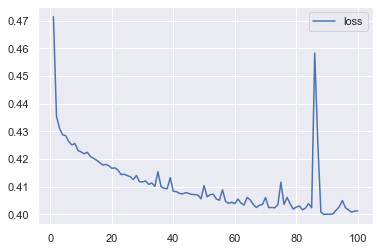

In [42]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

history_df.plot(y="loss")

<AxesSubplot:>

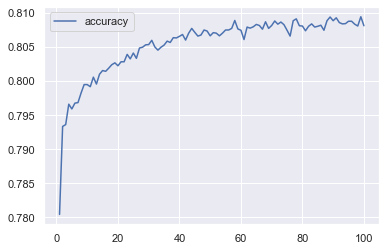

In [43]:
history_df.plot(y="accuracy")

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5700 - accuracy: 0.7888 - 907ms/epoch - 3ms/step
Loss: 0.5700171589851379, Accuracy: 0.7888046503067017


In [46]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_Deliverable_3_3.h5")